# **Semesterabschließende schriftliche Ausarbeitung**  
**Fachhochschule Südwestfalen**

---

**Modul:** Deep Learning  
**Semester:** Wintersemester 2025/2026  
**Thema:** *Architektur- und Trainingsstrategien für überwachte und unüberwachte Deep-Learning-Modelle zur Tethered-Cap-Inspektion*

---

### **Autoren**
**Sarah Gemünden** — Matrikelnummer: 30482243  
**Chanyut Bonkhamsaen** — Matrikelnummer: 30401284

**Diese Arbeit wurde von beiden Autoren zu gleichen Teilen (50 % / 50 %) erarbeitet.**

---

**Abgabe am:** XX. Februar 2026  

---

# Gliederung

**1. Einleitung**  
**2. Theoretische Grundlagen**  
&nbsp;&nbsp;&nbsp;&nbsp;2.1 Sicherungsringinspektion in Getränkeabfüllanlagen  
&nbsp;&nbsp;&nbsp;&nbsp;2.2 Anforderungen und Herausforderungen der Tetherd-Caps-Inspektion    
&nbsp;&nbsp;&nbsp;&nbsp;2.3 Bewertungsmetriken im Kontext der Tethered-Caps-Inspektion  
&nbsp;&nbsp;&nbsp;&nbsp;2.4 Grundlagen neuronaler Netze für die Bildklassifikation  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.4.1 Motivation: Warum CNNs statt Fully Connected Networks     
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.4.2 Convolutional Layer als zentrales Bauteil       
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.4.3 Architekturprinzip von CNNs       
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.4.4 Regularisierung von CNNs       
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.4.5 Trainingsablauf     
&nbsp;&nbsp;&nbsp;&nbsp;2.5 Transfer Learning mit ResNet  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.5.1 Grundidee des Transfer Learning  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.5.2 Vorgehensweisen  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.5.3 ResNet: Motivation und Kernidee  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.5.4 Aufbau einer ResNet-Architektur  
&nbsp;&nbsp;&nbsp;&nbsp;2.6 Grundlagen AutoEncoder  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.6.1 Grundidee  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.6.2 Vorgehensweisen  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.6.3 Autoencoder - Motivation und Kernidee  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.6.4 Aufbau einer Autoencoder-Architektur   
**3. Datenimport und Datenvorbereitung**  
&nbsp;&nbsp;&nbsp;&nbsp;3.1 technisches Setup und Paketimporte  
&nbsp;&nbsp;&nbsp;&nbsp;3.2 Datenimport und erste explorative Datenanalyse  
&nbsp;&nbsp;&nbsp;&nbsp;3.3 Datensplits   
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.3.1 Standard Split (70/15/15)  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.3.2 Variant-Based Split (Leave-One-Variant-Out) - Variante: cc_red  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.3.3 Variant-Based Split (Leave-One-Variant-Out) - Variante: voesl_zitrone   
&nbsp;&nbsp;&nbsp;&nbsp;3.4 Bildvorverarbeitung   
&nbsp;&nbsp;&nbsp;&nbsp;3.5 Datasets und DataLoader   
**4. Überwachte Bildklassifikation zur Inspektion von Tethered Caps**  
&nbsp;&nbsp;&nbsp;&nbsp;4.1 Modellarchitekturen  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;4.1.1 CNN von Grund auf (parametrisierbare Architektur)   
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;4.1.2 ResNet als vortrainierte Architektur (Transfer Learning)   
&nbsp;&nbsp;&nbsp;&nbsp;4.2 Hilfsfunktionen für Training, Evaluatoin und Fehleranalyse    
&nbsp;&nbsp;&nbsp;&nbsp;4.3 Trainings- und Evaluationspipeline  
&nbsp;&nbsp;&nbsp;&nbsp;4.4 Experimente mit dem CNN von Grund auf  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;4.4.1 Baseline-Modell   
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;4.4.2 Tiefes, schmales Modell vs. Baseline  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;4.3.3 Einfluss der Kernelgröße  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;4.3.4 Einfluss des Klassifikationskopfs  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;4.3.5 Zusammenfassung Experimente mit dem CNN von Grund auf   
&nbsp;&nbsp;&nbsp;&nbsp;4.5 Experimente mit ResNet    
&nbsp;&nbsp;&nbsp;&nbsp;4.6 Modellinterpretation mit TorchCam  
&nbsp;&nbsp;&nbsp;&nbsp;4.7 Inverenzzeit und Praxistauglichkeit  
**5. Unüberwachter Ansatz mittels Encoder-Netzwerken**  
**6. Ergebnisse und Bewertung**  
**7. Zusammenfassung und Ausblick**  
**8. Quellenverzeichnis**  
**9. Eigenständigkeitserklärung**  

# 1. Einleitung

* Hintergrund: Abfüllanlagen in der Getränkeindustrie
* div. Inspektionstechnik in einer Abfüllanlage
* Qualitätskontrolle im Verschließprozess
* Sicherungsringinspektion
* Herausforderung durch Tethtered Caps
* Motivation für den Einsatz von Deep Learning
* Zielsetzung der Arbeit
* Vorgehensweise Beschreiben
* Haupterkenntnisse

Ziel:
•	Accuracy: 97,0 %
•	Fehlerkennungsrate: < 0,1 % (False-Positive-Rate)


# 2. Theoretische Grundlagen

Dieses Kapitel vermittelt die theoretischen Grundlagen, die für das Verständnis der im weiteren Verlauf vorgestellten Bildklassifikations- und Deep-Learning-Methoden erforderlich sind. Zunächst wird der industrielle Anwendungskontext der Sicherungsringinspektion in Getränkeabfüllanlagen erläutert sowie die damit verbundenen Anforderungen und Herausforderungen beschrieben. Darauf aufbauend werden zentrale Bewertungsmetriken definiert, bevor die grundlegenden Konzepte neuronaler Netze und Convolutional Neural Networks (CNNs) vorgestellt werden. Abschließend werden Transfer-Learning-Ansätze, insbesondere ResNet-Architekturen, sowie Autoencoder als ergänzende Methode zur Merkmalsextraktion behandelt. Das Kapitel schafft damit die theoretische Basis für die nachfolgenden Implementierungs- und Experimentalkapitel.

## 2.1 Sicherungsringinspektion in Getränkeabfüllanlagen

In Getränkeabfüllanlagen ist eine sichere und dichte Verschließung der Behälter entscheidend für Produktqualität, Haltbarkeit und Geschmack. Ein beschädigter oder unvollständiger Sicherungsring kann zu Undichtigkeiten führen und damit die Produktsicherheit beeinträchtigen. Die folgende schematische Darstellung zeigt den Bereich des Sicherungsrings in Rot:

<p align="center">
  <img src="Bilder/Sicherungsring.png" width="150">
</p>

Zur automatisierten Überprüfung des Sicherungsrings wird bei der KHS GmbH das System Innocheck TSI (Tamper-evident Seal Inspection) eingesetzt. Das System inspiziert den Sicherungsring eines Verschlusses auf Unversehrtheit, indem es den gesamten Ring aus unterschiedlichen Blickwinkeln erfasst und auswertet. Die folgende Abbildung verdeutlicht das Prinzip der optischen Erfassung und der 360-Grad-Rundumsicht:

<p align="center">
  <img src="Bilder/TSI.png" width="400">
</p>

Zwei Kameras erzeugen mithilfe einer Spiegeloptik eine 360°-Rundumsicht, während LED-Beleuchtung für gleichmäßige und reproduzierbare Lichtverhältnisse sorgt. Auf Basis moderner Bildverarbeitungsalgorithmen wertet die Software die Farbpixel und Strukturen des Sicherungsrings aus und erkennt dabei auch kleinste Beschädigungen. Da die Deckelgeometrie herkömmlicher Deckel aus allen Richtungen gleich aussieht, ist eine zuverlässige Bewertung allein anhand der Farbpixel möglich.

Durch dieses Verfahren ermöglicht das System:
- eine zuverlässige Kontrolle der Ringintegrität
- die Erkennung kleinster Defekte
- eine vollständige Rundumsicht des Verschlusses. [1]

Seit Juli 2024 gilt in der EU die Vorgabe, dass Einweg-Getränkeverpackungen bis zu drei Litern mit sogenannten Tethered Caps ausgestattet sein müssen. Dabei handelt es sich um Verschlusskappen, die auch nach dem Öffnen dauerhaft mit der Flasche verbunden bleiben, um zu verhindern, dass lose Deckel in die Umwelt gelangen. [2]

Durch die Einführung der Tethered Caps erhöhte sich die Vielfalt an Verschlussvarianten deutlich. Die neue, bewegliche Geometrie der Verschlüsse führt dazu, dass diese nicht mehr aus allen Richtungen gleich aussehen. Daher ist eine reine Inspektion anhand der Farbpixel, wie sie bei klassischen symmetrischen Schraubverschlüssen eingesetzt wurde, für diesen Anwendungsfall nicht mehr ausreichend.

Um weiterhin eine zuverlässige Qualitätskontrolle sicherzustellen, hat die KHS GmbH die bestehende Verschlusskontrolle Innocheck TSI um KI-basierte Verfahren erweitert. Kameras erfassen die Verschlüsse in hoher Auflösung, während die Modelle die aufgenommenen Bilder in Echtzeit auswerten. Durch den Einsatz von Deep Learning können sich die Systeme an neue Fehlerbilder anpassen und auch komplexe oder seltene Defekte zuverlässig erkennen. [3]

## 2.2 Anforderungen und Herausforderungen der Tetherd-Caps-Inspektion

Die Inspektion von Tethered Caps stellt hohe Anforderungen an die eingesetzten Bildverarbeitungs- und Klassifikationssysteme. Ziel ist die zuverlässige Beurteilung des Sicherungsrings eines Flaschenverschlusses im laufenden Produktionsprozess. Dabei handelt es sich um eine binäre Klassifikationsaufgabe, bei der Flaschen in die Klassen *gut* und *schlecht* eingeteilt werden. Als *schlecht* erkannte Flaschen werden unmittelbar nach der Erkennung aus dem Produktionsprozess ausgeschleust. Eine zentrale Anforderung besteht darin, dass eindeutig erkennbar ist, dass die Flasche noch nicht geöffnet wurde, was einen vollständig intakten Sicherungsring voraussetzt. Die Auswertung der Bilddaten muss in Echtzeit erfolgen, da als *schlecht* klassifizierte Flaschen direkt im Anschluss an die Inspektion aus dem Produktionsprozess ausgeschleust werden. Das Innocheck-TSI-System kann aktuell eine Leistung von bis zu 72 000 Flaschen pro Stunde verarbeiten, was 20 Flaschen pro Sekunde entspricht. Da pro Flasche vier Bildaufnahmen erstellt werden, müssen innerhalb einer Sekunde insgesamt 80 Bilder analysiert und klassifiziert werden. Dies entspricht einer erforderlichen Leistung von 80 Inferenzen pro Sekunde. Diese Echtzeitanforderung stellt eine wesentliche Randbedingung für den Entwurf und die Auswahl geeigneter Deep-Learning-Modelle dar. Neben der zeitlichen Anforderung gelten hohe Qualitätsanforderungen an die Klassifikation. Für den industriellen Einsatz werden unter anderem eine Accuracy von mindestens 97 % sowie eine Fehlerkennungsrate unter 0,1 % gefordert. Letztere bezieht sich auf fälschlich als schlecht klassifizierte gut-Flaschen (False-Positive-Rate), da diese unmittelbar wirtschaftliche Verluste verursachen. Die zugrunde liegenden Metriken sowie die Konfusionsmatrix werden in Kapitel 2.3 detailliert erläutert. In der Praxis ist die Inspektion von Tethered Caps mit einer Reihe von Herausforderungen verbunden. Flaschen können auf dem Transportband leicht wackeln. Zudem dürfen Tropfen oder Kondensat auf der Oberfläche die Klassifikationsentscheidung nicht beeinflussen. Weitere erschwerende Faktoren sind variable Beleuchtungsverhältnisse, eine hohe Vielfalt an Deckelvarianten und Farben sowie die komplexe Geometrie der Tethered Caps. Letztere führt dazu, dass rein pixelbasierte Bildverarbeitungsverfahren, wie sie bei klassischen symmetrischen Schraubverschlüssen eingesetzt wurden, für diesen Anwendungsfall nur eingeschränkt geeignet sind.

Im Rahmen der Sicherungsringinspektion gibt es folgende typische Fehlerbilder:
- Risse  
- untergeschobene Sicherungsringe (auch als „Smile“ bezeichnet)  
- eine zu große Lücke zwischen Sicherungsring und Deckel  
- fehlende oder gebrochene Stege  
- Deformationen  

Die folgende Abbildung zeigt exemplarisch Beispiele dieser typischen Fehlerbilder.

<p align="center">
  <img src="Bilder/Fehlerbilder.jpg" width="800">
</p>

Die Ursachen für diese Defekte können vielfältig sein und liegen unter anderem darin, dass der Verschluss zu fest oder nicht weit genug aufgedreht wurde oder beim Aufdrehen hängen geblieben ist. Dadurch entsteht eine große Bandbreite visuell unterschiedlicher Fehlerbilder, was die zuverlässige automatisierte Erkennung zusätzlich erschwert.

## 2.3 Bewertungsmetriken im Kontext der Tethered-Cap-Inspektion

Zur Bewertung von Klassifikationsmodellen wird bei binären Klassifikationsaufgaben, wie der vorliegenden Sicherungsringinspektion, in der Regel die Konfusionsmatrix verwendet. Sie stellt die vorhergesagten Klassen den tatsächlichen Klassen gegenüber und ermöglicht eine differenzierte Analyse der Klassifikationsergebnisse anhand der vier Grundfälle True Positive, False Positive, True Negative und False Negative.

Die folgende Abbildung zeigt schematisch den Aufbau einer Konfusionsmatrix sowie die daraus ableitbaren Bewertungsmetriken.

<p align="center">
  <img src="Bilder/Konfusionsmatrix.png" width="800">
</p>

Im vorliegenden Anwendungsfall beziehen sich die Bezeichnungen *positiv* und *negativ* auf den Zustand des Flaschenverschlusses. Flaschen mit einem fehlerhaften oder beschädigten Verschluss werden dabei der *positiven* Klasse zugeordnet, während Flaschen mit einem intakten Verschluss der *negativen* Klasse entsprechen. Diese Zuordnung ist im industriellen Inspektionskontext üblich, da der Fokus der Klassifikation auf der Erkennung von Defekten liegt.

Auf Basis der Konfusionsmatrix lassen sich verschiedene Metriken berechnen. Für den vorliegenden industriellen Anwendungsfall sind insbesondere die folgenden beiden Kennzahlen von Bedeutung:

**Accuracy** beschreibt den Anteil aller korrekt klassifizierten Flaschen an der Gesamtzahl der geprüften Flaschen. Sie liefert einen allgemeinen Eindruck über die Leistungsfähigkeit des Modells, berücksichtigt jedoch nicht, welche Art von Fehlklassifikation vorliegt.  
Die **False-Positive-Rate** beschreibt den Anteil der gut-Flaschen, die fälschlich als schlecht klassifiziert und somit aus dem Produktionsprozess ausgeschleust werden. Diese Kenngröße ist im Inspektionskontext von besonderer Relevanz, da jede fälschlich ausgeschleuste einwandfreie Flasche unmittelbar wirtschaftliche Verluste verursacht.

Im Gegensatz zu Metriken wie Accuracy oder Recall kann die False-Positive-Rate nicht direkt aus der Konfusionsmatrix abgelesen werden. Sie ergibt sich vielmehr aus dem Verhältnis der False Positives zur Gesamtzahl der tatsächlich negativen Beispiele und kann als Gegenmaß zur Specificity berechnet werden. Die folgende Formel zeigt die Herleitung der False-Positive-Rate auf Basis der in der Konfusionsmatrix dargestellten Größen.

<p align="center">
  <img src="Bilder/FPR_Formel.png" width="400">
</p>

Durch die kombinierte Betrachtung dieser Metriken kann sowohl die allgemeine Klassifikationsleistung als auch die praktische Einsatzfähigkeit des Systems im Produktionsumfeld bewertet werden, wobei die zugrunde liegenden Definitionen der Konfusionsmatrix und der Bewertungsmetriken auf etablierten statistischen Grundlagen basieren [4].

## 2.4 Grundlagen neuronaler Netze für die Bildklassifikation

Dieses Kapitel vermittelt die grundlegenden Konzepte neuronaler Netze für die Bildklassifikation mit besonderem Fokus auf Convolutional Neural Networks (CNNs). Ziel ist es, die zentralen Bausteine, Designprinzipien und Trainingsmechanismen vorzustellen, die für das Verständnis der im weiteren Verlauf eingesetzten Modelle erforderlich sind. Die Darstellung konzentriert sich dabei bewusst auf die für die praktische Anwendung relevanten Aspekte und dient als theoretische Grundlage für den anschließenden Implementierungs- und Experimentierteil.

### 2.4.1 Motivation: Warum CNNs statt Fully Connected Networks

Bei der Bildklassifikation stellt sich zunächst die Frage, warum nicht einfach vollständig verbundene neuronale Netze (Fully Connected Networks) eingesetzt werden. Solche Netze sind für tabellarische Daten gut geeignet, stoßen bei Bilddaten jedoch schnell an ihre Grenzen. Der Hauptgrund ist die starke Zunahme der Parameteranzahl: Bereits mittelgroße Bilder führen nach dem Flattening zu einer sehr großen Anzahl an Gewichten, was das Training ineffizient macht und Overfitting begünstigt. [5]

Ein einfaches Beispiel verdeutlicht dieses Problem: Ein Graustufenbild mit 100 × 100 Pixeln besitzt 10 000 Eingabewerte. Eine vollständig verbundene Schicht mit derselben Anzahl an Neuronen erfordert bereits 100 Millionen Gewichte. Zusätzlich geht beim Flattening die räumliche Struktur des Bildes verloren, obwohl gerade die Beziehung benachbarter Pixel für die Bildinterpretation entscheidend ist. [5][6]

Convolutional Neural Networks (CNNs) wurden entwickelt, um diese Nachteile zu vermeiden. Sie analysieren Bilder mithilfe von Faltungsschichten, die nur lokale Bildausschnitte betrachten und dabei dieselben Filter über das gesamte Bild anwenden. Dadurch können typische Bildmerkmale wie Kanten oder Texturen unabhängig von ihrer Position erkannt werden, während die Anzahl der zu lernenden Parameter stark reduziert wird. [6]

CNNs machen Bildklassifikation damit praktikabel, da sie die Eingabedimension effektiv reduzieren, kleine Verschiebungen im Bild tolerieren und gezielt die Korrelation benachbarter Pixel ausnutzen. Aus diesen Gründen haben sie sich als Standardarchitektur für Aufgaben der Bildklassifikation etabliert. [6]

### 2.4.2 Convolutional Layer als zentrales Bauteil

Convolutional Layers (auch Faltungsschichten) sind der zentrale Baustein von Convolutional Neural Networks (CNNs). Im Unterschied zu vollvermaschten neuronalen Netzen sind Neuronen in einer Faltungsschicht nicht mit allen Pixeln des Eingabebildes verbunden, sondern nur mit einem lokalen Wahrnehmungsfeld. In tieferen Convolutional Layers beziehen sich Neuronen entsprechend auf lokale Bereiche der vorherigen Schicht, sodass das Netzwerk schrittweise von einfachen zu komplexeren Bildmerkmalen gelangt. [5]

Dabei bleiben die Eingabedaten zweidimensional angeordnet, während bei vollständig verbundenen Netzen eine Verflachung erforderlich ist. Die Faltungsschicht realisiert die Merkmalsextraktion mithilfe von Filtern (Kernels), die als kleine Gewichtsmatrizen schrittweise über das Bild verschoben werden. [5]

Der grundlegende Aufbau und das Zusammenspiel von Eingabeschicht, Convolutional Layers und Filtern sind in der nachfolgenden Abbildung aus dem Buch *Praxiseinstieg Machine Learning* [5] dargestellt.

<p align="center">
  <img src="Bilder/ConvolutionalLayer.png" width="500">
</p>

In der Praxis kommen häufig kleine Kernelgrößen wie 3×3 Pixel zum Einsatz, die lokale Bildausschnitte analysieren. Durch die Verwendung identischer Filter über das gesamte Eingabebild können charakteristische Muster wie Kanten, Formen oder Texturen unabhängig von ihrer Position erkannt werden. Das zugrunde liegende Weight Sharing reduziert die Anzahl der zu lernenden Parameter und trägt zu einer effizienten Verarbeitung bei. [6]

Ein Kernel ist dabei eine kleine Gewichtsmatrix, typischerweise der Größe 3×3, die lokal auf das Eingabebild angewendet wird. Abhängig von der spezifischen Anordnung der Gewichte reagieren unterschiedliche Kernel besonders stark auf bestimmte Intensitätsänderungen, beispielsweise horizontale oder vertikale Kanten. Die folgende Abbildung aus den Vorlesungsunterlagen des Moduls Machine Learning [7] verdeutlicht exemplarisch, wie verschiedene 3×3-Kernel auf dieselbe Eingabe angewendet werden und dadurch unterschiedliche strukturelle Bildmerkmale extrahieren.

<p align="center">
  <img src="Bilder/Kernel.png" width="450">
</p>

Der im oberen Teil der Abbildung gezeigte Kernel mit positiven Gewichten in der oberen Zeile und negativen Gewichten in der unteren Zeile hebt vor allem horizontale Kanten hervor, da er starke Helligkeitsunterschiede zwischen oberen und unteren Bildbereichen verstärkt. Der untere Kernel besitzt dagegen positive und negative Gewichte entlang der horizontalen Achse und reagiert daher besonders auf vertikale Kanten, da hier Intensitätsänderungen zwischen linken und rechten Bildbereichen betont werden. In beiden Fällen entsteht ein hoher Aktivierungswert dort, wo ein starker Kontrast in der jeweiligen Richtung vorliegt.

Eine Feature Map entsteht durch die Anwendung eines einzelnen Filters auf die Eingabe und hebt jene Bildbereiche hervor, die den Filter besonders stark aktivieren. Ein Convolutional Layer verwendet in der Regel mehrere Filter und erzeugt entsprechend eine Feature Map pro Filter, wobei alle Neuronen innerhalb einer Feature Map dieselben Parameter teilen. Die Filter werden dabei während des Trainings automatisch gelernt. [5]

Beim Anwenden von Faltungen bestimmen Padding und Stride maßgeblich die räumliche Größe der entstehenden Feature Maps. Folgende Abbildung entnommen aus dem Buch *Praxiseinstieg Machine Learning* [5] veranschaulicht die beiden Prinzipien

<p align="center">
  <img src="Bilder/PaddingStride.png" width="400">
</p>

**Padding** bezeichnet das Auffüllen der Eingabe mit zusätzlichen Nullen an den Randbereichen. Ziel ist es, zu verhindern, dass die Ausgabedarstellung nach jeder Faltung zunehmend kleiner wird. Beim sogenannten Zero Padding bleiben Höhe und Breite der Ausgabe bei geeigneter Wahl des Paddings konstant. In der Abbildung sind die durch das Padding hinzugefügten Nullwerte grau hinterlegt; der lila markierte Bereich verdeutlicht, dass der Kernel dadurch auch an den Bildrändern vollständig angewendet werden kann. [5]  
Der **Stride** beschreibt den horizontalen und vertikalen Abstand, mit dem der Kernel über die Eingabe verschoben wird. Ein größerer Stride führt dazu, dass sich die Wahrnehmungsfelder weniger überlappen und die Ausgabedarstellung entsprechend kleiner wird, was die Rechenkomplexität reduziert. In der Abbildung illustrieren die roten und blauen Markierungen, wie der Kernel mit einer bestimmten Schrittweite über das Eingabegitter bewegt wird. [5]  
Padding und Stride beeinflussen damit maßgeblich die räumliche Auflösung der Feature Maps und stellen zentrale Stellschrauben beim Entwurf von Convolutional Neural Networks dar. [5]

### 2.4.3 Architekturprinzipien von CNNs

In typischen CNN-Architekturen werden mehrere Convolutional Layers sequenziell aufeinandergestapelt. Folgende Abbildung [8] veranschaulicht  den schematischen Aufbau einer solchen CNN-Architektur.

<p align="center">
  <img src="Bilder/CNN_Architektur.png" width="800">
</p>

Wie in der Abbildung zu sehen, verwendet jeder Convolutional Layer dabei mehrere Filter (Kernel), sodass aus einer Eingabe mehrere Feature Maps entstehen. Die Anzahl dieser Feature Maps entspricht der Anzahl der eingesetzten Filter und definiert die Tiefe der Schicht. Während die räumliche Auflösung der Feature Maps im Verlauf des Netzes meist abnimmt, steigt deren Tiefe typischerweise an, da zunehmend komplexere und abstraktere Bildmerkmale extrahiert werden. Ein wesentlicher Punkt ist, dass ein Filter in einem tieferen Convolutional Layer nicht nur auf eine einzelne Feature Map, sondern auf alle Feature Maps der vorherigen Schicht angewendet wird. Die resultierende Feature Map entsteht somit aus einer gewichteten Kombination sämtlicher Eingangskanäle und erlaubt es dem Netzwerk, Merkmale höherer Ordnung zu lernen, die mehrere zuvor erkannte Strukturen miteinander verknüpfen. [5]

Üblicherweise folgt auf jeden Convolutional Layer unmittelbar eine nichtlineare Aktivierungsfunktion, in modernen CNN-Architekturen meist die ReLU-Funktion. Erst durch diese Nichtlinearität ist das Netzwerk in der Lage, komplexe Zusammenhänge und nichtlineare Entscheidungsgrenzen zu modellieren. Nach ein oder mehreren solchen Kombinationen aus Faltung und Aktivierung wird häufig ein Pooling Layer eingefügt, bevor der nächste Block aus Convolutional Layers beginnt. Durch diese wiederholte Abfolge wird die räumliche Auflösung der Feature Maps im Verlauf des Netzes schrittweise reduziert, während deren Tiefe typischerweise zunimmt, da zunehmend abstraktere und komplexere Bildmerkmale extrahiert werden. [5]

Die ReLU-Funktion (Rectified Linear Unit) hat sich dabei als De-facto-Standard etabliert. Sie setzt negative Eingaben auf null, während positive Werte unverändert weitergegeben werden. Aufgrund ihrer einfachen mathematischen Struktur ist ReLU recheneffizient und unterstützt eine schnellere Konvergenz des Gradientenverfahrens, kann jedoch bei ungünstiger Wahl der Lernrate zum Auftreten sogenannter „toter Neuronen“ führen. Unabhängig von der konkreten Aktivierungsfunktion wird diese elementweise auf jedes Element der Feature Maps angewendet, wobei es in modernen CNN-Architekturen gängige Praxis ist, nach jeder Faltung oder nach Pooling-Operationen eine ReLU-basierte Aktivierung einzusetzen. [6]

Pooling Layers dienen dazu, die räumliche Größe der Feature Maps zu reduzieren, indem aus lokalen Bildbereichen Unterstichproben gezogen werden. Dadurch verringern sich sowohl die Rechenlast als auch der Speicherbedarf des Netzes, während gleichzeitig das Risiko von Overfitting sinkt. Folgende Abbildung [5] veranschaulicht exemplarisch die Funktionsweise eines Max-Pooling-Layers, bei dem aus jedem lokalen Wahrnehmungsfeld lediglich der größte Aktivierungswert an die nächste Schicht weitergegeben wird. [5]

<p align="center">
  <img src="Bilder/Pooling.png" width="600">
</p>

Ähnlich wie bei Convolutional Layers besitzt jedes Neuron eines Pooling Layers ein lokales Wahrnehmungsfeld mit definierter Kernel-Größe, Schrittweite und Padding, wie in der Abbildung dargestellt. Im Gegensatz zur Faltung enthalten Pooling-Neuronen jedoch keine lernbaren Gewichte, sondern aggregieren die Eingabewerte ausschließlich über eine feste Funktion. Bei dem in der obigen Abbildung gezeigten Max-Pooling werden alle übrigen Werte innerhalb eines Wahrnehmungsfeldes verworfen. [5]

Neben der Reduktion des Rechenaufwands erzeugt Max-Pooling eine gewisse Invarianz gegenüber kleinen Verschiebungen im Bild. Durch die wiederholte Anwendung von Pooling-Schichten kann zudem eine begrenzte Robustheit gegenüber Translationen, Rotationen und Skalierungen erreicht werden, was insbesondere für Klassifikationsaufgaben vorteilhaft ist. [5]

Demgegenüber steht der Nachteil der starken Informationsreduktion: Bereits bei einem 2×2-Kernel mit Schrittweite 2 wird die räumliche Auflösung in beide Richtungen halbiert, sodass insgesamt 75 % der Eingabewerte verloren gehen, was als stark destruktiv betrachtet werden kann. [5]

Eine alternative Pooling-Variante ist das Average-Pooling, bei dem anstelle des Maximums der Mittelwert der Werte innerhalb eines Wahrnehmungsfeldes berechnet wird. Obwohl Average-Pooling früher weit verbreitet war, kommen in modernen CNN-Architekturen überwiegend Max-Pooling-Layers zum Einsatz, da sie in vielen Anwendungsfällen eine bessere Leistung erzielen. [5]  

Eine spezielle Form des Average-Poolings ist das Global Average Pooling, bei dem über die gesamte räumliche Ausdehnung jeder Feature Map gemittelt wird. Dadurch entsteht pro Feature Map genau ein Skalarwert, sodass auf eine explizite Flatten-Operation und große Fully-Connected-Schichten verzichtet werden kann, was die Anzahl der Parameter weiter reduziert und Overfitting entgegenwirkt. [6]

Am oberen Ende eines CNNs befindet sich der Klassifikationskopf. Die zuletzt erzeugten Feature Maps werden hierfür zunächst geflattet, sodass sie als Vektor an ein klassisches Feed-Forward-Netz aus vollständig verbundenen Schichten übergeben werden können. Diese Schichten kombinieren die zuvor extrahierten Merkmale global und führen die eigentliche Klassifikation durch. [5]  
Die finale Ausgabeschicht besitzt typischerweise so viele Neuronen wie Zielklassen und verwendet eine geeignete Aktivierungsfunktion, beispielsweise Softmax, um geschätzte Klassenwahrscheinlichkeiten auszugeben. [5]

### 2.4.4 Regularisierung in CNNs

Bei der Verarbeitung von Bilddaten besitzen Convolutional Neural Networks häufig eine sehr hohe Modellkapazität. Insbesondere bei begrenzter Datenmenge besteht daher die Gefahr des Overfittings, bei dem das Modell die Trainingsdaten sehr gut approximiert, jedoch schlecht auf unbekannte Daten generalisiert. Regularisierungstechniken zielen darauf ab, die Generalisierungsfähigkeit des Netzes zu verbessern, indem sie Überanpassung reduzieren und das Lernen robuster gestalten. In CNNs kommen hierfür insbesondere Data Augmentation, Dropout und Batchnormalisierung zum Einsatz. [5]

**Data Augmentation**  

Eine besonders effektive Regularisierungsmethode für Bilddaten ist Data Augmentation. Dabei wird die Größe des Trainingsdatensatzes künstlich erhöht, indem aus vorhandenen Bildern realistische Varianten erzeugt werden. Typische Transformationen umfassen leichte Verschiebungen, Rotationen, Skalierungen, Spiegelungen oder Änderungen von Helligkeit und Kontrast. Die erzeugten Bilder sollten dabei so realistisch sein, dass sie nicht eindeutig von Originaldaten unterscheidbar sind. [5]

Durch Data Augmentation wird das Modell gezwungen, tolerant gegenüber Variationen in Position, Orientierung, Größe und Beleuchtung der Objekte zu reagieren, wodurch Overfitting wirksam reduziert wird. Zusätzlich kann Data Augmentation bei unausbalancierten Datensätzen eingesetzt werden, um seltene Klassen gezielt zu verstärken, etwa durch synthetische Oversampling-Verfahren. [5]

**Dropout**  

Eine weitere häufig eingesetzte Regularisierungstechnik ist Dropout. Dabei werden während des Trainings in jedem Schritt einzelne Neuronen mit einer festen Wahrscheinlichkeit 
𝑝 temporär deaktiviert. Die betroffenen Neuronen tragen in diesem Trainingsschritt weder zur Vorwärts- noch zur Rückwärtspropagation bei, können jedoch im nächsten Schritt wieder aktiv sein. Nach Abschluss des Trainings wird Dropout deaktiviert und alle Neuronen werden vollständig genutzt. [5]

Die Dropout-Rate 
𝑝 liegt typischerweise zwischen 10 % und 50 %. Durch das zufällige Weglassen von Neuronen wird verhindert, dass sich das Modell zu stark auf einzelne Aktivierungen verlässt, was die Robustheit erhöht und Overfitting reduziert. In vielen Deep-Learning-Architekturen führt Dropout zu einer leichten, aber stabilen Verbesserung der Generalisierungsleistung. [5]

**Batchnormalisierung**

Batchnormalisierung wurde ursprünglich eingeführt, um Probleme wie schwindende oder explodierende Gradienten zu reduzieren. Dazu wird vor der Aktivierungsfunktion jeder verborgenen Schicht eine Normalisierung der Eingaben durchgeführt, bei der Mittelwert und Standardabweichung auf Basis des aktuellen Mini-Batches geschätzt werden. Die normalisierten Werte werden anschließend über lernbare Skalierungs- und Verschiebungsparameter angepasst. [5]

Neben der Stabilisierung des Trainings wirkt Batchnormalisierung auch als impliziter Regularisierer und kann die Notwendigkeit zusätzlicher Regularisierungstechniken verringern. Zwar erhöht sie durch zusätzliche Parameter und Normalisierungsoperationen den Rechenaufwand pro Trainingsschritt leicht, jedoch ermöglicht sie häufig eine stabilere Optimierung und höhere Lernraten. Dadurch konvergieren Modelle in der Praxis oftmals schneller und benötigen weniger Trainingsdurchläufe. [5]

Insgesamt ergänzen sich Data Augmentation, Dropout und Batchnormalisierung in ihrer Wirkung. Während Data Augmentation direkt auf Datenebene ansetzt, beeinflussen Dropout und Batchnormalisierung das Lernverhalten des Modells und tragen gemeinsam zu einer verbesserten Generalisierung bei. [5]

### 2.4.5 Trainingsablauf

Das Training eines Convolutional Neural Networks folgt einem klar strukturierten Ablauf, der mehrere aufeinander aufbauende Schritte umfasst. Zunächst werden die Bilddaten vorbereitet und in geeigneter Form bereitgestellt. Vor dem eigentlichen Training wird das neuronale Netzwerk als Modell instanziiert. Dabei werden die zuvor definierte Netzwerkarchitektur sowie alle zugehörigen lernbaren Parameter initialisiert. Erst durch diese Instanziierung entsteht ein konkretes Modellobjekt, das mit einer Verlustfunktion und einem Optimierungsverfahren verknüpft und trainiert werden kann. Im weiteren Verlauf erfolgt das eigentliche Training des Netzwerks, bei dem Vorhersagen berechnet, Verluste bestimmt und die Netzwerkgewichte optimiert werden, wobei zwischen Trainings-, Validierungs- und Testphasen unterschieden wird. [6]

**Datenvorverarbeitung, Dataset und DataLoader**

Vor dem Training werden die Bilddaten üblicherweise vorverarbeitet, indem alle Bilder auf eine einheitliche Größe skaliert, anhand von Mittelwert und Standardabweichung normalisiert und in PyTorch-Tensoren konvertiert werden. Diese Schritte stellen sicher, dass die Eingaben den Erwartungen der Netzwerkarchitektur entsprechen und stabil verarbeitet werden können. [6]

In Deep-Learning-Anwendungen werden Bilddaten in der Regel batchweise verarbeitet, da CPUs und GPUs für parallele Berechnungen auf ganzen Batches optimiert sind. PyTorch stellt hierfür die Klasse DataLoader bereit, die ein Dataset kapselt und Mini-Batches von Bildern bereitstellt. Aufgaben wie das Durchmischen der Daten oder die parallele Datenbereitstellung über mehrere Worker werden dabei automatisch übernommen. [6]

**Verlustfunktion und Optimierer**

Nach Definition der Netzwerkarchitektur wird bewertet, wie gut das Modell die zugrunde liegende Aufgabe erfüllt. Hierzu wird eine Verlustfunktion verwendet, die einen skalaren Fehlerwert berechnet, welcher während des Trainings minimiert wird. Da Optimierungsalgorithmen typischerweise einen solchen Skalar erwarten, ist die Wahl einer geeigneten Verlustfunktion essenziell. [6]

Für Klassifikationsaufgaben kommt üblicherweise die Cross-Entropy-Loss zum Einsatz. Sie misst die Abweichung zwischen den vorhergesagten Klassenwahrscheinlichkeiten und der tatsächlichen Zielklasse. Je stärker die Vorhersage von der wahren Klasse abweicht, desto höher fällt der Verlust aus, während korrekte und sichere Vorhersagen zu einem niedrigen Verlust führen. [6]

Zur Minimierung des Verlusts wird ein Optimierungsalgorithmus eingesetzt, der die lernbaren Parameter des Netzwerks auf Basis der berechneten Gradienten iterativ anpasst. In der Praxis existieren verschiedene Optimierer, die sich insbesondere in der Art der Lernratenanpassung und Regularisierung unterscheiden. Eine weit verbreitete Klasse stellen adaptive Verfahren wie Adam dar, die Momentenschätzungen der Gradienten nutzen und dadurch ein stabiles und effizientes Training ermöglichen. In dieser Arbeit wird die Variante AdamW verwendet, bei der die Gewichtsregularisierung (Weight Decay) explizit von der Gradientenoptimierung entkoppelt ist. Dies führt zu einer effektiveren Regularisierung und wird in vielen Anwendungsfällen mit einer verbesserten Generalisierungsfähigkeit des Modells in Verbindung gebracht. [5]

**Ablauf eines Trainingsschritts**

Der eigentliche Trainingsschritt innerhalb einer Epoche folgt einem festen Schema. Zunächst werden die zuvor berechneten Gradienten zurückgesetzt, um eine Akkumulation über mehrere Schritte zu vermeiden. Anschließend erfolgt der Vorwärtsdurchlauf, bei dem das Modell aus den Eingabedaten Vorhersagen berechnet. Auf Basis dieser Vorhersagen wird der Verlust bestimmt, bevor im Rückwärtsdurchlauf mittels Backpropagation die Gradienten berechnet werden. Abschließend werden die Modellparameter durch einen Optimierungsschritt aktualisiert. [6]

**Trainings-, Validierungs- und Testphase**

Jede Epoche gliedert sich in eine Trainings- und eine Validierungsphase. Während der Trainingsphase werden Vorhersagen berechnet, der Verlust bestimmt und die Netzwerkgewichte angepasst. In der Validierungsphase hingegen werden ausschließlich Vorhersagen erzeugt und bewertet, ohne dass eine Gewichtsaktualisierung erfolgt. Zusätzlich wird eine Testphase verwendet, in der das final ausgewählte Modell auf zuvor ungesehenen Daten evaluiert wird, um dessen Generalisierungsfähigkeit objektiv zu beurteilen. [6]

Für Training, Validierung und Test werden unterschiedliche Modellmodi verwendet. Im Trainingsmodus sind Regularisierungstechniken wie Dropout aktiv, und es werden Gradienten berechnet. Im Validierungs- und Testmodus hingegen ist Dropout deaktiviert, und es findet keine Backpropagation statt, um eine unverzerrte Bewertung der Modellleistung zu gewährleisten. [6]

## 2.5 Transfer Learning mit ResNet

Nachdem in Kapitel 2.4 die grundlegenden Konzepte neuronaler Netze für die Bildklassifikation sowie der Aufbau und das Training von Convolutional Neural Networks erläutert wurden, wird in diesem Kapitel ein weiterführender Architekturansatz vorgestellt. Im Fokus stehen Transfer Learning und die ResNet-Architektur als Weiterentwicklung klassischer CNNs. ResNet adressiert zentrale Herausforderungen beim Training sehr tiefer Netze und bildet die Grundlage vieler vortrainierter Modelle für Bildverarbeitungsaufgaben.

### 2.5.1 Grundidee des Transfer Learning

Transfer Learning beschreibt die Wiederverwendung eines bereits trainierten neuronalen Netzes für eine neue, inhaltlich ähnliche Aufgabe, ohne das Modell vollständig von Grund auf neu zu trainieren. Ziel ist es, vorhandenes Wissen aus einem großen Quell-Datensatz auf einen kleineren oder spezifischeren Ziel-Datensatz zu übertragen, um Trainingszeit und Datenbedarf zu reduzieren. [6]

In Convolutional Neural Networks sind die gelernten Merkmale hierarchisch organisiert. Frühere Schichten erfassen grundlegende visuelle Strukturen wie Kanten, Linien oder einfache Texturen, während tiefere Schichten zunehmend komplexe und aufgabenspezifische Merkmale modellieren. Diese allgemeinen Merkmale lassen sich in vielen Bildverarbeitungsaufgaben wiederverwenden. [6]

Vortrainierte Modelle werden typischerweise auf großen, allgemein gehaltenen Datensätzen wie ImageNet trainiert, der 1000 Objektklassen umfasst. Dabei entstehen Filtergewichte, die auf die Erkennung vielfältiger visueller Muster optimiert sind und sich gut auf verwandte Aufgaben übertragen lassen. [6]

Beim Transfer Learning wird in der Regel die Architektur des vortrainierten Modells übernommen. Lediglich der Klassifikationskopf wird an die neue Aufgabe angepasst, etwa durch Änderung der Anzahl der Ausgabeneuronen. Die gelernten Parameter der frühen Netzwerkschichten werden häufig eingefroren, während nur die letzten Schichten weiter trainiert oder feinjustiert werden. Dieses Vorgehen reduziert das Risiko von Überanpassung bei begrenzten Datensätzen und ermöglicht eine effiziente Nutzung des vortrainierten Wissens. Abhängig von Datensatzgröße und Aufgabenähnlichkeit kommen unterschiedliche Fine-Tuning-Strategien zum Einsatz, die im weiteren Verlauf erläutert werden. [6]

### 2.5.2 Vorgehensweisen im Transfer Learning

Beim Transfer Learning haben sich mehrere Vorgehensweisen etabliert, die sich vor allem im Umfang der trainierbaren Parameter unterscheiden. Die Wahl der Strategie hängt maßgeblich von der Größe des Ziel-Datensatzes sowie von der Ähnlichkeit zwischen Quell- und Zielaufgabe ab. [6]

Eine verbreitete Methode ist die Nutzung eines vortrainierten Modells als reiner Feature-Extraktor. Dabei werden die Gewichte der gesamten vortrainierten Architektur eingefroren, und lediglich der neu hinzugefügte Klassifikationskopf wird trainiert. Diese Vorgehensweise ist besonders geeignet, wenn nur wenige Trainingsdaten zur Verfügung stehen oder wenn die Zielaufgabe der ursprünglichen Trainingsaufgabe stark ähnelt. [6]

Eine weiterführende Strategie ist das Fine-Tuning, bei dem zusätzlich zu dem Klassifikationskopf auch ausgewählte tiefere Schichten des Netzwerks weiter trainiert werden. Häufig werden dabei zunächst nur die letzten Schichten freigegeben, während frühe Schichten weiterhin eingefroren bleiben. Auf diese Weise kann das Modell auf aufgabenspezifische Merkmale angepasst werden, ohne die generalisierenden Eigenschaften der früh gelernten Filter zu verlieren. [6]

Als Faustregel gilt, dass bei kleinen Datensätzen und hoher Aufgabenähnlichkeit ein weitgehendes Einfrieren der Architektur sinnvoll ist, während bei größeren Datensätzen oder stärker abweichenden Zielaufgaben ein partielles oder vollständiges Fine-Tuning bessere Ergebnisse liefern kann. In der Praxis werden diese Strategien häufig schrittweise kombiniert, indem zunächst nur der Klassifikationskopf trainiert und anschließend ausgewählte Netzwerkschichten freigegeben werden. [6]  

Im weiteren Verlauf dieser Arbeit werden diese Vorgehensweisen exemplarisch anhand einer ResNet-18-Architektur untersucht.

### 2.5.3 ResNet: Motivation und Kernidee

Sehr tiefe neuronale Netze verfügen grundsätzlich über eine hohe Modellkapazität, lassen sich in der Praxis jedoch häufig nur schwer trainieren. Mit zunehmender Tiefe treten Probleme wie verschwindende Gradienten auf, wodurch frühere Schichten kaum noch angepasst werden. In der Folge stagniert oder verschlechtert sich die Modellleistung, obwohl zusätzliche Schichten hinzugefügt werden. [5]

ResNet (Residual Network) adressiert dieses Problem durch sogenannte Skip-Verbindungen, deren Prinip in folgender Abbildung [5] dargestellt ist.

<p align="center">
  <img src="Bilder/ResNet_SkipVerbindungen.png" width="500">
</p>

Durch die Skip-Verbindungen wird die Eingabe einer Schicht nicht ausschließlich durch die nachfolgenden Schichten verarbeitet, sondern zusätzlich direkt an eine weiter oben liegende Schicht weitergeleitet und dort zur Ausgabe addiert. Das Netzwerk muss somit nicht mehr die vollständige Abbildung von Eingabe zu Ausgabe lernen, sondern lediglich eine Korrektur zur Eingabe. Diese Idee wird als Residual Learning bezeichnet. Anstatt eine komplett neue Transformation zu erlernen, konzentriert sich das Modell darauf, nur die Abweichung zwischen Eingabe und gewünschter Ausgabe zu modellieren. Liegt die optimale Abbildung nahe an einer unveränderten Weitergabe der Eingabe, fällt das Lernen dadurch deutlich leichter. [5]

Ein weiterer zentraler Vorteil der Skip-Verbindungen ist die verbesserte Weitergabe der Gradienten während des Trainings. Durch die direkten Verbindungen können Gradienten auch bei sehr tiefen Netzen zuverlässig zu früheren Schichten zurückfließen. Dadurch bleiben diese Schichten lernfähig, selbst wenn einzelne nachfolgende Schichten nur langsam oder zeitweise gar nicht lernen. Ein ResNet besteht folglich aus einem Stapel sogenannter Residual Units. Jede Residual Unit umfasst mehrere Faltungsschichten sowie eine Skip-Verbindung, die die Eingabe der Unit direkt mit ihrer Ausgabe verknüpft. Diese Architektur ermöglicht es, sehr tiefe neuronale Netze zu trainieren, ohne dass sich die typischen Trainingsprobleme klassischer tiefer Architekturen einstellen. [5]  

Die folgende Abbildung [5] veranschaulicht dieses Prinzip schematisch. Auf der linken Seite ist ein klassisches tiefes neuronales Netz ohne Skip-Verbindungen dargestellt. Mit zunehmender Tiefe kann es hier zu Problemen bei der Gradientenweitergabe kommen, sodass einzelne Schichten nicht mehr effektiv lernen. Auf der rechten Seite ist hingegen die Struktur eines Deep-Residual-Netzes gezeigt. Durch die Verwendung von Skip-Verbindungen werden mehrere Residual Units gebildet, die es dem Gradienten erlauben, direkt durch das Netzwerk zu fließen. Dadurch bleiben auch sehr tiefe Netze trainierbar und die genannten Trainingsprobleme werden deutlich reduziert.

<p align="center">
  <img src="Bilder/ResNet_ResidualUnits.png" width="500">
</p>

### 2.5.4 Aufbau einer ResNet-Architektur

Die ResNet-Architektur basiert auf dem wiederholten Einsatz sogenannter *Residual Units*, die aus mehreren Faltungsschichten und einer Skip-Verbindung bestehen. Eine Residual Unit verknüpft die Eingabe direkt mit der Ausgabe des Blocks, sodass das Netzwerk nicht die vollständige Transformation, sondern lediglich eine Korrektur zur Eingabe lernen muss. Diese Struktur stellt das zentrale architektonische Element von Residual Networks dar. [5]  

Die folgende Abbildung [5] zeigt den schematischen Aufbau einer ResNet-Architektur sowie die Struktur einer einzelnen Residual Unit.

<p align="center">
  <img src="Bilder/ResNet_Architektur.png" width="700">
</p>

Eine typische ResNet-Architektur beginnt mit einer initialen Faltungsschicht mit großem Kernel, gefolgt von einer Pooling-Schicht zur Reduktion der räumlichen Auflösung. Anschließend folgt ein tiefer Stapel von Residual Units, die in mehreren Stufen organisiert sind. Innerhalb einer Stufe besitzen alle Residual Units die gleiche Anzahl an Feature Maps. Zwischen den Stufen wird die räumliche Auflösung reduziert, während sich die Anzahl der Feature Maps erhöht. [5]

Jede Residual Unit besteht in der Regel aus zwei aufeinanderfolgenden Faltungsschichten mit Kernelgröße 3×3, kombiniert mit Batch-Normalisierung und ReLU-Aktivierung. Falls sich die Dimensionen von Eingabe und Ausgabe unterscheiden, wird die Skip-Verbindung über eine zusätzliche 1×1-Faltung angepasst, um eine elementweise Addition zu ermöglichen. [5]

Am Ende der Architektur wird häufig ein Global Average Pooling eingesetzt, das die räumlichen Feature Maps auf einen Vektor reduziert. Darauf folgt ein vollständig verbundener Klassifikationskopf, dessen Ausgabedimension an die jeweilige Klassifikationsaufgabe angepasst wird. [5]

Die grundlegende Struktur ist bei allen ResNet-Varianten identisch. Unterschiede zwischen den einzelnen Modellen ergeben sich ausschließlich aus der Anzahl der verwendeten Residual Units und damit aus der Tiefe des Netzwerks. Gängige Varianten sind unter anderem ResNet-18, ResNet-34, ResNet-50, ResNet-101 und ResNet-152, die sich in der Anzahl der Schichten und der Modellkomplexität unterscheiden.  [5]

## 2.6 Grundlagen AutoEncoder

Während Transfer-Learning-Ansätze mit vortrainierten Architekturen wie ResNet leistungsfähige Werkzeuge für überwachte Bildklassifikationsaufgaben darstellen, setzen sie die Verfügbarkeit klar definierter und repräsentativer Klassenlabels voraus. In Szenarien, in denen fehlerhafte Beispiele selten, stark variabel oder nur eingeschränkt verfügbar sind, gewinnen alternative Lernparadigmen an Bedeutung. Vor diesem Hintergrund werden im folgenden Abschnitt die Grundlagen von Autoencodern vorgestellt, die einen unüberwachten Zugang zur Merkmalsextraktion und Anomalieerkennung ermöglichen.

### 2.6.1 Grundidee

Ein Autoencoder ist ein künstliches neuronales Netzwerk, dessen Ziel es ist, eine Eingabe möglichst verlustfrei auf sich selbst abzubilden. Im Gegensatz zu klassischen Klassifikations- oder Regressionsmodellen wird kein explizites Zielsignal in Form von Klassenlabels vorgegeben. Stattdessen lernt das Modell eine komprimierte Repräsentation der Eingabedaten, aus der die ursprüngliche Eingabe wieder rekonstruiert werden kann.

Die zentrale Annahme eines Autoencoders ist, dass sich die wesentlichen Strukturen der Daten in einem niederdimensionalen Merkmalsraum erfassen lassen. Durch diese Kompression ist das Modell gezwungen, nur die relevanten Merkmale der Daten zu speichern und irrelevante oder zufällige Variationen zu vernachlässigen.

### 2.6.2 Vorgehensweisen

Das Training eines Autoencoders erfolgt in der Regel unüberwacht. Die Eingabedaten dienen gleichzeitig als Zielwerte, wodurch sich das Lernproblem formal als Minimierung eines Rekonstruktionsfehlers formulieren lässt. Typische Vorgehensweisen sind:
* Rekonstruktionsbasiertes Lernen: Minimierung der Differenz zwischen Eingabe und Ausgabe (z. B. mittels MSE oder L1-Loss).
* Dimensionalitätsreduktion: Erlernen kompakter latenter Repräsentationen, ähnlich der Hauptkomponentenanalyse (PCA), jedoch nichtlinear.
* Regularisierung: Einschränkung der Modellkapazität (z. B. über Bottleneck-Größe, Sparsity oder Rauscheinjektion), um triviale Identitätsabbildungen zu vermeiden.
* Domänenspezifische Varianten: Einsatz von Convolutional Autoencodern für Bilddaten, da diese lokale Strukturen und Translationen besser erfassen.
* Je nach Ausgestaltung können Autoencoder unterschiedliche Lernziele verfolgen, etwa robuste Rekonstruktion, Rauschunterdrückung oder die Modellierung eines Normalzustands.

### 2.6.3 Autoencoder – Motivation und Kernidee

Die Motivation für den Einsatz von Autoencodern liegt in ihrer Fähigkeit, Datenstrukturen ohne explizite Annotationen zu erlernen. Besonders in Anwendungsfällen, in denen gelabelte Daten schwer verfügbar sind oder Defekte nur selten auftreten, bietet dieser Ansatz einen entscheidenden Vorteil gegenüber überwachten Lernverfahren.

Die Kernidee besteht darin, dass ein Autoencoder nur solche Muster gut rekonstruieren kann, die er während des Trainings häufig gesehen hat. Wird das Modell ausschließlich mit fehlerfreien Beispielen trainiert, entsteht ein implizites Modell des Normalzustands. Weichen neue Eingaben signifikant von diesem Zustand ab, steigt der Rekonstruktionsfehler deutlich an. Dieser Effekt kann gezielt zur Anomalieerkennung genutzt werden.

Damit verlagert sich das Entscheidungsproblem von einer expliziten Klassifikation hin zu einer Bewertung der Abweichung von gelernten Normalstrukturen.

### 2.6.4 Aufbau einer Autoencoder-Architektur

Eine klassische Autoencoder-Architektur besteht aus zwei Hauptkomponenten:

Encoder:
Der Encoder transformiert die hochdimensionale Eingabe in eine kompakte, latente Repräsentation. Diese Transformation erfolgt über mehrere neuronale Schichten, die schrittweise die Dimensionalität reduzieren und abstrakte Merkmale extrahieren.

Latenter Raum (Bottleneck):
Der Bottleneck stellt die niedrigdimensionale Kodierung der Eingabe dar. Seine Größe und Struktur bestimmen maßgeblich, wie viel Information gespeichert werden kann und wirken als zentrale Regularisierung des Modells.

Decoder:
Der Decoder rekonstruiert aus der latenten Repräsentation wieder eine Ausgabe im ursprünglichen Datenraum. Er ist typischerweise spiegelbildlich zum Encoder aufgebaut.

Für Bilddaten kommen häufig Convolutional Autoencoder zum Einsatz, bei denen Faltungs- und Transponierte-Faltungsoperationen verwendet werden. Diese Architekturen sind besonders geeignet, um lokale Bildstrukturen, Kanten und Texturen effizient zu modellieren.

## 2.7 Zusammenfassung Theorie
Zusammenfassend wurden in diesem Kapitel die wesentlichen theoretischen Grundlagen für die automatische visuelle Inspektion mittels Deep Learning erarbeitet. Dabei wurden sowohl überwachte Ansätze der Bildklassifikation, einschließlich Transfer Learning mit vortrainierten Architekturen wie ResNet, als auch unüberwachte Verfahren auf Basis von Autoencodern betrachtet. Die dargestellten Konzepte verdeutlichen, wie neuronale Netze Bildmerkmale hierarchisch extrahieren und für unterschiedliche Zielsetzungen nutzen können: entweder zur expliziten Klassifikation vordefinierter Klassen oder zur Modellierung eines Normalzustands, aus dem sich Anomalien ableiten lassen. Damit schafft dieses Kapitel die methodische Basis, um in den folgenden Kapiteln die beschriebenen Verfahren praktisch anzuwenden und hinsichtlich ihrer Eignung für die Inspektion von Tethered Caps zu bewerten.

# 3. Datenimport und Datenvorbereitung

In diesem Kapitel wird der vollständige Prozess des Datenimports und der Datenvorverarbeitung beschrieben. Dazu zählen das technische Setup, erste explorative Analysen, die Definition verschiedener Datensplits sowie die Vorbereitung der Bilddaten für das Training der Modelle. Ziel ist es, eine konsistente und reproduzierbare Datenbasis für die nachfolgenden Experimente zu schaffen.

## 3.1 technisches Setup und Paketimporte

In diesem Abschnitt werden die für die Umsetzung des Projekts erforderlichen Python-Pakete importiert. Zur Sicherstellung der Reproduzierbarkeit wird die exakte Paket- und Versionskonfiguration nicht im Notebook selbst, sondern zentral in einer separaten `requirements.txt` dokumentiert. Zusätzlich werden feste Zufallsstarts (Seeds) für Python, NumPy und PyTorch gesetzt, um ein deterministisches Trainings- und Evaluationsverhalten zu gewährleisten. Abschließend erfolgt die automatische Auswahl des Rechengeräts, sodass sofern verfügbar eine GPU genutzt wird, andernfalls die Berechnung auf der CPU erfolgt.

In [ ]:
# torchinfo ist auf dem Cluster nicht vorinstalliert
!pip install torchinfo

In [ ]:
# torchcam ist auf dem Cluster nicht vorinstalliert
!pip install torchcam

In [ ]:
# Standardbibliotheken
import os                          # Arbeiten mit Dateipfaden und Ordnerstrukturen
import math                        # Mathematische Hilfsfunktionen
import random                      # Zufallsfunktionen (z. B. Shuffling, Seeds)
import hashlib                     # Erzeugen stabiler Hashes (z. B. für Caching)
from collections import Counter    # Zählen von Elementen (z. B. Klassenhäufigkeiten)
import time                        # Zeitmessung (z. B. Laufzeit pro Epoche, Inferenz)

# Numerische Berechnungen
import numpy as np                 # Numerische Operationen (Arrays, Statistiken)

# Bildverarbeitung & Visualisierung
from PIL import Image              # Öffnen und Verarbeiten von Bilddateien
import matplotlib.pyplot as plt    # Darstellung von Bildern, Kurven und Diagrammen

# Klassisches Machine Learning / Datenaufteilung
from sklearn.model_selection import train_test_split  # Aufteilung in Train / Val / Test

# Deep Learning – PyTorch (Core)
import torch                       # Zentrales Deep-Learning-Framework
import torch.nn as nn              # Neuronale Netzwerk-Bausteine (Layer, Losses)
from torch.utils.data import Dataset, DataLoader  # Dataset- und DataLoader-Basisklassen

# Deep Learning – TorchVision
from torchvision import transforms # Bildtransformationen (Augmentation, Normalisierung)
import torchvision.transforms.functional as TF  # Funktionale Bildoperationen (z. B. Padding)
from torchvision import models     # Vorgefertigte Modelle (z. B. ResNet)

# Modellanalyse & Debugging
from torchinfo import summary      # Modellübersicht (Layer, Parameter, Shapes)

# Explainable AI / Modellinterpretierbarkeit
from torchcam.methods import GradCAM   # Grad-CAM zur Visualisierung relevanter Bildbereiche
from torchcam.utils import overlay_mask # Überlagerung der Heatmap auf das Originalbild

# Hilfsfunktionen für Bilddarstellung
from torchvision.transforms.functional import to_pil_image   # Konvertierung von Tensoren (z. B. [C,H,W]) zurück in PIL-Bilder (für GradCAM)

# Notebook-Ausgabe & Training-Utilities
from IPython.display import display, Markdown  # Formatierte Textausgaben im Notebook
from tqdm.notebook import tqdm     # Fortschrittsbalken für Trainings- und Evaluationsschleifen

In [ ]:
SEED = 42

# Python
random.seed(SEED)

# NumPy
np.random.seed(SEED)

# PyTorch (CPU)
torch.manual_seed(SEED)

# PyTorch (GPU)
torch.cuda.manual_seed(SEED)
torch.cuda.manual_seed_all(SEED)

# Deterministisches Verhalten erzwingen
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

In [ ]:
# Funktion zur automatischen Auswahl der GPU mit dem meisten freien Speicher
# sinnvoll bei Nutzung eines Clusters mit mehreren GPUs, um Ressourcen optimal zu verwenden
def pick_most_free_gpu():
    # Anzahl verfügbarer CUDA-GPUs ermitteln
    n = torch.cuda.device_count()
    
    # Sicherstellen, dass mindestens eine GPU vorhanden ist
    assert n > 0, "Keine CUDA-GPU gefunden"
    
    # Liste zum Speichern von (GPU-Index, freier Speicher in Bytes)
    free = []
    
    # Für jede GPU den aktuell freien Speicher abfragen
    for i in range(n):
        f, t = torch.cuda.mem_get_info(i)  # f = freier Speicher in Bytes, t = Gesamtspeicher
        free.append((i, f))                # Tupel aus Index und freiem Speicher speichern
    
    # GPU mit dem meisten freien Speicher auswählen
    best = max(free, key=lambda x: x[1])[0]
    
    return best

In [ ]:
# Beste GPU anhand des freien Speichers bestimmen
best_gpu = pick_most_free_gpu()

# Diese GPU als aktuelles CUDA-Device setzen
torch.cuda.set_device(best_gpu)

# torch.device-Objekt für Training/Inference erzeugen
device = torch.device(f"cuda:{best_gpu}")

# Zur Kontrolle Name der verwendeten GPU ausgeben
print("Nutze Device:", device, torch.cuda.get_device_name(best_gpu))

## 3.2 Datenimport und erste explorative Datenanalyse

Die Bilddaten wurden uns von der Inspektionstechnik der KHS GmbH für Forschungszwecke zur Verfügung gestellt. Die Aufnahmen stammen aus realen Prüfprozessen und wurden nicht im Rahmen dieser Arbeit selbst erzeugt.

Der Datensatz ist in mehreren Ebenen strukturiert. Auf der obersten Ebene befinden sich Ordner, die unterschiedliche Verschlussvarianten repräsentieren, beispielsweise aquapanna_grey, cc_red, fanta_orange oder sprite_green. Jeder dieser Ordner enthält zwei weitere Unterordner, welche die Klassenzuordnung der Bilder abbilden: *good* und *bad*.

Innerhalb dieser Ordner liegen die eigentlichen Bilddateien. Für jedes untersuchte Exemplar existieren vier Aufnahmen, die aus verschiedenen Kameraperspektiven erzeugt wurden. Die Dateinamen Cam1Side_xxxxxxxxxx, Cam1Top_xxxxxxxxxx, Cam2Side_xxxxxxxxxx und Cam2Top_xxxxxxxxxx kennzeichnen jeweils Kamera, Perspektive und eine zehnstellige fortlaufende Nummer. Durch die Kombination dieser vier Perspektiven wird gewährleistet, dass der Verschluss aus allen relevanten Blickwinkeln erfasst wird und damit eine vollständige 360-Grad-Betrachtung möglich ist.

Da es sich um reale Produktionsdaten handelt, kann es vorkommen, dass für dieselbe Flasche nicht alle vier Bilder in derselben Klasse liegen. So kann beispielsweise eine Perspektive einen Fehler zeigen und deshalb als bad vorliegen, während die übrigen Perspektiven derselben Flasche als good klassifiziert sind. In der realen Produktionslinie führt bereits ein einzelnes fehlerhaftes Bild dazu, dass die entsprechende Flasche ausgeschleust wird. Für das Training und die Auswertung der Deep-Learning-Modelle werden die Bilder in der vorliegenden Struktur verwendet.

In [ ]:
# Pfad zum Ordner, in dem die bereitgestellten Bilddaten abgelegt sind
pfad = r"/home/archive/TetheredCap/Tamper_Evident_Seal_Inspection_Ring_Only_Lab_Pictures"

In der klassischen Bildklassifikation liegt ein Datensatz üblicherweise in einer einfachen Ordnerstruktur vor, bei der ein Hauptordner jeweils einen Unterordner pro Klasse enthält (z. B. good und bad). In diesem Anwendungsfall ist die Struktur komplexer, da die Bilder zunächst nach Verschlussvarianten organisiert sind und erst innerhalb dieser Ordner eine Unterteilung in *good* und *bad* erfolgt. Um die Daten dennoch flexibel verarbeiten und bei Bedarf problemlos weitere Varianten ergänzen zu können, werden im folgenden Schritt alle Bildpfade rekursiv durchsucht und in einer Liste gespeichert. Gleichzeitig wird die Anzahl der Bilder pro Klasse ermittelt, um einen ersten Überblick über die Klassenverteilung zu erhalten.

In [ ]:
# Counter-Objekt erzeugen
# speichert, wie viele Bilder es insgesamt in den Klassen "good" & "bad" gibt
class_count = Counter()
# Dictionary, dass für jede Verschlussart die Anzahl der good- und bad-Beispiele speichert
variant_stats = {}
# speichert eine Liste mit allen vollständigen Dateipfaden
all_image_paths = []                 

# os.walk(pfad) --> läuft rekursiv durch alle Unterordner unterhalb von pfad
# root --> aktueller Ordnerpfad
# dirs --> Unterordner in diesem Ordner
# files --> Dateien in diesem Ordner
for root, dirs, files in os.walk(pfad):
    folder = os.path.basename(root).lower() #folder --> Ordnername ohne kompletten Pfad

    # Wir suchen Ordner "good" oder "bad"
    if folder in ["good", "bad"]:
        label = folder

        # Verschlussart (-->variant) ist der übergeordnete Ordnername
        variant = os.path.basename(os.path.dirname(root)).lower()

        # Falls die Verschlussart noch nicht im Dictionary vorhanden ist wird diese initialisiert
        if variant not in variant_stats:
            variant_stats[variant] = {"good": 0, "bad": 0}

        # alle Bilddateien im Ordner durchgehen
        for f in files:
            if f.lower().endswith((".jpg", ".jpeg", ".png")):

                # Gesamtstatistik berechnen
                class_count[label] += 1

                # Statistik für diese Verschlussart berechnen
                variant_stats[variant][label] += 1

                # vollständigen Pfad speichern
                full_path = os.path.join(root, f)
                all_image_paths.append(full_path)

In [ ]:
# Ausgabe der Gesamtstatistik
print("Klassenverteilung (gesamt):\n")
print(f"Gesamtanzahl Bilder: {len(all_image_paths)}\n")
print(class_count, "\n")

# Anzahl der Verschlussvarianten ausgeben
num_variants = len(variant_stats)
print(f"Anzahl Verschlussvarianten: {num_variants}\n")

# Dictionary erstellen, was die Statistiken zu den verschiedenen Verschlussvarianten gebündelt sammelt
variant_summary = {}

for variant, stats in variant_stats.items():
    good = stats["good"]
    bad = stats["bad"]
    total = good + bad
    bad_rate = (bad / total) * 100 if total > 0 else 0

    variant_summary[variant] = {
        "good": good,
        "bad": bad,
        "total": total,
        "bad_rate": bad_rate
    }

# Ausgabe Statistik je Verschlussart 
print("Verteilung je Verschlussvariante:\n")
for variant, s in sorted(variant_summary.items()):
    print(
        f"{variant:20s}  "
        f"good: {s['good']:5d}   "
        f"bad: {s['bad']:5d}   "
        f"gesamt: {s['total']:5d}   "
        f"bad-Rate: {s['bad_rate']:5.2f}%"
    )

In [ ]:
# Daten vorbereiten zur Visualisierung der Anzahl von good/bad pro Verschlussvariante
variants = list(variant_stats.keys())
good_counts = [variant_stats[v]["good"] for v in variants]
bad_counts  = [variant_stats[v]["bad"] for v in variants]

x = np.arange(len(variants))
width = 0.35

plt.figure(figsize=(16, 8))
plt.bar(x - width/2, good_counts, width, label="good", color="green", alpha=0.5)
plt.bar(x + width/2, bad_counts,  width, label="bad", color="red", alpha=0.5)
plt.xticks(x, variants, rotation=50, ha="right")
plt.ylabel("Anzahl Bilder")
plt.title("Anzahl good/bad pro Verschlussvariante")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Visualisierung der bad-Rate pro Verschlussvariante
bad_rates = [variant_summary[v]["bad_rate"] for v in variants]

plt.figure(figsize=(16, 6))
plt.bar(variants, bad_rates, color="orange", alpha=0.8)
plt.axhline(y=50, linestyle="--", linewidth=1, alpha=0.5)
plt.text(x=len(variants)-0.5,y=50.5, s="50% Schwelle", ha="right", va="bottom", fontsize=9, alpha=0.8)

plt.xticks(rotation=50, ha="right")
plt.ylabel("bad-Rate (%)")
plt.title("bad-Rate pro Verschlussvariante")
plt.tight_layout()
plt.show()

Die Bilddateien wurden rekursiv eingelesen und die vollständigen Dateipfade in einer Liste (all_image_paths) gespeichert. Dies ermöglicht eine flexible Weiterverarbeitung der Daten, da die Bildpfade später direkt für das Erstellen eigener Dataset-Klassen, für den Train-/Validierungs-Split sowie für Visualisierungen und Qualitätsanalysen genutzt werden können.

Zusätzlich wurde ein erster quantitativer Überblick über den Datensatz erstellt. Insgesamt liegen 32 179 Bilder vor, davon 17 188 „good“ und 14 991 „bad“. Damit ist die Gesamtverteilung der Klassen relativ ausgewogen, auch wenn die Anzahl der good-Bilder leicht überwiegt.

Darüber hinaus wurde die Verteilung je Verschlussvariante analysiert, um Unterschiede in der Datenmenge und im Verhältnis von fehlerhaften zu fehlerfreien Beispielen sichtbar zu machen. Die Auswertung zeigt, dass die Anzahl der Bilder pro Verschlussvariante teils stark variiert: die geringste Gesamtanzahl weist kcl_pink mit 832 Bildern auf, während gg_darkblue mit 3602 Bildern die am häufigsten vertretene Variante ist. Ebenso unterscheiden sich die bad-Raten je Variante erheblich. Einige Varianten weisen eine sehr hohe Fehlerrate auf, beispielsweise flirt_orange mit 72.39 % oder cc_lightgray mit 63.78 %. Andere Varianten zeigen vergleichsweise niedrige Fehlerraten, etwa gg_darkblue mit 28.96 %, cc_red mit 32.59 % oder fanta_orange mit 32.77 %.

Diese Unterschiede sind für die spätere Modellbewertung bedeutsam, da ungleich verteilte Varianten und stark variierende bad-Raten das Lernverhalten der Modelle beeinflussen können. Varianten mit wenigen Beispielen oder hoher Fehlerrate können insbesondere zu verzerrten Ergebnissen oder abweichender Modellperformance führen.

Um die Bilder für die weitere Verarbeitung und das spätere Training der Deep-Learning-Modelle vorzubereiten, ist es zunächst notwendig zu prüfen, ob die gelieferten Aufnahmen einheitliche oder unterschiedlich große Bildformate aufweisen. Abweichende Auflösungen können sich auf das Preprocessing auswirken und müssen gegebenenfalls durch ein einheitliches Resize-Verfahren harmonisiert werden. Daher wird im nächsten Schritt die Verteilung der Bildgrößen analysiert.

In [ ]:
# Liste zur Speicherung der Bildauflösungen
# Es wird jeweils ein Tupel (Breite, Höhe) abgelegt
sizes = []

# Über alle Bildpfade iterieren und Bildgröße auslesen
for img_path in all_image_paths:
    try:
        # Bild öffnen
        with Image.open(img_path) as img:
            sizes.append(img.size)   # img.size = (width, height)
    except:
        # Falls ein Bild nicht gelesen werden kann wird es übersprungen, um die Analyse nicht abzubrechen
        pass

# Anzahl der erfolgreich analysierten Bilder
print(f"Anzahl analysierter Bilder: {len(sizes)}")

# Zählen, wie oft jede Auflösung im Datensatz vorkommt
size_count = Counter(sizes)

# Ausgabe der vorhandenen Bildgrößen und ihrer Häufigkeit
print("\nVorhandene Bildgrößen (Breite × Höhe):")
for (w, h), count in size_count.items():
    print(f"{w} x {h}  -> {count} Bilder")

# Separate Listen für Breiten und Höhen der Bilder erzeugen,
# um statistische Kennzahlen berechnen zu können
widths  = [w for w, h in sizes]
heights = [h for w, h in sizes]

# Ausgabe der minimalen und maximalen Bildabmessungen im Datensatz
print("\nStatistik:")
print(f"Min Breite : {min(widths)}")
print(f"Max Breite : {max(widths)}")
print(f"Min Höhe   : {min(heights)}")
print(f"Max Höhe   : {max(heights)}")

Die Analyse der Bildauflösungen zeigt, dass der Datensatz aus insgesamt 32 179 Bildern besteht, die in 17 unterschiedlichen Größen vorliegen. Die Breite der Bilder variiert dabei zwischen ca. 334 und 366 Pixeln, während die Höhe zwischen 108 und 131 Pixeln liegt. Obwohl die Auflösungen leicht voneinander abweichen, bewegen sie sich in einem relativ engen Größenbereich.

Für die weitere Modellierung bedeutet dies, dass ein einheitliches Resize-Verfahren erforderlich ist, um alle Bilder auf dieselbe Eingabegröße zu bringen. Die geringe Varianz der Originalgrößen erleichtert diesen Schritt, da dabei nur minimale Verzerrungen oder Informationsverluste zu erwarten sind.

Um einen ersten visuellen Eindruck vom Datensatz zu gewinnen, werden im Folgenden repräsentative Beispielbilder dargestellt.
Zunächst werden zufällig ausgewählte good-Bilder gezeigt. Die Auswahl ist gleichmäßig über alle Verschlussvarianten verteilt, wodurch sich ein abwechslungsreicher Überblick ergibt. Dadurch wird sichtbar, wie unterschiedlich die Deckel hinsichtlich Farbe, Beleuchtung und Oberflächenstruktur aussehen können.

Neben den fehlerfreien Beispielen ist auch ein Blick auf die Bad-Bilder wichtig, da diese die relevanten Defektarten enthalten, die ein Modell später erkennen soll. Daher folgt im nächsten Schritt eine Auswahl typischer Bad-Beispiele, die ebenfalls gleichmäßig über alle Verschlussvarianten verteilt sind.

In [ ]:
# Auswahl von 16 gleichmäßig über den Datensatz verteilten Good-Bildern
good_paths = [p for p in all_image_paths if "/good/" in p.lower()]

n = 16
step = len(good_paths) / n
idx = [math.floor(i * step) for i in range(n)]
selected_paths = [good_paths[i] for i in idx]

# 4x4 Grid zur Darstellung exemplarischer Good-Bilder
fig, axs = plt.subplots(4, 4, figsize=(10, 4))

for ax, img_path in zip(axs.flatten(), selected_paths):
    img = Image.open(img_path)
    ax.imshow(img)

    # Verschlussvariante aus dem Pfad
    variant = img_path.split("/")[-3]
    ax.set_title(variant, fontsize=9)

    ax.axis("off")

# Abstände reduzieren für ein kompaktes Layout
plt.subplots_adjust(
    left=0.01, right=0.99, top=0.95, bottom=0.01,
    wspace=0.05, hspace=0.28
)

plt.show()

In [ ]:
# 16 gleichmäßig verteilte Bad-Bilder auswählen
bad_paths = [p for p in all_image_paths if "/bad/" in p.lower()]

n = 16
step = len(bad_paths) / n
idx = [math.floor(i * step) for i in range(n)]
selected_paths = [bad_paths[i] for i in idx]

# 4x4 Grid zur Darstellung exemplarischer Good-Bilder
fig, axs = plt.subplots(4, 4, figsize=(10, 4))

for ax, img_path in zip(axs.flatten(), selected_paths):
    img = Image.open(img_path)
    ax.imshow(img)

    variant = img_path.split("/")[-3]
    ax.set_title(variant, fontsize=9)

    ax.axis("off")

# Abstände reduzieren für ein kompaktes Layout
plt.subplots_adjust(
    left=0.01, right=0.99, top=0.95, bottom=0.01,
    wspace=0.05, hspace=0.28
)

plt.show()

Die Bildbeispiele verdeutlichen sowohl die große Farb- und Variantenvielfalt der Verschlüsse als auch die Variabilität innerhalb der Kameraaufnahmen (z. B. Helligkeit, Kontrast, Position des Deckels).
Die good-Bilder zeigen zudem, dass selbst fehlerfreie Tethered-Caps-Verschlüsse eine deutlich komplexere Geometrie aufweisen als herkömmliche Schraubverschlüsse. Während klassische Deckel aus allen Blickrichtungen nahezu identisch aussehen und sich daher gut über reine Pixelbasismethoden prüfen ließen, besitzen Tethered Caps bewegliche Stege und asymmetrische Formen. Dadurch entsteht eine natürliche strukturelle Variabilität, die für die Inspektion eine zusätzliche Herausforderung darstellt.

Die bad-Bilder zeigen typische Defekte wie Risse, gebrochene Stege, Verbiegungen („Smile“) oder geometrische Deformationen. Diese visuelle Heterogenität bestätigt, dass für die spätere Klassifikation ein robustes Modell erforderlich ist, das sowohl unterschiedliche Verschlussvarianten als auch die variierenden Aufnahmebedingungen zuverlässig bewältigen kann.

## 3.3 Datensplits

Ziel dieses Kapitels ist die strukturierte Aufteilung des Gesamtdatensatzes in Trainings-, Validierungs- und Testdaten. Neben einem klassischen zufälligen Datensplit (70 % / 15 % / 15 %) werden variantenspezifische Leave-One-Variant-Out-Splits eingesetzt, bei denen jeweils eine vollständige Verschlussvariante ausschließlich zur Evaluation genutzt wird. Dieser Ansatz trägt der Anforderung realer Anwendungsszenarien Rechnung, in denen ein robustes Inspektionssystem auch auf bislang unbekannte Flaschen- und Verschlussvarianten generalisieren muss.

In [ ]:
# Labels und Indizes vorbereiten

# Indizes aller Bilder (entspricht der Reihenfolge in all_image_paths)
indices = list(range(len(all_image_paths)))

# Label-Liste: 0 = good, 1 = bad
labels = []

# Zuordnung der Labels basierend auf dem Pfad
for p in all_image_paths:
    if p in good_paths:
        labels.append(0) # good
    else:
        labels.append(1) # bad

### 3.3.1 Standard Split (70/15/15)

Im ersten Schritt wird auf Basis der vorbereiteten Bildindizes ein klassischer, zufälliger Datensplit in Trainings-, Validierungs- und Testdaten erzeugt. Der Gesamtdatensatz wird dabei im Verhältnis 70 % Training, 15 % Validation und 15 % Test aufgeteilt.

Um eine faire und vergleichbare Modellbewertung zu gewährleisten, wird bei allen Teilmengen auf eine konstante Klassenverteilung geachtet. Der relative Anteil von good- und bad-Bildern bleibt somit in Trainings-, Validierungs- und Testdatensatz möglichst identisch.

Die Aufteilung erfolgt in zwei aufeinanderfolgenden Schritten unter Verwendung einer stratifizierten Zufallsauswahl, wodurch sowohl Reproduzierbarkeit als auch eine ausgewogene Klassenverteilung sichergestellt werden.

In [ ]:
# 2-stufige Aufteilung in Train / Validation / Test,
# da train_test_split jeweils nur zwei Teilmengen erzeugt

train_indices, temp_indices = train_test_split(
    indices,
    test_size=0.30,      # 70 % Training, 30 % Rest
    stratify=labels,     # ähnliche Klassenverteilung in allen Splits
    random_state=42
)

In [ ]:
# Label-Liste für den temporären Split erzeugen,
# da stratify nur Labels der aktuell betrachteten Teilmenge akzeptiert
temp_labels = [labels[i] for i in temp_indices]

val_indices, test_indices = train_test_split(
    temp_indices,
    test_size=0.50,      # 50 % Validation, 50 % Test
    stratify=temp_labels,
    random_state=42
)

In [ ]:
# Bildpfade für Train-, Validation- und Test-Split erzeugen
train_paths = [all_image_paths[i] for i in train_indices]
val_paths   = [all_image_paths[i] for i in val_indices]
test_paths  = [all_image_paths[i] for i in test_indices]

In [ ]:
# Klassenverteilung innerhalb eines Splits zählen
def count_labels(paths):
    labels = []
    for p in paths:
        if "/good/" in p.lower():
            labels.append("good")
        else:
            labels.append("bad")
    return Counter(labels)

In [ ]:
print("Gesamt:", len(all_image_paths))
print("Train :", len(train_paths), count_labels(train_paths))
print("Val   :", len(val_paths), count_labels(val_paths))
print("Test  :", len(test_paths),  count_labels(test_paths))

Die Ausgabe bestätigt, dass der Datensatz erfolgreich in Trainings-, Validierungs- und Testdaten aufgeteilt wurde.  
Die angestrebte Aufteilung von 70 % Training, 15 % Validation und 15 % Test wird eingehalten.

Zudem zeigt die Klassenverteilung, dass der relative Anteil von *good*- und *bad*-Bildern in allen drei Splits nahezu identisch ist.  
Damit ist sichergestellt, dass die nachfolgenden Trainings- und Evaluationsschritte auf vergleichbaren Daten basieren und keine systematischen Verzerrungen durch eine unausgewogene Klassenverteilung entstehen.

### 3.3.2 Variant-Based Split (Leave-One-Variant-Out) - Variante: cc_red

Aufbauend auf dem zuvor beschriebenen Standardsplit wird im nächsten Schritt ein variantenspezifischer Leave-One-Variant-Out-Split implementiert.  

Für diesen ersten Hold-out-Split wird die Variante **cc_red** ausgewählt. Für cc_red liegt insgesamt eine vergleichsweise große Anzahl an Bilddaten vor, wobei der Anteil fehlerfreier (good) Bilder deutlich überwiegt. Diese Konstellation entspricht einem realistischen industriellen Anwendungsszenario, in dem fehlerfreie Produkte dominieren und Defekte vergleichsweise selten auftreten. Die Variante cc_red eignet sich daher besonders zur Bewertung, wie gut das Modell auf eine bislang unbekannte, aber praxisnahe Verschlussvariante generalisiert.

Alle Bilder der Variante cc_red werden vollständig dem Testdatensatz zugeordnet und während des Trainings nicht verwendet. Die verbleibenden Bilddaten aller anderen Verschlussvarianten dienen als Trainings- und Validierungsdaten und werden im Verhältnis 85 % Training und 15 % Validation aufgeteilt. Die Aufteilung erfolgt unter Verwendung einer stratifizierten Zufallsauswahl, sodass die Klassenverteilung von good- und bad-Bildern in Trainings- und Validierungsdaten möglichst konstant bleibt.

In [ ]:
# Verschlussvariante auswählen, die ausschließlich zum testen verwendet wird
holdout_variant_1 = "cc_red"

# alle Bilder der Hold-out Variante --> werden zum Testen verwendet
# diese Variante wird komplett aus dem Training entfernt
test_paths_lovo_ccred = [p for p in all_image_paths if f"/{holdout_variant_1}/" in p.lower()]

# alle anderen Varianten (ohne cc_red)
trainval_paths_lovo_ccred = [p for p in all_image_paths if f"/{holdout_variant_1}/" not in p.lower()]

# Liste mit Labels für die Trainingsdaten erzeugen 
# 0 --> good; 1 --> bad
# für stratify by Split
labels_trainval_ccred = []
for p in trainval_paths_lovo_ccred:
    if "/good/" in p.lower():
        labels_trainval_ccred.append(0)  # good
    else:
        labels_trainval_ccred.append(1)  # bad

# Indizes für die Trainingsdaten
indices_trainval_ccred = list(range(len(trainval_paths_lovo_ccred)))

# Aufteilung der Trainingsdaten in Trainings- und Validierungsdaten (85/15)
train_idx_lovo_ccred, val_idx_lovo_ccred = train_test_split(
    indices_trainval_ccred,
    test_size=0.15,           # 15 % Validation
    stratify=labels_trainval_ccred, # ähnliche Klassenverteilung in Train/Val
    random_state=42
)

# Pfadlisten für Trainings- und Validierungs-Pfade erzeugen
train_paths_lovo_ccred = [trainval_paths_lovo_ccred[i] for i in train_idx_lovo_ccred]
val_paths_lovo_ccred   = [trainval_paths_lovo_ccred[i] for i in val_idx_lovo_ccred]

In [ ]:
print("Leave-One-Variant-Out Split")
print("Holdout Variante:", holdout_variant_1)
print()

print("Gesamt:", len(all_image_paths))
print("Train :", len(train_paths_lovo_ccred), count_labels(train_paths_lovo_ccred))
print("Val   :", len(val_paths_lovo_ccred),   count_labels(val_paths_lovo_ccred))
print("Test  :", len(test_paths_lovo_ccred),  count_labels(test_paths_lovo_ccred))

### 3.3.3 Variant-Based Split (Leave-One-Variant-Out) - Variante: voesl_zitrone

Ergänzend zum zuvor beschriebenen Leave-One-Variant-Out-Split mit der Variante cc_red wird im Folgenden ein zweiter variantenspezifischer Split für die Variante **voesl_zitrone** umgesetzt. Diese Variante weist ebenfalls eine hohe Anzahl an Bilddaten auf, unterscheidet sich jedoch durch eine insgesamt ausgeglichenere Klassenverteilung mit einem leicht erhöhten Anteil an bad-Bildern. Dadurch eignet sie sich besonders zur Analyse der Modellleistung unter veränderten Klassenverhältnissen.

In [ ]:
# Verschlussvariante auswählen, die ausschließlich zum testen verwendet wird
holdout_variant_2 = "voesl_zitrone"

# alle Bilder der Hold-out Variante --> werden zum Testen verwendet
# diese Variante wird komplett aus dem Training entfernt
test_paths_lovo_voesl_zitrone = [p for p in all_image_paths if f"/{holdout_variant_2}/" in p.lower()]

# alle anderen Varianten (ohne voesl_zitrone)
trainval_paths_lovo_voesl_zitrone = [p for p in all_image_paths if f"/{holdout_variant_2}/" not in p.lower()]

# Liste mit Labels für die Trainingsdaten erzeugen 
# 0 --> good; 1 --> bad
# für stratify by Split
labels_trainval_voesl_zitrone = []
for p in trainval_paths_lovo_voesl_zitrone:
    if "/good/" in p.lower():
        labels_trainval_voesl_zitrone.append(0)  # good
    else:
        labels_trainval_voesl_zitrone.append(1)  # bad

# Indizes für die Trainingsdaten
indices_trainval_voesl_zitrone = list(range(len(trainval_paths_lovo_voesl_zitrone)))

# Aufteilung der Trainingsdaten in Trainings- und Validierungsdaten (85/15)
train_idx_lovo_voesl_zitrone, val_idx_lovo_voesl_zitrone = train_test_split(
    indices_trainval_voesl_zitrone,
    test_size=0.15,           # 15 % Validation
    stratify=labels_trainval_voesl_zitrone, # ähnliche Klassenverteilung in Train/Val
    random_state=42
)

# Pfadlisten für Trainings- und Validierungs-Pfade erzeugen
train_paths_lovo_voesl_zitrone = [trainval_paths_lovo_voesl_zitrone[i] for i in train_idx_lovo_voesl_zitrone]
val_paths_lovo_voesl_zitrone  = [trainval_paths_lovo_voesl_zitrone[i] for i in val_idx_lovo_voesl_zitrone]

In [ ]:
print("Leave-One-Variant-Out Split")
print("Holdout Variante:", holdout_variant_2)
print()

print("Gesamt:", len(all_image_paths))
print("Train :", len(train_paths_lovo_voesl_zitrone), count_labels(train_paths_lovo_voesl_zitrone))
print("Val   :", len(val_paths_lovo_voesl_zitrone),   count_labels(val_paths_lovo_voesl_zitrone))
print("Test  :", len(test_paths_lovo_voesl_zitrone),  count_labels(test_paths_lovo_voesl_zitrone))

In diesem Kapitel wurden unterschiedliche Strategien zur Aufteilung des Bilddatensatzes in Trainings-, Validierungs- und Testdaten vorgestellt. Neben einem klassischen zufälligen Standardsplit wurden variantenspezifische Leave-One-Variant-Out-Splits umgesetzt, um sowohl die Modellleistung auf bekannten Daten als auch die Generalisierungsfähigkeit gegenüber bislang unbekannten Verschlussvarianten zu untersuchen.

## 3.4 Bildvorverarbeitung

In diesem Kapitel wird die Bildvorverarbeitung beschrieben, die als Grundlage für das Training und die Evaluation der neuronalen Netze dient.  
Ziel der Vorverarbeitung ist es, die bereitgestellten Bilddaten in ein einheitliches Format zu überführen und für die nachfolgenden Modelle geeignet aufzubereiten.

Zunächst werden zwei Hilfsfunktionen definiert, um die Bildgröße konsistent anzupassen, ohne das Seitenverhältnis zu verändern. Dazu wird das Bild proportional auf eine Zielgröße skaliert und anschließend durch Padding zu einem quadratischen Format ergänzt.

In [ ]:
def resize_image(image, target_size=256):
    # Skaliert ein Bild proportional, sodass die längere Seite der Zielgröße entspricht
    # Seitenverhältnis bleibt erhalten, es erfolgt keine Verzerrung

    w, h = image.size  # ursprüngliche Bildbreite und -höhe

    if w >= h:
        new_w = target_size
        new_h = int(h * target_size / w)
    else:
        new_h = target_size
        new_w = int(w * target_size / h)

    # Resize mit bilinearer Interpolation
    # Beim Skalieren fallen die neuen Pixelpositionen i. d. R. nicht exakt auf das alte Pixelraster
    # Die neuen Pixelwerte werden daher aus den vier nächstgelegenen Pixeln interpoliert
    return image.resize((new_w, new_h), Image.BILINEAR)

In [ ]:
def square_pad(image):
    # Erweitert ein Bild zentriert auf ein quadratisches Format

    w, h = image.size
    max_wh = max(w, h)

    # Padding so berechnen, dass das Bild zentriert bleibt
    pad_left   = (max_wh - w) // 2
    pad_right  = max_wh - w - pad_left
    pad_top    = (max_wh - h) // 2
    pad_bottom = max_wh - h - pad_top

    padding = (pad_left, pad_top, pad_right, pad_bottom)

    # Padding mit schwarzem Hintergrund (fill=0)
    return TF.pad(image, padding, fill=0)

Die Bildvorverarbeitung wird in zwei aufeinanderfolgende Schritte unterteilt. Im ersten Schritt werden ausschließlich deterministische Operationen angewendet, die für alle Bilder identisch sind und unabhängig vom Trainingsprozess erfolgen. Dieser Schritt dient der Vereinheitlichung der Eingabedaten und bildet die Grundlage für alle nachfolgenden Trainings- und Evaluationsschritte.

Die deterministische Vorverarbeitung (Schritt 1) wird in dieser Arbeit in zwei Varianten umgesetzt, die sich ausschließlich in der geometrischen Behandlung der Eingabebilder unterscheiden.

Variante 1 ( --> transform_step1) stellt die Standardvorverarbeitung dar und kombiniert eine seitenverhältniserhaltende Skalierung mit anschließendem Padding auf ein quadratisches Format. Das Bild wird proportional skaliert, sodass die längere Seite der Zielgröße entspricht, während das Seitenverhältnis unverändert bleibt. Anschließend wird das Bild zentriert auf ein quadratisches Format erweitert, wobei die fehlenden Bereiche mit einem schwarzen Hintergrund aufgefüllt werden.

Variante 2 (--> transform_step1_distort) verwendet eine direkte Skalierung der Bilder auf eine feste quadratische Zielauflösung von 256 × 256 Pixeln. Dabei werden Breite und Höhe unabhängig voneinander angepasst, sodass das ursprüngliche Seitenverhältnis nicht erhalten bleibt und geometrische Verzerrungen entstehen können. Diese Variante dient der gezielten Untersuchung des Einflusses der geometrischen Bildnormalisierung auf die Modellleistung.

Beide Varianten werden ausschließlich im Rahmen der deterministischen Vorverarbeitung eingesetzt und anschließend in Tensoren konvertiert. Die erzeugten Bildtensoren können gespeichert und bei wiederholten Trainingsläufen wiederverwendet werden, um den Rechenaufwand zu reduzieren.

In [ ]:
# Vorverarbeitung Step 1 - Variante 1
# Resize mit Seitenverhältnis, Padding auf Quadrat, Konvertierung zu Tensor
transform_step1 = transforms.Compose([
    resize_image,
    square_pad,
    transforms.ToTensor(),
])

In [ ]:
# Vorverarbeitung Step 1 - Variante 2
# Direkte Skalierung auf 256×256 ohne Erhalt des Seitenverhältnisses (bewusste Verzerrung)
transform_step1_distort = transforms.Compose([
    transforms.Resize((256, 256)),  # unabhängig in Breite und Höhe
    transforms.ToTensor(),
])

Im zweiten Schritt werden trainingsspezifische Operationen angewendet, die ausschließlich während des Trainings zum Einsatz kommen. Dazu zählen Datenaugmentationen sowie die anschließende Normalisierung der Bilddaten.

Die Augmentationsparameter sind explizit definiert und können zwischen verschiedenen Trainingsläufen angepasst werden, um deren Einfluss auf die Modellleistung gezielt zu untersuchen und geeignete Parameterkombinationen zu identifizieren. Für die Normalisierung werden die etablierten ImageNet-Mittelwerte und -Standardabweichungen verwendet.

Weitere Augmentationsstrategien sind grundsätzlich möglich und werden in der Praxis teilweise eingesetzt; im Rahmen dieser Arbeit beschränkt sich die Vorverarbeitung jedoch bewusst auf eine überschaubare und kontrollierbare Auswahl.

In [ ]:
imagenet_mean = (0.485, 0.456, 0.406)
imagenet_std  = (0.229, 0.224, 0.225)

In [ ]:
# Parameter zur Datenaugmentation
ROT_DEG = 0          # maximale Rotationsabweichung in Grad
HFLIP_P = 0.0        # Wahrscheinlichkeit für horizontales Spiegeln

BRIGHTNESS = 0       # Änderung der Bildhelligkeit
CONTRAST   = 0       # Änderung des Bildkontrasts
SATURATION = 0       # Änderung der Farbsättigung
HUE        = 0       # Verschiebung des Farbtons

In [ ]:
# Funktion, damit die Augmentationsparameter für das Training jeweils nach Bedarf angepasst werden können
def build_train_transform(
    rot_deg=ROT_DEG,
    hflip_p=HFLIP_P,
    brightness=BRIGHTNESS,
    contrast=CONTRAST,
    saturation=SATURATION,
    hue=HUE,
):
    return transforms.Compose([
        transforms.RandomRotation(rot_deg),
        transforms.RandomHorizontalFlip(p=hflip_p),
        transforms.ColorJitter(
            brightness=brightness,
            contrast=contrast,
            saturation=saturation,
            hue=hue,
        ),
        transforms.Normalize(mean=imagenet_mean, std=imagenet_std),
    ])

In [ ]:
# Funktion nutzen, um konkrete Instanz zu erzeugen
transform_train_step2 = build_train_transform()

In [ ]:
transform_test_step2 = transforms.Compose([
    transforms.Normalize(mean=imagenet_mean, std=imagenet_std),
])

Die beschriebene Bildvorverarbeitung bildet die Grundlage für die nachfolgenden Schritte der Datenverarbeitung und stellt sicher, dass alle Bilder in ein einheitliches Format überführt werden.

Zur Veranschaulichung der deterministischen Vorverarbeitung werden im Folgenden beide in dieser Arbeit verwendeten Varianten anhand eines Beispielbildes gegenübergestellt. Dargestellt sind jeweils das Originalbild, das Ergebnis der deterministischen Vorverarbeitung (Schritt 1) sowie der trainingsspezifische Modell-Input nach Anwendung von Datenaugmentation und Normalisierung (Schritt 2).

Die Abbildung dient ausschließlich der Illustration der unterschiedlichen Vorverarbeitungsstrategien und ihrer Auswirkungen auf die Bildrepräsentation. Sie hat keinen Einfluss auf das eigentliche Training der Modelle.

In [ ]:
# Beispielbild auswählen
img_path = all_image_paths[30000]
image = Image.open(img_path).convert("RGB")

# Hilfsfunktion zur Visualisierung:
# Führt eine Min-Max-Skalierung durch, um normalisierte Tensoren darstellbar zu machen
# keine Denormalisierung, sondern dient ausschließlich der Visualisierung
def prepare_for_display(tensor_img):
    x = tensor_img.clone()
    x = (x - x.min()) / (x.max() - x.min() + 1e-8)
    return TF.to_pil_image(x)

# Variante 1: Resize mit Seitenverhältnis + Padding auf Quadrat
# Schritt 1: deterministische Vorverarbeitung
img_step1_pad = transform_step1(image)
# Schritt 2: trainingsspezifische Vorverarbeitung
# Augmentation und Normalisierung → tatsächlicher Modell-Input
img_step2_pad = transform_train_step2(img_step1_pad)

# Variante 2: Direkte Skalierung auf 256x256 (bewusste Verzerrung)
# Schritt 1: deterministische Vorverarbeitung (ohne Erhalt des Seitenverhältnisses)
img_step1_distort = transform_step1_distort(image)
# Schritt 2: identische trainingsspezifische Vorverarbeitung
img_step2_distort = transform_train_step2(img_step1_distort)

# Visualisierung beider Varianten
# Oben: Resize + Padding
# Unten: Verzerrte Skalierung (256x256)

fig, axes = plt.subplots(2, 3, figsize=(8, 5))

# Variante 1 - ohne Verzerrung
axes[0, 0].imshow(image)
axes[0, 0].set_title("Originalbild")
axes[0, 0].axis("off")

axes[0, 1].imshow(TF.to_pil_image(img_step1_pad))
axes[0, 1].set_title("Variante 1:\nResize + Padding")
axes[0, 1].axis("off")

axes[0, 2].imshow(prepare_for_display(img_step2_pad))
axes[0, 2].set_title("Variante 1:\nAugmentation + Normalisierung")
axes[0, 2].axis("off")

# Variante 2 - mit Verzerrung
axes[1, 0].imshow(image)
axes[1, 0].set_title("Originalbild")
axes[1, 0].axis("off")

axes[1, 1].imshow(TF.to_pil_image(img_step1_distort))
axes[1, 1].set_title("Variante 2:\nDirektes Resize (256x256)")
axes[1, 1].axis("off")

axes[1, 2].imshow(prepare_for_display(img_step2_distort))
axes[1, 2].set_title("Variante 2:\nAugmentation + Normalisierung")
axes[1, 2].axis("off")

plt.tight_layout()
plt.show()

## 3.5 Datasets und DataLoader

In diesem Abschnitt wird beschrieben, wie die vorverarbeiteten Bilddaten in PyTorch-Datasets eingebunden und mithilfe von DataLoadern für Training, Validierung und Test bereitgestellt werden. Dabei wird insbesondere auf eine klare Trennung zwischen deterministischer Bildvorverarbeitung und trainingsspezifischen Transformationen geachtet. Ziel ist eine effiziente, reproduzierbare und für alle Datensplits einheitliche Datenbereitstellung.  

Zunächst werden die Verzeichnisse definiert, in denen die Ergebnisse der deterministischen Bildvorverarbeitung abgelegt werden. Für jede Variante der deterministischen Vorverarbeitung wird ein separates Verzeichnis verwendet, sodass die vorverarbeiteten Bildtensoren eindeutig der jeweiligen Vorverarbeitungsstrategie zugeordnet sind. In diesen Verzeichnissen werden die einmalig erzeugten, vorverarbeiteten Bildtensoren gespeichert und bei späteren Zugriffen direkt geladen. Auf diese Weise werden wiederholte Berechnungen vermieden und eine effiziente sowie reproduzierbare Datenbereitstellung sichergestellt.

In [ ]:
# Pfad zu den vorverarbeiteten Bildern (deterministische Vorverarbeitung) --> mit Padding / nicht verzerrt
preprocessed_path = "/home/archive/TetheredCap/preprocessed_images"

In [ ]:
# Pfad zu den vorverarbeiteten Bildern (deterministische Vorverarbeitung) --> bewusst verzerrt
preprocessed_path_distort = "/home/archive/TetheredCap/preprocessed_images_distort"

Im nächsten Schritt wird ein eigenes PyTorch-Dataset implementiert, das den Zugriff auf die Bilddaten abstrahiert und die zweistufige Bildvorverarbeitung systematisch abbildet. Ziel ist es, deterministische Vorverarbeitungsschritte effizient wiederzuverwenden, während trainingsspezifische Transformationen flexibel und splitspezifisch angewendet werden können.

Die Bildvorverarbeitung ist dabei in zwei Stufen unterteilt. **transform_step1** umfasst deterministische Operationen zur Vereinheitlichung der Eingabedaten. Abhängig von der gewählten Vorverarbeitungsvariante beinhaltet dieser Schritt entweder eine seitenverhältniserhaltende Skalierung mit anschließendem Padding oder eine direkte Skalierung auf eine feste quadratische Zielauflösung. Die resultierenden Tensoren werden einmalig pro Bild erzeugt und in einem variantspezifischen Verzeichnis gespeichert, sodass sie bei weiteren Zugriffen wiederverwendet werden können.

**transform_step2** enthält trainingsspezifische Transformationen wie Datenaugmentation und Normalisierung. Diese werden erst nach dem Laden der vorverarbeiteten Tensoren angewendet und können abhängig vom jeweiligen Datensplit (Training, Validation, Test) unterschiedlich konfiguriert werden.

Die Klassenzugehörigkeit wird aus der Ordnerstruktur abgeleitet (good = 0, bad = 1). Zusätzlich wird der Originalpfad des Bildes zurückgegeben, um eine gezielte Analyse und Visualisierung einzelner Beispiele, etwa bei Fehlklassifikationen, zu ermöglichen.

In [ ]:
class PreprocessedImageDataset(Dataset):
    def __init__(self, paths, preprocessed_dir, transform_step1, transform_step2=None):
 
        # paths: Liste der Bildpfade (Train / Validation / Test)
        # preprocessed_dir: Ablageort für deterministisch vorverarbeitete Bildtensoren
        # transform_step1: feste Vorverarbeitung (Resize, Padding, ToTensor)
        # transform_step2: optionale trainingsspezifische Transformationen

        self.paths = paths
        self.preprocessed_dir = preprocessed_dir
        self.transform_step1 = transform_step1
        self.transform_step2 = transform_step2

        # Zielverzeichnis für vorverarbeitete Tensoren anlegen
        os.makedirs(self.preprocessed_dir, exist_ok=True)

    def __len__(self):
        return len(self.paths)

    def _get_label(self, path):
        # Label aus der Ordnerstruktur ableiten (good = 0, bad = 1)
        p = path.lower()
        return 0 if "/good/" in p else 1

    def _get_preprocessed_path(self, path):
        # Eindeutiger Dateiname basierend auf relativem Bildpfad
        rel_path = os.path.relpath(path)
        h = hashlib.md5(rel_path.encode("utf-8")).hexdigest()
        return os.path.join(self.preprocessed_dir, f"{h}.pt")

    def __getitem__(self, idx):
        path = self.paths[idx]
        label = self._get_label(path)

        preprocessed_file = self._get_preprocessed_path(path)

        # Vorverarbeiteten Tensor laden oder einmalig erzeugen
        if os.path.exists(preprocessed_file):
            x = torch.load(preprocessed_file, map_location="cpu")
        else:
            img = Image.open(path).convert("RGB")
            x = self.transform_step1(img)
            torch.save(x, preprocessed_file)

        # Trainingsspezifische Transformationen (falls definiert)
        if self.transform_step2 is not None:
            x = self.transform_step2(x)

        return x, label, path

Auf Basis der definierten Dataset-Klasse werden im nächsten Schritt die Datasets sowie die zugehörigen DataLoader erstellt, die die Daten in Mini-Batches bereitstellen und die Iteration während Training und Evaluation übernehmen. Für den Trainingssplit wird dabei die trainingsspezifische Transformationsstufe (transform_step2 inklusive Datenaugmentation) angewendet, während für Validierung und Test ausschließlich die deterministische Vorverarbeitung sowie die Normalisierung ohne Augmentation zum Einsatz kommen. Die wichtigsten Parameter, wie Batch-Größe, Anzahl der Worker und optionale Durchmischung der Trainingsdaten, werden zentral konfiguriert.

Um die Erstellung der Datasets und DataLoader für die unterschiedlichen Datensplits zu vereinheitlichen und redundanten Code zu vermeiden, wird eine Hilfsfunktion definiert. Diese kapselt sowohl die Initialisierung der jeweiligen Datasets als auch die zugehörigen DataLoader und kann identisch für den Standard-Split sowie für die variantenspezifischen Leave-One-Variant-Out-Splits verwendet werden. Dadurch wird eine konsistente und reproduzierbare Datenbereitstellung über alle Experimente hinweg sichergestellt.

In [ ]:
def create_dataloaders(
    train_paths,
    val_paths,
    test_paths,
    preprocessed_dir,
    transform_step1, 
    transform_train_step2,
    transform_test_step2,
    batch_size=32,
    num_workers=0,
    shuffle_train=True,
):
    # Trainings-Dataset:
    # deterministische Vorverarbeitung (transform_step1) +
    # trainingsspezifische Transformationen inkl. Augmentation (transform_step2)
    train_dataset = PreprocessedImageDataset(
        paths=train_paths,
        preprocessed_dir=preprocessed_dir,
        transform_step1=transform_step1,
        transform_step2=transform_train_step2,
    )

    # Validierungs-Dataset:
    # identische deterministische Vorverarbeitung,
    # ohne Datenaugmentation (nur Normalisierung)
    val_dataset = PreprocessedImageDataset(
        paths=val_paths,
        preprocessed_dir=preprocessed_dir,
        transform_step1=transform_step1,
        transform_step2=transform_test_step2,
    )

    # Test-Dataset:
    # gleiche Konfiguration wie für die Validierung,
    test_dataset = PreprocessedImageDataset(
        paths=test_paths,
        preprocessed_dir=preprocessed_dir,
        transform_step1=transform_step1,
        transform_step2=transform_test_step2,
    )

    # DataLoader für das Training:
    # optionale Durchmischung der Daten und paralleles Laden über mehrere Worker
    train_loader = DataLoader(
        train_dataset,
        batch_size=batch_size,
        shuffle=shuffle_train,
        num_workers=num_workers,
    )

    # DataLoader für Validierung:
    # keine Durchmischung, da keine Gradientenberechnung erfolgt
    val_loader = DataLoader(
        val_dataset,
        batch_size=batch_size,
        shuffle=False,
        num_workers=num_workers,
    )

    # DataLoader für Test:
    # identisches Vorgehen wie bei der Validierung
    test_loader = DataLoader(
        test_dataset,
        batch_size=batch_size,
        shuffle=False,
        num_workers=num_workers,
    )

    return train_loader, val_loader, test_loader

Die zuvor definierte Hilfsfunktion wird im Folgenden auf die unterschiedlichen Datensplits und Vorverarbeitungsvarianten angewendet. Zunächst werden die DataLoader für den klassischen Standard-Split in zwei Varianten erzeugt, die sich in der deterministischen Bildvorverarbeitung unterscheiden. Anschließend werden die DataLoader für die variantenspezifischen Leave-One-Variant-Out-Splits erstellt. Auf diese Weise stehen für alle Experimente konsistent konfigurierte Trainings-, Validierungs- und Test-Loader zur Verfügung.

In [ ]:
# Standard-Split (PAD: Resize + Padding)
train_loader_std, val_loader_std, test_loader_std = create_dataloaders(
    train_paths,
    val_paths,
    test_paths,
    preprocessed_dir=preprocessed_path,
    transform_step1=transform_step1,
    transform_train_step2=transform_train_step2,
    transform_test_step2=transform_test_step2,
)

# Standard-Split (DISTORT: direktes Resize 256x256, bewusste Verzerrung)
train_loader_std_distort, val_loader_std_distort, test_loader_std_distort = create_dataloaders(
    train_paths,
    val_paths,
    test_paths,
    preprocessed_dir=preprocessed_path_distort,
    transform_step1=transform_step1_distort,
    transform_train_step2=transform_train_step2,
    transform_test_step2=transform_test_step2,
)

# LOVO: cc_red (PAD)
train_loader_ccred, val_loader_ccred, test_loader_ccred = create_dataloaders(
    train_paths_lovo_ccred,
    val_paths_lovo_ccred,
    test_paths_lovo_ccred,
    preprocessed_dir=preprocessed_path,
    transform_step1=transform_step1,
    transform_train_step2=transform_train_step2,
    transform_test_step2=transform_test_step2,
)

# LOVO: voesl_zitrone (PAD)
train_loader_voesl, val_loader_voesl, test_loader_voesl = create_dataloaders(
    train_paths_lovo_voesl_zitrone,
    val_paths_lovo_voesl_zitrone,
    test_paths_lovo_voesl_zitrone,
    preprocessed_dir=preprocessed_path,
    transform_step1=transform_step1,
    transform_train_step2=transform_train_step2,
    transform_test_step2=transform_test_step2,
)

In diesem Kapitel wurden die technischen und konzeptionellen Grundlagen für die nachfolgende Modellierung geschaffen. Beginnend mit dem technischen Setup und den benötigten Paketimporten wurden die Bilddaten zunächst explorativ analysiert und anschließend über unterschiedliche Strategien in Trainings-, Validierungs- und Testdaten aufgeteilt. Neben einem klassischen Standard-Split wurde mit dem variantenspezifischen Leave-One-Variant-Out-Ansatz gezielt die Generalisierungsfähigkeit der Modelle unter veränderten Datenverteilungen vorbereitet.

Darauf aufbauend wurde eine zweistufige Bildvorverarbeitung eingeführt, die deterministische Schritte zur Vereinheitlichung der Eingabedaten von trainingsspezifischen Transformationen trennt. Die deterministische Vorverarbeitung wurde dabei in zwei Varianten umgesetzt, um unterschiedliche geometrische Bildrepräsentationen systematisch vergleichen zu können, während trainingsspezifische Operationen flexibel und splitspezifisch angewendet werden. Die Einbindung der Daten in PyTorch-Datasets und DataLoader stellt schließlich eine konsistente und reproduzierbare Datenbasis für alle folgenden Experimente sicher.

Auf dieser Grundlage widmet sich das nächste Kapitel der eigentlichen Modellierung der überwachten Bildklassifikation zur Inspektion von Tethered Caps, einschließlich Architekturwahl, Trainingsstrategie und Evaluierung der Modellleistung.

# 4. Überwachte Bildklassifikation zur Inspektion von Tethered Caps

In diesem Kapitel wird die praktische Umsetzung und systematische Evaluation einer überwachten Bildklassifikation zur Inspektion von Tethered Caps beschrieben. Zunächst werden zwei parametrierbare Modellarchitekturen implementiert: ein Convolutional Neural Network (CNN) von Grund auf sowie ein Transfer-Learning-Ansatz auf Basis von ResNet. Darauf aufbauend werden einheitliche Hilfsfunktionen für Training, Evaluation und Fehleranalyse entwickelt und zu einer konsistenten Trainings- und Evaluationspipeline zusammengeführt, die für alle Modelle verwendet wird. Anschließend erfolgt eine schrittweise Untersuchung verschiedener Architektur- und Trainingsparameter für das CNN von Grund auf sowie analog für das ResNet-Modell. Abschließend werden Methoden zur Modellinterpretation mittels TorchCAM sowie die Inferenzzeit des besten Modells analysiert, um dessen Praxistauglichkeit im industriellen Einsatz zu bewerten.

## 4.1 Modellarchitekturen

In diesem Abschnitt werden ein CNN von Grund auf sowie ein ResNet-basierter Ansatz als parametrisierbare Modellarchitekturen definiert, die als Grundlage für die systematische Untersuchung verschiedener Modellvarianten dienen.

### 4.1.1 CNN von Grund auf (parametrisierbare Architektur)

In diesem Abschnitt wird eine von Grund auf entwickelte Convolutional Neural Network-Architektur implementiert, die gezielt für experimentelle Untersuchungen konzipiert wurde. Ziel dieser Modellklasse ist nicht primär die Optimierung der Klassifikationsleistung, sondern das systematische Experimentieren mit zentralen architektonischen und trainingsrelevanten Komponenten von CNNs.

Um unterschiedliche Architekturentscheidungen nachvollziehbar untersuchen zu können, ist das Netzwerk bewusst parametrisierbar aufgebaut. Dadurch lassen sich einzelne Eigenschaften des Modells gezielt verändern, während der restliche Aufbau unverändert bleibt. Die resultierenden Effekte auf Trainingsverhalten und Modellleistung können so isoliert analysiert werden.

Im Rahmen der Experimente können insbesondere folgende Aspekte variiert werden:

**Netzwerktiefe und -breite (channels)**  
Durch Anpassung der Anzahl der Convolution-Blöcke (Tiefe) sowie der Anzahl der Feature-Maps pro Block (Breite) lässt sich untersuchen, wie sich Modellkapazität und Repräsentationsfähigkeit auf das Lernergebnis auswirken.

**Klassifikationskopf (head)**  
Es kann zwischen einem klassischen Fully-Connected-Head und einem kompakteren Global-Average-Pooling-Head gewählt werden, um unterschiedliche Strategien der Merkmalsaggregation zu vergleichen.

**Batch Normalization (use_bn)**  
Die optionale Aktivierung von Batch Normalization erlaubt es, den Einfluss dieser Regularisierungs- und Stabilisierungstechnik auf Konvergenzverhalten und Generalisierung zu analysieren.

**Kernelgröße der Convolution-Schichten (kernel_size)**  
Durch Variation der Kernelgröße kann der Einfluss des rezeptiven Feldes auf die Merkmalsextraktion untersucht werden.

**Regularisierung (dropout)**  
Über die Dropout-Rate lässt sich gezielt der Einfluss zusätzlicher Regularisierung im Klassifikationskopf untersuchen.

Die Architektur dient damit als flexible experimentelle Basis, um grundlegende Designentscheidungen von Convolutional Neural Networks systematisch zu analysieren und bildet die Referenz für alle weiteren Modellvergleiche in dieser Arbeit. 

In [ ]:
# Definition einer eigenen Modellklasse um parametrierbare neuronale Netze zu erzeugen, welche von nn.Module erbt
class BaselineCNN(nn.Module):
    def __init__(
        self,
        num_classes=2,        # Anzahl der Ausgabeklassen
        in_channels=3,        # Anzahl der Kanäle im Eingabebild, 3 bedeutet RGB (Rot/Grün/Blau)
        channels=(32, 64),    # Tuple mit den Feature-Map-Anzahlen pro Conv-Block; mehr Werte --> tieferes Netz/ mehr Stufen; größere Zahlen --> breiteres Netz/ mehr Filter pro Stufe
        use_bn=True,          # BatchNorm an/aus
        head="fc",            # "fc" --> klassischer Kopf mit Flatten & Fully Connected Layers; "gap" --> Global Average Pooling + Linear Layer (kompakter)
        fc_hidden=128,        # nur relevant wenn head="fc"; Angabe der Größe der Hidden Layer im Fully-Connected-Teil
        dropout=0.0,          # Dropout-Rate für die Regularisierung
        kernel_size=3,        # Kernelgröße für alle Conv-Schichten
        adaptive_pool_out=(4, 4),  # Zielgröße des AdaptiveAvgPool2d im FC-Head; z.B. (4,4) oder (2,2). Nur relevant wenn head="fc"
    ):
        super().__init__()

        # Sicherstellen, dass nur unterstützte Head-Varianten verwendet werden
        assert head in ("fc", "gap")
        # Sicherstellen, dass channels nicht leer ist (benötigt für channels[-1])
        assert len(channels) > 0, "channels darf nicht leer sein."
        # Sicherstellen, dass eine ungerade Kernelgröße verwendet wird (z. B. 3, 5, 7), damit padding die räumliche Größe stabil hält
        assert kernel_size % 2 == 1, "kernel_size sollte ungerade sein (z. B. 3, 5, 7)."

        self.head = head
        self.kernel_size = kernel_size

        # Dropout optional: bei dropout=0 wirkt die Schicht als Identity (--> dann kein Effekt)
        self.dropout = nn.Dropout(dropout) if dropout > 0 else nn.Identity()

        # Aufbau des CNN-Hauptteils:
        # Die einzelnen Convolution-Blöcke werden hier gesammelt
        # und später zu einer sequentiellen Struktur zusammengefügt
        blocks = []
        c_in = in_channels

        # Hilfsfunktion zum Aufbau eines einzelnen Convolution-Blocks, bestehend aus:
        # Conv -> optional BatchNorm -> ReLU -> MaxPooling
        # parametrisiert über Ein- und Ausgabekanäle sowie Kernelgröße
        def conv_block(c_in, c_out, kernel_size):
            # Conv -> (optional BN) -> ReLU -> MaxPool
            padding = kernel_size // 2  # hält die räumliche Größe bei ungerader Kernelgröße konstant
            layers = [
                nn.Conv2d(
                    c_in,
                    c_out,
                    kernel_size=kernel_size,
                    padding=padding,
                    bias=not use_bn,
                )
            ]
            if use_bn:
                layers.append(nn.BatchNorm2d(c_out))
            layers.append(nn.ReLU(inplace=True))
            layers.append(nn.MaxPool2d(2))  # halbiert Höhe und Breite
            return nn.Sequential(*layers)

        # Aufbau des CNNs Schicht für Schicht anhand der angegebenen Kanalstruktur
        # Kernelgröße ist überall gleich
        for i, c_out in enumerate(channels):
            blocks.append(conv_block(c_in, c_out, kernel_size=self.kernel_size))
            c_in = c_out

        self.features = nn.Sequential(*blocks)
        last_c = channels[-1]  # Anzahl der Kanäle nach dem letzten Conv-Block

        # Klassifikationskopf
        if self.head == "gap":
            # Global Average Pooling -> Linear
            # reduziert [B,C,H,W] --> [B,C,1,1] --> unabhängig von der Eingangsbildgröße
            self.pool = nn.AdaptiveAvgPool2d((1, 1))
            self.classifier = nn.Linear(last_c, num_classes)
        else:
            # FC-Head mit fester Featuregröße
            # d.h. wir erzwingen eine feste räumliche Größe vor dem MLP mittels AdaptiveAvgPooling
            self.pool = nn.AdaptiveAvgPool2d(adaptive_pool_out)

            # Feature-Dimension hängt nun von adaptive_pool_out ab:
            # [B, C, H, W] --> [B, C * H * W]
            pooled_h, pooled_w = adaptive_pool_out
            in_features = last_c * pooled_h * pooled_w

            self.classifier = nn.Sequential(
                nn.Flatten(),                      # [B,C,H,W] --> [B, C*H*W]
                nn.Linear(in_features, fc_hidden),  # C*H*W --> Hidden
                nn.ReLU(inplace=True),
                self.dropout,                      # optionales Dropout (nur wenn > 0)
                nn.Linear(fc_hidden, num_classes),  # Hidden --> KlassenLogits
            )

    # Vorwärtsdurchlauf
    def forward(self, x):
        x = self.features(x)
        # Pooling - abhängig vom Klassifikationskopf
        x = self.pool(x)

        if self.head == "gap":
            x = torch.flatten(x, 1)
            x = self.dropout(x)
            x = self.classifier(x)
        else:
            x = self.classifier(x)

        return x

### 4.1.2 ResNet als vortrainierte Architektur (Transfer Learning)

In diesem Abschnitt wird eine ResNet-basierte Modellklasse implementiert, um ein vortrainiertes Convolutional Neural Network als zweite Modellfamilie mit dem zuvor entwickelten CNN vergleichen zu können. Der Schwerpunkt liegt dabei nicht auf einer vollständigen Neukonstruktion der Architektur, sondern auf typischen Transfer-Learning-Settings mit kontrollierbaren Eingriffen in Backbone und Klassifikationskopf. Dadurch lassen sich Effekte von Pretraining und Fine-Tuning systematisch untersuchen, während Trainingslogik und Evaluation mit den vorherigen Experimenten konsistent bleiben.

Im Rahmen der Experimente können insbesondere folgende Aspekte variiert werden:

**Architekturwahl (arch)**
Über den Parameter arch wird festgelegt, welche ResNet-Variante genutzt wird. Im Rahmen dieser Ausarbeitung wird ausschließlich ResNet-18 verwendet.

**Pretraining (pretrained)**
Mit pretrained=True werden auf ImageNet gelernte Gewichte als Feature-Extraktor genutzt, um Lernverhalten und Generalisierung gegenüber einem Training from scratch zu vergleichen.

**Eingangskanäle (in_channels)**
Falls nicht mit RGB gearbeitet wird, kann die erste Convolution-Schicht an eine andere Kanalanzahl angepasst werden, ohne den restlichen Backbone zu verändern.

**Transfer-Learning-Strategie (freeze_backbone, unfreeze_from)**
Das Backbone kann initial eingefroren werden, um ausschließlich den Klassifikationskopf zu trainieren. Optional können ab einem definierten Block (layer4, layer3, …) wieder Parameter freigegeben werden, um Fine-Tuning-Varianten zu testen.

**Klassifikationskopf (head, fc_hidden, dropout)**
Der Klassifikationskopf ersetzt die originale fc-Schicht des ResNet und übernimmt die Abbildung des vom Backbone erzeugten Feature-Vektors (bei ResNet-18 typischerweise 512 Dimensionen nach Global Average Pooling) auf die Zielklassen (good/bad). Damit bleiben Feature-Extraktion und Entscheidungslogik klar getrennt und gezielt variierbar.

Über den Parameter head werden zwei Varianten untersucht:

* **Linear-Head** (head="linear")
Minimaler Klassifikator mit direkter Projektion des Feature-Vektors auf die Ausgabeklassen. Diese Variante fügt nur wenige zusätzliche Parameter hinzu und eignet sich besonders, um den Einfluss von Pretraining und Fine-Tuning isoliert zu analysieren.

* **MLP-Head** (head="mlp")
Erweiterter Kopf mit zusätzlicher Hidden-Schicht (fc_hidden) und ReLU-Aktivierung vor der finalen Klassifikation. Dadurch erhöht sich die Modellkapazität, was komplexere Entscheidungsgrenzen ermöglicht, jedoch auch das Overfitting-Risiko steigern kann.

Die Regularisierung erfolgt optional über Dropout im Klassifikationskopf. So lässt sich kontrollieren, ob Leistungsunterschiede primär auf erhöhter Kapazität oder verbesserter Generalisierung beruhen.

Damit bildet die ResNet-Klasse eine flexible Transfer-Learning-Basis, die einen fairen Vergleich mit dem zuvor entwickelten CNN ermöglicht und typische Designentscheidungen (Pretraining, Freeze/Unfreeze, Head-Komplexität) experimentell isolierbar macht.

In [ ]:
# Definition einer eigenen Modellklasse für ResNet-basierte Bildklassifikation
# Ziel: Vergleich mit dem zuvor entwickelten CNN bei möglichst ähnlicher Trainingslogik
# Fokus: Transfer Learning (Pretraining, Freeze/Unfreeze) + Head-Varianten
class ResNetClassifier(nn.Module):
    def __init__(
        self,
        num_classes=2,             # Anzahl der Ausgabeklassen (good / bad)
        in_channels=3,             # Anzahl der Kanäle im Eingabebild (3 = RGB)
        arch="resnet18",           # verwendete ResNet-Architektur
        pretrained=True,           # ImageNet-Pretraining aktivieren
        freeze_backbone=False,     # True: Backbone einfrieren (nur Kopf trainieren)
        unfreeze_from="layer4",    # ab welchem Block wieder trainiert werden soll
        head="linear",             # "linear" = Standard-Kopf, "mlp" = erweiterter Kopf
        fc_hidden=256,             # Hidden-Größe im MLP-Head
        dropout=0.0,               # Dropout-Rate im Klassifikationskopf
    ):
        super().__init__()

        # Sicherstellen, dass nur unterstützte Varianten verwendet werden
        assert arch in ("resnet18",)
        assert head in ("linear", "mlp")
        assert 0.0 <= dropout < 1.0

        self.arch = arch
        self.head = head

        # Dropout optional: bei dropout=0 wirkt die Schicht als Identity (--> dann kein Effekt)
        self.dropout = nn.Dropout(dropout) if dropout > 0 else nn.Identity()

        # Laden des ResNet-Backbones
        # Bei pretrained=True werden auf ImageNet gelernte Feature-Extraktoren genutzt
        if pretrained:
            # je nach torchvision-version gibt es unterschiedliche API-Varianten
            try:
                model = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)
            except Exception:
                model = models.resnet18(pretrained=True)
        else:
            model = models.resnet18(weights=None)

        # Anpassung der ersten Conv-Schicht, falls nicht RGB verwendet wird
        # Standardmäßig erwartet ResNet 3 Eingangskanäle
        if in_channels != 3:
            old_conv = model.conv1

            # neue conv1 mit gleicher Struktur wie im Original, aber mit anderem in_channels
            model.conv1 = nn.Conv2d(
                in_channels=in_channels,
                out_channels=old_conv.out_channels,
                kernel_size=old_conv.kernel_size,
                stride=old_conv.stride,
                padding=old_conv.padding,
                bias=(old_conv.bias is not None),
            )

        # Dimension des Feature-Vektors direkt vor dem ResNet-Kopf
        # Bei ResNet-18 typischerweise 512
        backbone_out = model.fc.in_features

        # Ersetzen des Klassifikationskopfes
        # Global Average Pooling ist bei ResNet bereits integriert (avgpool)
        if head == "linear":
            # Minimaler Klassifikationskopf
            # Optionales Dropout direkt vor der finalen Linearschicht
            model.fc = nn.Sequential(
                self.dropout,
                nn.Linear(backbone_out, num_classes),
            )
        else:
            # Erweiterter MLP-Kopf zur Erhöhung der Modellkapazität
            model.fc = nn.Sequential(
                nn.Linear(backbone_out, fc_hidden),
                nn.ReLU(inplace=True),
                self.dropout,
                nn.Linear(fc_hidden, num_classes),
            )

        self.model = model

        # Freeze-Logik für Transfer Learning
        if freeze_backbone:
            self.freeze_backbone()

            # Optional: bestimmte Blöcke wieder freigeben (Fine-Tuning)
            if unfreeze_from is not None:
                self.unfreeze_from_layer(unfreeze_from)

    # Friert alle Backbone-Parameter ein
    # Der Klassifikationskopf bleibt trainierbar
    def freeze_backbone(self):
        # alles einfrieren
        for _, p in self.model.named_parameters():
            p.requires_grad = False

        # Kopf wieder trainierbar machen
        for p in self.model.fc.parameters():
            p.requires_grad = True

    # Gibt ab einem bestimmten Block wieder Parameter frei
    # Reihenfolge der ResNet-Blöcke: layer1 -> layer2 -> layer3 -> layer4 -> fc
    def unfreeze_from_layer(self, layer_name="layer4"):
        valid = ("layer1", "layer2", "layer3", "layer4", "fc")
        assert layer_name in valid

        order = ["layer1", "layer2", "layer3", "layer4", "fc"]
        start_idx = order.index(layer_name)

        # ab gewünschtem Block alles wieder trainierbar machen
        for ln in order[start_idx:]:
            module = getattr(self.model, ln)
            for p in module.parameters():
                p.requires_grad = True

    # Hilfsfunktion zur Trennung von Backbone- und Head-Parametern
    # damit kann man z.B. unterschiedliche Learning Rates verwenden
    def trainable_parameter_groups(self):
        head_params = list(self.model.fc.parameters())

        # alles außer fc gehört zum Backbone
        backbone_params = [
            p for n, p in self.model.named_parameters()
            if not n.startswith("fc.")
        ]

        return {
            "backbone": [p for p in backbone_params if p.requires_grad],
            "head": [p for p in head_params if p.requires_grad],
        }

    # Vorwärtsdurchlauf
    # die komplette Logik liegt im torchvision-ResNet
    def forward(self, x):
        return self.model(x)

## 4.2 Hilfsfunktionen für Training, Evaluation und Fehleranalyse

In diesem Abschnitt werden zentrale Hilfsfunktionen implementiert, die im Rahmen des Trainings, der Evaluation sowie der anschließenden Fehleranalyse der Modelle verwendet werden. Die Funktionen dienen der Berechnung relevanter Metriken, der Visualisierung des Trainingsverlaufs und der Modellperformance sowie der systematischen Analyse von Fehlklassifikationen.

Neben klassischen Auswertungen wie Konfusionsmatrix, Accuracy, Loss und False-Positive-Rate umfasst das Kapitel auch Funktionen zur qualitativen Fehleranalyse. Diese ermöglichen es, Fehlklassifikationen sowohl aggregiert (z. B. nach Verschlussvarianten) als auch anhand konkreter Beispielbilder zu untersuchen. Ziel ist es, das Verhalten der Modelle besser zu verstehen und mögliche systematische Fehler sichtbar zu machen.  

Zusätzlich werden Hilfsfunktionen zur Grad-CAM-basierten Visualisierung implementiert. Diese ermöglichen eine qualitative Analyse der Modellentscheidungen auf Einzelbildebene, indem regionsbasierte Aktivierungen für vorhergesagte Klassen visualisiert werden. Insbesondere bei Fehlklassifikationen (False Positives und False Negatives) unterstützt dies die Identifikation möglicher systematischer Fehlfokussierungen, etwa auf Hintergrund- oder Randbereiche der Bilder.

Alle hier implementierten Hilfsfunktionen sind modular aufgebaut und werden wiederverwendbar in den Trainings- und Evaluationspipelines der verschiedenen Modellvarianten eingesetzt. Die in den jeweiligen Codeblöcken enthaltenen Kommentare erläutern die Funktionalität im Detail, sodass im Folgenden auf zusätzliche textuelle Erklärungen zwischen den einzelnen Implementierungen verzichtet wird.  

In [ ]:
# Berechnet die Konfusionsmatrix aus den echten Labels (y_true) und den Vorhersagen (y_pred)
# Ziel: Übersicht, wie viele Beispiele pro Klasse korrekt bzw. falsch einsortiert wurden
def create_confusion_matrix(y_true, y_pred, num_classes=2):
    # leere Matrix der Größe [num_classes x num_classes] initialisieren
    # Zeilen --> tatsächliche Klasse; Spalten --> vorhergesagte Klasse
    cm = np.zeros((num_classes, num_classes), dtype=int)

    # für jedes Beispiel: Zelle [true_label, predicted_label] inkrementieren
    # dadurch zählt die Matrix alle korrekten und falschen Zuordnungen
    for t, p in zip(y_true, y_pred):
        cm[int(t), int(p)] += 1
    return cm

In [ ]:
# Konfusionsmatrix plotten
def plot_confusion_matrix(cm, class_names=("good", "bad"), title="Konfusionsmatrix"):
    fig, ax = plt.subplots(figsize=(4.0, 4.0))

    # TN, FP, FN, TP aus der Matrix extrahieren
    tn = cm[0, 0]
    fp = cm[0, 1]
    fn = cm[1, 0]
    tp = cm[1, 1]

    total = cm.sum()
    acc = (tp + tn) / total if total > 0 else 0.0

    denom_fpr = (fp + tn)
    fpr = fp / denom_fpr if denom_fpr > 0 else 0.0

    # Titel inkl. Metriken erweitern
    title_extended = (
        f"{title}\n"
        f"Accuracy = {acc*100:.2f}%   |   FPR = {fpr*100:.2f}%"
    )

    # maximale Zelle bestimmen --> wird für die Farbsättigung der Darstellung verwendet
    # falls alle Werte 0 sind, wird vmax auf 1 gesetzt, damit die Farbskala funktioniert
    vmax = cm.max() if cm.max() > 0 else 1
    im = ax.imshow(cm, cmap="Blues", vmin=0, vmax=vmax)

    ax.set_title(title_extended)
    ax.set_xlabel("Vorhersage")  # Spalten
    ax.set_ylabel("tatsächliche Klasse")  # Zeilen

    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.set_xticklabels(class_names)
    ax.set_yticklabels(class_names)

    # Zahlen in die Zellen schreiben (Textfarbe je nach Hintergrund)
    threshold = vmax * 0.55  # Schwellwert für Textfarbe
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            color = "white" if cm[i, j] > threshold else "black"
            ax.text(j, i, str(cm[i, j]), ha="center", va="center", color=color, fontsize=12)

    plt.tight_layout()
    plt.show()

In [ ]:
# Berechnung der False-Positive-Rate (FPR) aus der Konfusionsmatrix
# Relevanter Fehlerfall: good (0) wird fälschlich als bad (1) klassifiziert
def compute_fpr_from_cm(cm):
    # Auslesen der relevanten Zeilen:
    # tn = true negatives (tatsächlich 0, vorhergesagt 0)
    # fp = false positives (tatsächlich 0, vorhergesagt 1)
    tn = cm[0, 0]
    fp = cm[0, 1]

    # Nenner = alle tatsächlich negativen Beispiele
    denom = (fp + tn)
    # FPR = Anteil der negativen Beispiele, die fälschlicherweise als positiv erkannt wurden
    return fp / denom if denom > 0 else 0.0

In [ ]:
# Visualisierung des Trainingsverlaufs über alle Epochen
# Darstellung von Accuracy, Loss und False-Positive-Rate für Training und Validierung
def plot_training_history(history, num_epochs=None):
    display(Markdown("### **Performance im Trainingsverlauf**"))
    if num_epochs is None:
        num_epochs = len(history["train_loss"])

    epochs = np.arange(1, num_epochs + 1)
    fig, axes = plt.subplots(1, 3, figsize=(14, 4))

    axes[0].plot(epochs, history["train_acc"], label="Train Accuracy")
    axes[0].plot(epochs, history["val_acc"], label="Validation Accuracy")
    axes[0].set_title("Accuracy")
    axes[0].set_xlabel("Epoche")
    axes[0].set_ylabel("Accuracy")
    axes[0].legend()

    axes[1].plot(epochs, history["train_loss"], label="Train Loss")
    axes[1].plot(epochs, history["val_loss"], label="Validation Loss")
    axes[1].set_title("Loss")
    axes[1].set_xlabel("Epoche")
    axes[1].set_ylabel("Loss")
    axes[1].legend()

    axes[2].plot(epochs, np.array(history["val_fpr"]) * 100.0, label="Validation FPR")
    axes[2].set_title("False Positive Rate")
    axes[2].set_xlabel("Epoche")
    axes[2].set_ylabel("False Positive Rate [%]")
    axes[2].legend()

    plt.tight_layout()
    plt.show()

In [ ]:
# Extrahiert die Verschlussvariante aus dem Dateipfad
# wird u.a. für die variantenbezogene Analyse und das Plotten der Fehlklassifikationen verwendet
def extract_variant_from_path(path):
    # Pfad vereinheitlichen (Windows / Linux)
    parts = path.replace("\\", "/").split("/")

    # Suche nach dem Ordner 'good' oder 'bad'
    # die Verschlussvariante befindet sich direkt davor
    for i in range(len(parts)):
        if parts[i] in ("good", "bad") and i > 0:
            return parts[i - 1]

    # Fallback für unerwartete Pfadstrukturen
    return "unknown"

In [ ]:
# Plottet Fehlklassifikationen nach Verschlussvariante
# zeigt alle Varianten; auch die ohne Fehlklassifikationen
def plot_misclassifications_by_variant(wrong_paths, all_variants):
    # feste Referenz aller Varianten (auch solche ohne Fehler)
    variants = list(all_variants)

    # Trennung der Fehlklassifikationen nach Fehlertyp
    # False Positives: good (0) -> bad (1)
    good_as_bad = [p for (p, yt, yp) in wrong_paths if yt == 0 and yp == 1]
    # False Negatives: bad (1) -> good (0)
    bad_as_good = [p for (p, yt, yp) in wrong_paths if yt == 1 and yp == 0]

    # Extraktion der Verschlussvariante aus dem Dateipfad
    # None-Werte werden ignoriert (robuster gegenüber unerwarteten Pfadstrukturen)
    fp_variants = [
        v for v in (extract_variant_from_path(p) for p in good_as_bad)
        if v is not None
    ]
    fn_variants = [
        v for v in (extract_variant_from_path(p) for p in bad_as_good)
        if v is not None
    ]

    # Zählung der Fehlklassifikationen pro Variante
    fp_counts = Counter(fp_variants)
    fn_counts = Counter(fn_variants)

    # Werte in fester Reihenfolge der Varianten aufbauen
    fp_vals = [fp_counts.get(v, 0) for v in variants]
    fn_vals = [fn_counts.get(v, 0) for v in variants]

    x = np.arange(len(variants))
    width = 0.4

    display(Markdown("### **Fehlklassifikationen je Verschlussvariante**"))

    plt.figure(figsize=(max(12, len(variants) * 0.6), 5))
    plt.bar(x - width / 2, fp_vals, width=width, label="Good → Bad (FP)")
    plt.bar(x + width / 2, fn_vals, width=width, label="Bad → Good (FN)")

    plt.xticks(x, variants, rotation=45, ha="right")
    plt.ylabel("Anzahl Fehlklassifikationen")
    plt.title("Fehlklassifikationen je Verschlussvariante (Test)")
    plt.legend()
    plt.tight_layout()
    plt.show()

In [ ]:
# Gibt bis zu k Elemente gleichmäßig über die Liste verteilt zurück
# Ziel --> nach dem Training die Bilder der Fehlklassifizierungen analysieren
# dazu sollen gleichmäßig über alle Fehlklassifikationen verteilt die Bilder dargestellt werden, um eine gute Übersicht der Fehlklassifizierungen zu erhalten
def sample_evenly(items, k=16):
    n = len(items)

    # wenn die Liste kürzer oder gleich lang ist wie k,
    # gibt es keinen Grund zu sampeln --> die komplette Liste wird zurückgegeben
    if n <= k:
        return items

    # erzeugt k gleichmäßig verteilte Indizes von 0 bis n-1
    # linspace gibt float-Wert zurück; deshalb runden um in eine Ganzzahl umzuwandeln
    idxs = np.linspace(0, n - 1, k).round().astype(int)

    # Rückgabe der Elemente an den vorher ermittelten Positoinen
    return [items[i] for i in idxs]

In [ ]:
# Plottet Fehlklassifikationen als kompaktes Bild-Grid
# Ziel: qualitative Analyse ausgewählter Beispielbilder (gleichmäßig über die Fehlerliste verteilt)
def plot_misclassification_grid(paths, header, k=16, cols=4, figsize=(10, 4), return_sel=False):
    display(Markdown(header))

    # bis zu k Pfade auswählen (bevorzugt gleichmäßig verteilt, falls sample_evenly vorhanden ist)
    if callable(globals().get("sample_evenly")):
        sel = sample_evenly(paths, k=k)
    else:
        sel = paths[:k]

    # falls keine Beispiele vorhanden sind, Hinweis ausgeben und sauber abbrechen
    if len(sel) == 0:
        print("Keine Fehlklassifikationen in dieser Kategorie.")
        return [] if return_sel else None

    # kurze Auflistung der gewählten Beispielpfade
    print("Beispielpfade (gleichmäßig über die Fehler verteilt):")
    for p in sel:
        print(p)

    # Titel pro Bild: Verschlussvariante aus dem Pfad
    if callable(globals().get("extract_variant_from_path")):
        titles = [extract_variant_from_path(p) for p in sel]
    else:
        titles = None

    # Grid-Größe berechnen
    n = len(sel)
    rows = math.ceil(n / cols)
    fig, axes = plt.subplots(rows, cols, figsize=figsize)

    # Achsen robust als 2D-Array behandeln (Sonderfälle: 1 Zeile / 1 Spalte)
    if rows == 1 and cols == 1:
        axes = np.array([[axes]])
    elif rows == 1:
        axes = np.array([axes])
    elif cols == 1:
        axes = axes.reshape(rows, 1)

    # Bilder laden und plotten
    for i, ax in enumerate(axes.flatten()):
        if i < n:
            p = sel[i]
            try:
                img = Image.open(p).convert("RGB")
                ax.imshow(img)
            except Exception as e:
                # falls ein Bild nicht geladen werden kann, wird die Fehlermeldung im Plot angezeigt
                ax.text(0.5, 0.5, f"Fehler\n{e}", ha="center", va="center")

            # optional Titel setzen (z.B. Verschlussvariante)
            if titles is not None:
                ax.set_title(titles[i], fontsize=9, pad=2)

        ax.axis("off")

    plt.subplots_adjust(wspace=0.05, hspace=0.15)
    plt.show()

    # ausgewählte Pfade zurückgeben (--> optional)
    return sel if return_sel else None

In [ ]:
# Visualisiert Beispielbilder zu Fehlklassifikationen (während dem Test)
# getrennt nach Fehlertyp: Good -> Bad (False Positives) und Bad -> Good (False Negatives)
def visualize_misclassification_examples(wrong_paths, k=16, cols=4, figsize=(10, 4)):
    display(Markdown("## Details Fehlklassifizierung"))

    # Fehlertypen trennen (FP / FN)
    good_as_bad = [p for (p, yt, yp) in wrong_paths if yt == 0 and yp == 1]  # False Positives
    bad_as_good = [p for (p, yt, yp) in wrong_paths if yt == 1 and yp == 0]  # False Negatives

    # Block 1: Good als Bad klassifiziert (False Positives)
    plot_misclassification_grid(
        good_as_bad,
        header="### Good als Bad klassifiziert (False Positives)",
        k=k,
        cols=cols,
        figsize=figsize,
    )

    # Block 2: Bad als Good klassifiziert (False Negatives)
    plot_misclassification_grid(
        bad_as_good,
        header="### Bad als Good klassifiziert (False Negatives)",
        k=k,
        cols=cols,
        figsize=figsize,
    )

In [ ]:
# Denormalisierung eines Bild-Tensors
# macht ein zuvor normalisiertes Bild wieder "anzeigbar"
# wird ausschließlich für Visualisierung (z. B. Grad-CAM) genutzt
# hat keinen Einfluss auf Training oder Inferenz
def denormalize_tensor(x, mean, std):
    # x kann entweder die Form
    # [C, H, W] (ein einzelnes Bild)
    # oder [1, C, H, W] (Batch mit genau einem Bild) haben
    if x.dim() == 4:
        x = x[0]  # Batch-Dimension entfernen

    # mean und std in Tensoren umwandeln und
    # auf die Bilddimensionen broadcast-fähig machen
    # Form danach: [C, 1, 1]
    mean = torch.tensor(mean).view(-1, 1, 1)
    std = torch.tensor(std).view(-1, 1, 1)

    # Rückrechnung der Normalisierung:
    # normiertes Bild: (x - mean) / std
    # Denormalisierung: x * std + mean
    x = x * std + mean

    # Werte auf den gültigen Bereich [0, 1] begrenzen,
    # damit die Darstellung als Bild korrekt funktioniert
    return x.clamp(0, 1)

In [ ]:
# Grad-CAM-Visualisierung für ein einzelnes Bild:
# berechnet die Modellvorhersage
# erzeugt eine Grad-CAM-Heatmap für einen definierten Layer
# Denormalisierung nur für die Anzeige, nicht für das Modell
def show_gradcam(
    model,
    x,                      # Eingabebild als Tensor [1, C, H, W] (bereits normalisiert)
    target_layer,           # Layer, auf dem Grad-CAM berechnet werden soll
    y_true=None,            # optionale Ground-Truth-Klasse (0/1), z. B. aus dem Dateipfad
    class_idx=None,         # optionale Zielklasse für Grad-CAM (default: Vorhersage)
    device=None,
    class_names=("good", "bad"),
    mean=imagenet_mean,
    std=imagenet_std,
):
    # Falls kein Device explizit übergeben wurde,
    # wird das Device direkt vom Input-Tensor übernommen
    if device is None:
        device = x.device

    # Modell in den Evaluationsmodus versetzen
    # (wichtig: Dropout aus, BatchNorm im Inferenzmodus)
    model = model.to(device).eval()
    x = x.to(device)

    # Grad-CAM benötigt Gradienten
    # da im Notebook evtl. vorher torch.no_grad() oder inference_mode()
    # aktiv war, erzwingen wir hier explizit einen grad-enabled Kontext.
    with torch.enable_grad():

        # x wird zu einem Leaf-Tensor gemacht, damit Gradienten sauber berechnet werden können
        x_cam = x.detach().requires_grad_(True)

        # Vorhersage berechnen
        # bewusst NICHT in torch.no_grad(), da TorchCAM Hooks setzt
        logits_pred = model(x_cam)
        pred = int(logits_pred.argmax(dim=1).item())

        # Falls keine Zielklasse explizit angegeben wurde, erklären wir standardmäßig die vorhergesagte Klasse
        if class_idx is None:
            class_idx = pred

        # Grad-CAM-Extractor initialisieren -> setzt Forward- und Backward-Hooks auf target_layer
        cam_extractor = GradCAM(model, target_layer=target_layer)

        # Sicherheitshalber alte Gradienten löschen, um Seiteneffekte aus vorherigen Läufen zu vermeiden
        model.zero_grad(set_to_none=True)

        # Erneuter Forward-Pass; TorchCAM triggert intern den notwendigen Backward-Pass
        logits = model(x_cam)
        cams = cam_extractor(class_idx, logits)

        # Da wir nur einen target_layer nutzen, nehmen wir das erste (und einzige) CAM
        cam = cams[0].detach().cpu()

        # Hooks nach der Nutzung entfernen, damit sie sich im Notebook nicht ansammeln
        if hasattr(cam_extractor, "remove_hooks"):
            cam_extractor.remove_hooks()
            
    # Fehler-Typ bestimmen (nur falls Ground Truth bekannt ist)
    err_type = None
    if y_true is not None:
        y_true = int(y_true)
        if y_true == 1 and pred == 0:
            err_type = "FN"  # bad -> good
        elif y_true == 0 and pred == 1:
            err_type = "FP"  # good -> bad
        elif y_true == 0 and pred == 0:
            err_type = "TN"
        elif y_true == 1 and pred == 1:
            err_type = "TP"

    # Eingabebild für die Anzeige denormalisieren
    x_vis = denormalize_tensor(x.detach().cpu(), mean=mean, std=std)
    img = to_pil_image(x_vis)

    # Heatmap über das Originalbild legen
    overlay = overlay_mask(
        img,
        to_pil_image(cam, mode="F"),
        alpha=0.5
    )

    # Titel für die Visualisierung erzeugen
    pred_name = class_names[pred]
    cls_name = class_names[class_idx] if class_idx in (0, 1) else str(class_idx)

    if y_true is None:
        # Fall: reine Erklärung ohne bekannte Ground Truth
        title_right = (
            f"Grad-CAM:\n"
            f"erkl. Klasse={cls_name}, Vorhersage={pred_name}"
        )
    else:
        # Fall: Ground Truth vorhanden (TP, FP, FN, TN)
        true_name = class_names[y_true]
        title_right = (
            f"Grad-CAM: {err_type}; tat. Klasse={true_name},\n"
            f"Vorhersage={pred_name}, erkl. Klasse={cls_name}"
        )

    # Visualisierung
    plt.figure(figsize=(7, 3))
    plt.subplot(1, 2, 1)
    plt.title("Input")
    plt.axis("off")
    plt.imshow(img)
    plt.subplot(1, 2, 2)
    plt.title(title_right)
    plt.axis("off")
    plt.imshow(overlay)
    plt.show()

    return pred, class_idx, err_type

In [ ]:
# Wrapper-Funktion für Grad-CAM:
# Lädt ein Bild direkt vom Dateipfad, wendet die Test-Preprocessing-Schritte an
# und ruft anschließend die Grad-CAM-Analyse auf
def show_gradcam_from_path(
    model,
    img_path,
    target_layer,
    transform_step1,
    transform_test_step2,
    y_true=None,
    class_idx=None,
    device=None,
    class_names=("good", "bad"),
    mean=imagenet_mean,
    std=imagenet_std,
):
    # Ground Truth bestimmen (falls nicht explizit übergeben)
    # Ableitung aus der Ordnerstruktur: .../good/... -> 0, .../bad/... -> 1
    if y_true is None:
        p = str(img_path).replace("\\", "/")
        if "/good/" in p:
            y_true = 0
        elif "/bad/" in p:
            y_true = 1
        else:
            y_true = None

    # Bild vom Dateipfad laden
    img = Image.open(img_path).convert("RGB")

    # exakt gleiche Vorverarbeitung wie im Test (keine Augmentation)
    x = transform_step1(img)
    x = transform_test_step2(x)

    # Batch-Dimension ergänzen: [C,H,W] -> [1,C,H,W]
    x = x.unsqueeze(0)

    # Übergabe an die eigentliche Grad-CAM-Funktion
    return show_gradcam(
        model,
        x,
        target_layer=target_layer,
        y_true=y_true,
        class_idx=class_idx,
        device=device,
        class_names=class_names,
        mean=mean,
        std=std,
    )

## 4.3 Trainings- und Evaluationspipeline

In diesem Abschnitt wird die Trainings- und Evaluationspipeline beschrieben.
Die Implementierung ist in zwei zentrale Funktionen gegliedert: *run_one_epoch*, welche die Ausführung einer einzelnen Epoche für Training, Validierung oder Test kapselt, sowie *train_model*, welche den vollständigen Trainingsprozess über mehrere Epochen hinweg steuert. Dabei werden das Modelltraining, die Berechnung relevanter Metriken, die Auswahl des besten Modells auf Basis der Validierung sowie die abschließende Evaluation auf dem Testdatensatz systematisch umgesetzt.

Für das Training wird die Kreuzentropie-Verlustfunktion in Kombination mit dem AdamW-Optimierer verwendet. Die Kreuzentropie eignet sich für das vorliegende Klassifikationsproblem, da sie Fehlklassifikationen direkt auf Basis der vorhergesagten Klassenwahrscheinlichkeiten bewertet und eine stabile Optimierung bei binären Entscheidungsaufgaben ermöglicht. Der AdamW-Optimierer wurde gewählt, da er die Gewichtsnormierung (Weight Decay) von der Gradientenoptimierung entkoppelt und sich in der Praxis als robuste Regularisierungsmethode mit guter Generalisierungsfähigkeit erwiesen hat.  

Die Modellbewertung erfolgt pro Epoche auf dem Validierungsdatensatz anhand von Accuracy, Loss und False-Positive-Rate, wobei das jeweils beste Modell für die abschließende Evaluation auf dem Testdatensatz ausgewählt wird.

Die beschriebene Pipeline wird einheitlich für alle überwachten Trainingsszenarien verwendet. Sowohl die selbst konzipierte CNN-Architektur als auch das vortrainierte ResNet-Modell werden mit derselben Pipeline trainiert und evaluiert. Dadurch wird eine konsistente und vergleichbare Bewertung der unterschiedlichen Modellansätze sichergestellt.

In [ ]:
# Funktion zur Durchführung genau einer Epoche (Training, Validierung oder Test)
def run_one_epoch(model, loader, optimizer, criterion, device, train=True, show_pbar=False, epoch_idx=None, num_epochs=None):
    # Train-/Eval-Modus setzen, um u.a. Dropout und BatchNorm zu steuern
    model.train() if train else model.eval()

    # Metriken-Tracker für die Epoche initialisieren
    epoch_loss = 0.0  # zählt den Loss über die gesamte Epoche mit
    correct = 0       # zählt die Anzahl der richtig klassifizierten Bilder über die gesamte Epoche mit
    total = 0         # zählt, wie viele Bilder in der Epoche verarbeitet wurden

    # Listen initialisieren, um während der Epoche die echten Labels sowie die Vorhersagen zu sammeln
    # zusätzlich werden die Pfade aller Fehlklassifizierungen gespeichert, um diese später analysieren zu können
    y_true_all = []   # speichert alle echten Labels der Epoche
    y_pred_all = []   # speichert alle Vorhersagen der Epoche
    wrong_paths = []  # Liste von Tupeln (Dateipfad, echtes Label, Vorhersage)

    iterator = loader

    # Fortschrittsbalken anzeigen
    if show_pbar:
        if epoch_idx is not None and num_epochs is not None:
            desc = f"Train (Epoche {epoch_idx}/{num_epochs})" if train else f"Val/Test (Epoche {epoch_idx}/{num_epochs})"
        else:
            desc = "Train" if train else "Val/Test"
        iterator = tqdm(loader, desc=desc, unit="batch", leave=False)

    # Gradiententracking je nach Phase einstellen (Training --> an; Val/Test --> aus)
    with torch.set_grad_enabled(train):
        for batch in iterator:
            # DataLoader liefert: x --> Tensor (Bilddaten), y --> Label, paths --> Dateipfade als Strings
            x, y, paths = batch
            x = x.to(device)
            y = y.to(device)

            if train:
                # Gradientenspeicher leeren, damit sich die Gradienten nicht aufaddieren
                optimizer.zero_grad()

            # Vorwärtsdurchlauf
            logits = model(x)

            # Loss berechnen
            loss = criterion(logits, y)

            if train:
                # Backpropagation und Optimizer-Step während dem Training; nicht bei Validierung & Test
                loss.backward()
                optimizer.step()

            # Loss aufsummieren (nach Batchgröße gewichtet)
            epoch_loss += loss.item() * x.size(0)

            # Klassen-Labels (Vorhersage) aus den Logits ableiten
            preds = torch.argmax(logits, dim=1)

            # Anzahl der richtig klassifizierten Bilder hochzählen
            correct += (preds == y).sum().item()
            total += x.size(0)

            # Daten für spätere Auswertungen auf die CPU-Listen schieben
            y_cpu = y.detach().cpu()
            preds_cpu = preds.detach().cpu()
            y_true_all.extend(y_cpu.numpy().tolist())
            y_pred_all.extend(preds_cpu.numpy().tolist())

            # Fehlklassifikationen sammeln (Pfad, Ist-Label, Vorhersage)
            for pth, yt, yp in zip(paths, y_cpu.numpy(), preds_cpu.numpy()):
                if int(yt) != int(yp):
                    wrong_paths.append((pth, int(yt), int(yp)))

            # Live-Update im Balken pro Batch (durchschnittlicher Loss & Accuracy bisher)
            if show_pbar and total > 0:
                avg_loss_so_far = epoch_loss / total
                acc_so_far = correct / total
                iterator.set_postfix({
                    "loss": f"{avg_loss_so_far:.4f}",
                    "acc": f"{acc_so_far:.3f}",
                })

    # Epochenmetriken normalisieren, indem durch die Anzahl der Samples geteilt wird
    avg_loss = epoch_loss / total if total > 0 else 0.0
    acc = correct / total if total > 0 else 0.0

    # Konfusionsmatrix und False-Positive-Rate aus den gesammelten Labels berechnen
    cm = create_confusion_matrix(y_true_all, y_pred_all, num_classes=2)
    fpr = compute_fpr_from_cm(cm)

    # Rückgabe: Loss, Accuracy, False-Positive-Rate, Konfusionsmatrix und Pfade der Fehlklassifizierungen
    return avg_loss, acc, fpr, cm, wrong_paths

In [ ]:
def train_model(model, train_loader, val_loader, test_loader, num_epochs=15, lr=1e-3, device=None,):
    if device is None:
        device = "cuda" if torch.cuda.is_available() else "cpu"

    model = model.to(device)
    optimizer = torch.optim.AdamW(model.parameters(), lr=lr, weight_decay=1e-4)
    criterion = nn.CrossEntropyLoss()

    # Dictionary mit div. Listen um den Verlauf der Metriken über die verschiedenen Epochen zu speichern
    history = {
        "train_loss": [],
        "val_loss": [],
        "train_acc": [],
        "val_acc": [],
        "val_fpr": [],
    }

    # Variablen initialisieren, um während dem Training das beste Modell zu speichern
    best_state_dict = None
    best_val_loss = float("inf")  # initialisiert die Variable mit unendlich großem Loss; stellt sicher, dass jede reale Loss-Zahl kleiner ist
    best_epoch = None
    found_acceptable_fpr = False  # wird benötigt, falls keines der Modelle unter die 5%-Schwelle bei der False-Positive-Rate kommt
    fpr_threshold = 0.05          # Schwelle für die False-Positive-Rate (5% als Anteil)

    # Fortschrittsbalken über die Epochen anzeigen
    pbar = tqdm(range(1, num_epochs + 1), desc="Training", unit="epoch")

    # über alle Epochen iterieren
    for epoch in pbar:
        # speichert den aktuellen Zeitpunkt, damit gemessen werden kann, wie lange eine Epoche dauert
        t0 = time.time()

        # pro Epoche --> Training auf dem Trainings-Datensatz
        train_loss, train_acc, _, _, _ = run_one_epoch(
            model,
            train_loader,
            optimizer,
            criterion,
            device,
            train=True,
            show_pbar=True,
            epoch_idx=epoch,
            num_epochs=num_epochs,
        )

        # pro Epoche --> Validierung auf dem Validierungs-Datensatz
        val_loss, val_acc, val_fpr, _, _ = run_one_epoch(
            model,
            val_loader,
            optimizer,
            criterion,
            device,
            train=False,
            show_pbar=True,
            epoch_idx=epoch,
            num_epochs=num_epochs,
        )

        # pro Epoche werden die Metriken in dem history-Dictionary gespeichert
        history["train_loss"].append(train_loss)
        history["val_loss"].append(val_loss)
        history["train_acc"].append(train_acc)
        history["val_acc"].append(val_acc)
        history["val_fpr"].append(val_fpr)

        # Speichert das beste Modell anhand der vorher initialisierten Variablen
        # Ziel: bevorzugt ein Modell mit False-Positive-Rate (Validation) < 5.0% (Schwelle), ansonsten bestes Modell nach Val-Loss
        if val_fpr < fpr_threshold:
            # sobald ein Modell die FPR-Schwelle schafft, werden nur noch Modelle berücksichtigt, die ebenfalls unter der Schwelle liegen
            if (not found_acceptable_fpr) or (val_loss < best_val_loss):
                found_acceptable_fpr = True
                best_val_loss = val_loss
                best_epoch = epoch
                best_state_dict = {k: v.detach().cpu().clone() for k, v in model.state_dict().items()}
        else:
            # solange kein Modell die FPR-Schwelle geschafft hat, wird das beste Modell nach Val-Loss gespeichert
            if (not found_acceptable_fpr) and (val_loss < best_val_loss):
                best_val_loss = val_loss
                best_epoch = epoch
                best_state_dict = {k: v.detach().cpu().clone() for k, v in model.state_dict().items()}

        # beendet die Zeitmessung und dt enthält die benötigte Zeit der gesamten Epoche
        dt = time.time() - t0

        # Live-Anzeige der Metriken direkt im Balken
        pbar.set_postfix({
            "tr_loss": f"{train_loss:.4f}",
            "tr_acc": f"{train_acc:.3f}",
            "val_loss": f"{val_loss:.4f}",
            "val_acc": f"{val_acc:.3f}",
            "val_fpr%": f"{val_fpr*100:.2f}",
            "s/ep": f"{dt:.0f}",
        })


    # nach Abschluss aller Trainings- / Validierungs-Epochen wird das beste Modell wiederhergestellt und anschließend zum Testen verwendet
    if best_state_dict is not None:
        model.load_state_dict(best_state_dict)
        model.to(device)

    # Testdurchlauf mit dem besten Modell
    test_loss, test_acc, test_fpr, test_cm, wrong_paths_test = run_one_epoch(
        model,
        test_loader,
        optimizer=None,
        criterion=criterion,
        device=device,
        train=False,
        show_pbar=True,
        epoch_idx=best_epoch,
        num_epochs=num_epochs,
    )

    # Anzeige der Testergebnisse
    print(f"Bestes Modell aus Epoche: {best_epoch} (Val-Loss={best_val_loss:.4f})")
    print(f"loss={test_loss:.4f}, acc={test_acc:.3f}, fpr={test_fpr*100:.2f}%")

    return model, history, test_cm, wrong_paths_test

## 4.4 Experimente mit dem CNN von Grund auf

In diesem Abschnitt werden mehrere parametrisierte Varianten eines von Grund auf implementierten CNNs untersucht. Dabei werden architektonische Anpassungen sowie ausgewählte Trainingsparameter variiert, um deren Einfluss auf das Trainingsverhalten und die Klassifikationsleistung systematisch zu analysieren.

### 4.4.1 Baseline-Modell

In diesem Abschnitt wird die Baseline-Architektur definiert, die als Ausgangspunkt für alle nachfolgenden Experimente mit dem von Grund auf entwickelten CNN dient. Ziel ist es, eine klar strukturierte und bewusst einfach gehaltene Referenzarchitektur festzulegen, auf deren Basis einzelne architektonische Entscheidungen systematisch variiert und bewertet werden können.

Das Baseline-Modell folgt einem klassischen CNN-Aufbau, bestehend aus einem Feature-Extraktionsbereich (Backbone) und einem nachgelagerten Klassifikationskopf (Head). Der Backbone setzt sich aus mehreren aufeinanderfolgenden Convolution-Blöcken zusammen, die jeweils aus Faltung, Batch Normalization, ReLU-Aktivierung und Max-Pooling bestehen. Dabei wird die räumliche Auflösung der Feature-Maps schrittweise reduziert, während die Anzahl der Kanäle zunimmt.

Als Klassifikationskopf wird in der Baseline ein vollvermaschtes Netz verwendet. Um eine feste Feature-Dimension unabhängig von der Eingangsbildgröße zu gewährleisten, kommt Adaptive Average Pooling zum Einsatz, gefolgt von einem mehrschichtigen vollvermaschten Netz. Diese klare Trennung zwischen Backbone und Head ermöglicht es, in späteren Experimenten gezielt entweder die Merkmalextraktion oder den Klassifikationskopf zu verändern, ohne die gesamte Architektur neu entwerfen zu müssen.

Die folgende Abbildung dient der konzeptionellen Veranschaulichung der Baseline-Architektur. Sie zeigt den grundlegenden Aufbau des Netzes sowie die Entwicklung der Tensorformen entlang des Vorwärtsdurchlaufs.

<p align="center">
  <img src="Bilder/Architektur_Basismodell.png" width="1000">
</p>

Die beschriebene Baseline-Architektur wird im Folgenden als parametrisierbares CNN implementiert und bildet die Referenz für sämtliche nachfolgenden Architekturvarianten.

In [ ]:
model_basis = BaselineCNN(
    channels=(32, 64, 128),
    use_bn=True,
    kernel_size=3,
    head="fc",
    fc_hidden=256,
    dropout=0.0,
    adaptive_pool_out=(4, 4),
)

Die folgende tabellarische Übersicht fasst die implementierte Architektur nochmals zusammen und ergänzt die grafische Darstellung um zusätzliche technische Details, insbesondere die Anzahl der trainierbaren Parameter pro Schicht sowie eine Abschätzung des Speicherbedarfs während des Vorwärts- und Rückwärtsdurchlaufs.

In [ ]:
model_basis = model_basis.to(device)

summary(
    model_basis,
    input_size=(32, 3, 256, 256),
    col_names=("input_size", "output_size", "num_params", "trainable"),
)

Im nächsten Schritt wird das Baseline-Modell für 30 Epochen trainiert.
Dabei erfolgt das Training auf dem Trainingsdatensatz, die Modellauswahl auf Basis der Validierungsdaten und die abschließende Bewertung auf dem Testdatensatz.

In [ ]:
# Modell trainieren
model_basis, hist_basis, cm_basis, wrong_basis = train_model(
    model_basis,
    train_loader_std,
    val_loader_std,
    test_loader_std,
    num_epochs=30,
    lr=1e-3,
)

Das bereits trainierte Modell sowie die zugehörigen Auswertungsartefakte (Trainingsverlauf, Fehlklassifikationen und Konfusionsmatrix) können anschließend über den folgenden Code geladen werden.

In [ ]:
# trainiertes Modell laden

# Basis-Pfade für Modell und Auswertungsartefakte
model_path = "Modelle/BasicCNN/model_basis.pth"
eval_base_path = "Modellauswertungen/BasicCNN"

# Modell-Gewichte laden
model_basis.load_state_dict(torch.load(model_path, map_location=device))  # Laden der gespeicherten Gewichte

model_basis.to(device)   # Modell auf GPU / CPU verschieben
model_basis.eval()       # Eval-Modus aktivieren (deaktiviert z.B. Dropout)


# Gespeicherte Ausewrtungen laden
# Trainingsverlauf (Loss, Accuracy etc.)
# weights_only=False notwendig, da kein reines State-Dict
hist_basis = torch.load(os.path.join(eval_base_path, "HIST/hist_basis.pth"),weights_only=False)

# Liste der Fehlklassifikationen 
wrong_basis = torch.load(os.path.join(eval_base_path, "WRONG/wrong_basis.pth"),weights_only=False)

# Confusion Matrix (als numpy-Array gespeichert)
cm_basis = np.load(os.path.join(eval_base_path, "CM/cm_basis.npy"))

print("Modell + Hist + Wrong + CM erfolgreich geladen")

Im Folgenden wird der Trainingsverlauf analysiert, indem die Entwicklung zentraler Metriken über die einzelnen Epochen hinweg betrachtet wird.

In [ ]:
plot_training_history(hist_basis)

Die Trainingsverläufe zeigen, dass das Baseline-Modell bereits nach wenigen Epochen eine hohe Klassifikationsleistung erreicht. Die Trainingsgenauigkeit steigt kontinuierlich an und nähert sich frühzeitig einem Wert nahe 100 %, während auch die Validierungsgenauigkeit insgesamt auf einem sehr hohen Niveau liegt.

Der Trainings-Loss nimmt über die Epochen hinweg stabil ab, was auf eine kontinuierliche Optimierung der Modellparameter hindeutet. Der Validierungs-Loss folgt diesem Trend grundsätzlich, weist jedoch einzelne deutliche Ausreißer auf. Diese temporären Peaks sind vermutlich auf einzelne Fehlklassifikationen bei vergleichsweise kleiner Validierungsmenge zurückzuführen und deuten nicht auf ein systematisches Überanpassen hin, da sich die Werte in den folgenden Epochen wieder stabilisieren.

Auffällig ist die teils stark schwankende False-Positive-Rate in der Validierung. Einzelne Epochen zeigen deutliche Ausschläge, während die FPR in den meisten Epochen sehr niedrig bleibt.  

Insgesamt zeigt das Baseline-Modell ein stabiles Lernverhalten mit schneller Konvergenz und hoher Generalisierungsleistung, trotz vereinzelter Schwankungen in einzelnen Metriken.  

Während die bisherigen Darstellungen das Lernverhalten während des Trainingsprozesses zeigen, gibt die folgende Konfusionsmatrix Aufschluss über die finale Modellleistung auf dem unabhängigen Testdatensatz.

In [ ]:
plot_confusion_matrix(cm_basis)

Das Baseline-Modell erreicht auf dem Testdatensatz eine Accuracy von 99,79 % und übertrifft damit deutlich die geforderte Mindestgenauigkeit von 97 %. Auch die False-Positive-Rate liegt mit 0,19 % auf sehr niedrigem Niveau, unterschreitet jedoch die Zielvorgabe von < 0,1 % knapp nicht. Insgesamt liefert bereits das erste, bewusst einfach gehaltene Referenzmodell eine sehr starke Klassifikationsleistung und bildet damit eine belastbare Ausgangsbasis für die nachfolgenden Architekturvarianten.  

Im nächsten Schritt werden die aufgetretenen Fehlklassifikationen differenziert nach Verschlussvariante analysiert, um mögliche systematische Muster oder besonders herausfordernde Varianten zu identifizieren.

In [ ]:
plot_misclassifications_by_variant(wrong_basis, variant_stats.keys())

Die Fehlklassifikationen treten nur bei wenigen spezifischen Verschlussvarianten auf und sind insgesamt sehr gering. Auffällig ist insbesondere die Variante river_cola_black mit mehreren False Positives sowie voesl_zitrone mit mehreren False Negatives. Die meisten Varianten werden hingegen fehlerfrei klassifiziert, was die insgesamt hohe Robustheit des Baseline-Modells unterstreicht.

In [ ]:
visualize_misclassification_examples(wrong_basis)

Die qualitative Analyse der Fehlklassifikationen zeigt, dass die Fehler überwiegend bei wenigen spezifischen Varianten auftreten. Insbesondere bei river_cola_black sind mehrere False Positives zu beobachten. Bei dieser Variante zeigen die falsch klassifizierten Bilder ausschließlich den Flaschenhals, ohne den Sicherungsring abzubilden. Die Fehlentscheidungen lassen sich daher plausibel auf Einschränkungen im gewählten Bildausschnitt beziehungsweise in der Bildaufnahme zurückführen und weniger auf eine grundsätzlich fehlerhafte Modellentscheidung.

Bei topsport_green treten vermehrt False Negatives auf, was darauf hindeutet, dass bestimmte visuelle Merkmale wie Kontrastverhältnisse oder Reflexionen die Klassifikationsentscheidung beeinflussen können.

Diese Beobachtungen unterstreichen die hohe Bedeutung qualitativ hochwertiger und konsistenter Trainings- und Testdaten, die den relevanten Inspektionsbereich zuverlässig erfassen.

Im nächsten Schritt werden diese Einzelfälle gezielt mithilfe von Grad-CAM analysiert, um zu untersuchen, welche Bildbereiche das Modell tatsächlich zur Entscheidungsfindung heranzieht und ob der Sicherungsring in diesen Fällen überhaupt als relevantes Merkmal berücksichtigt wird.

In [ ]:
target_layer_basis = model_basis.features[-1][0]

In [ ]:
path_model_basis_gc1 = "/home/archive/TetheredCap/Tamper_Evident_Seal_Inspection_Ring_Only_Lab_Pictures/topsport_green/bad/Cam2Side_0000000083.jpg"

show_gradcam_from_path(
    model_basis,
    path_model_basis_gc1,
    target_layer=target_layer_basis,
    transform_step1=transform_step1,
    transform_test_step2=transform_test_step2,
)

In [ ]:
path_model_basis_gc3 = "/home/archive/TetheredCap/Tamper_Evident_Seal_Inspection_Ring_Only_Lab_Pictures/sprite_green/bad/Cam2Top_0000000044.jpg"

show_gradcam_from_path(
    model_basis,
    path_model_basis_gc3,
    target_layer=target_layer_basis,
    transform_step1=transform_step1,
    transform_test_step2=transform_test_step2,
)

Die Visualisierungen zeigen, dass das Modell seine Aufmerksamkeit überwiegend auf sichtbare Kanten- und Strukturmerkmale im Bereich des Verschlusses legt. In den betrachteten False-Negative-Fällen konzentriert sich die Aktivierung jedoch nicht eindeutig auf den Sicherungsring, sondern teilweise auf angrenzende Strukturen oder kontrastreiche Bereiche. Im ersten analysierten Beispiel ist der Verschluss zudem im relevanten Bereich leicht deformiert, wobei dieser deformierte Abschnitt in der Grad-CAM nicht als besonders aktiv hervorgehoben wird. Dies liefert eine plausible Erklärung für die Fehlklassifikation und deutet darauf hin, dass visuelle Artefakte, Beleuchtung oder Perspektive die Entscheidungsfindung beeinflussen können.

Insgesamt bestätigen die Grad-CAM-Analysen, dass das Modell grundsätzlich relevante Regionen berücksichtigt, jedoch in Einzelfällen nicht eindeutig zwischen sicherungsringrelevanten Merkmalen und ähnlichen Strukturen differenziert.

### 4.4.2 Einfluss der deterministischen Bildvorverarbeitung (Padding vs. Verzerrung)

Aufbauend auf dem Training des Baseline-Modells wird in diesem Abschnitt als erster Vergleich der Einfluss der deterministischen Bildvorverarbeitung untersucht. Dabei bleiben die Modellarchitektur sowie die Anzahl der trainierbaren Parameter unverändert, sodass beobachtete Leistungsunterschiede ausschließlich auf die verwendete Vorverarbeitungsstrategie zurückzuführen sind.

Ziel dieses Tests ist es zu analysieren, ob und in welchem Umfang die geometrische Behandlung der Eingabebilder die Modellleistung beeinflusst. Da die deterministische Bildvorverarbeitung die Grundlage aller nachfolgenden Experimente bildet, wird dieser Vergleich bewusst früh im Experimentablauf durchgeführt, um die weiteren Modellvariationen auf einer konsistenten und fundierten Datenrepräsentation aufzubauen.  

Im folgenden Code wird das Modell mit identischer Architektur instanziiert und anschließend mit denselben Trainingsparametern wie das zuvor betrachtete Baseline-Modell trainiert, wobei sich ausschließlich die verwendeten Trainings-, Validierungs- und Testdaten aufgrund der abweichenden deterministischen Vorverarbeitung unterscheiden.

In [ ]:
model_basis_distort = BaselineCNN(
    channels=(32, 64, 128),
    use_bn=True,
    kernel_size=3,
    head="fc",
    fc_hidden=256,
    dropout=0.0,
    adaptive_pool_out=(4, 4),
)

In [ ]:
# Modell trainieren
model_basis_distort, hist_basis_distort, cm_basis_distort, wrong_basis_distort = train_model(
    model_basis_distort,
    train_loader_std_distort,
    val_loader_std_distort,
    test_loader_std_distort,
    num_epochs=30,
    lr=1e-3,
)

Zur Auswertung des Experiments wird im Folgenden das trainierte Modell sowie die zugehörigen Auswertungsartefakte geladen, um die Ergebnisse reproduzierbar analysieren zu können.

In [ ]:
# trainiertes Modell laden

# Basis-Pfade für Modell und Auswertungsartefakte
model_path = "Modelle/BasicCNN/model_basis_distort.pth"
eval_base_path = "Modellauswertungen/BasicCNN"

# Modell-Gewichte laden
model_basis_distort.load_state_dict(torch.load(model_path, map_location=device))  # Laden der gespeicherten Gewichte

model_basis_distort.to(device)   # Modell auf GPU / CPU verschieben
model_basis_distort.eval()       # Eval-Modus aktivieren (deaktiviert z.B. Dropout)

# Gespeicherte Ausewrtungen laden
# Trainingsverlauf (Loss, Accuracy etc.)
# weights_only=False notwendig, da kein reines State-Dict
hist_basis_distort = torch.load(os.path.join(eval_base_path, "HIST/hist_basis_distort.pth"),weights_only=False)

# Liste der Fehlklassifikationen 
wrong_basis_distort = torch.load(os.path.join(eval_base_path, "WRONG/wrong_basis_distort.pth"),weights_only=False)

# Confusion Matrix (als numpy-Array gespeichert)
cm_basis_distort = np.load(os.path.join(eval_base_path, "CM/cm_basis_distort.npy"))

print("Modell + Hist + Wrong + CM erfolgreich geladen")

In [ ]:
plot_training_history(hist_basis_distort)

Im Vergleich zum Baseline-Modell mit Padding zeigt das Modell bei verzerrter Bildvorverarbeitung ebenfalls eine schnelle Konvergenz und erreicht insgesamt eine hohe Trainings- und Validierungsgenauigkeit. Der Trainings-Loss nimmt kontinuierlich ab, während der Validierungs-Loss trotz einzelner Ausreißer insgesamt stabil auf niedrigem Niveau verbleibt.

Auffällig sind jedoch stärkere Schwankungen in der Validierungs-FPR, insbesondere in den frühen Epochen. Dies deutet darauf hin, dass die geometrische Verzerrung der Bilder die Entscheidungsgrenzen des Modells sensibler beeinflusst als die Padding-Variante. Trotz der insgesamt hohen Accuracy scheint die verzerrte Darstellung die Stabilität der Fehlklassifikationsrate etwas zu beeinträchtigen.

Insgesamt bestätigt der Verlauf, dass das Modell auch unter verzerrter Vorverarbeitung leistungsfähig ist, jedoch potenziell empfindlicher auf geometrische Veränderungen der Eingabebilder reagiert.

In [ ]:
plot_confusion_matrix(cm_basis_distort)

Im Testdatensatz erreicht das Modell mit verzerrter Bildvorverarbeitung eine Accuracy von 99,69 % und liegt damit nahezu auf dem Niveau des Baseline-Modells mit Padding, das 99,79 % erzielte. Die False-Positive-Rate steigt jedoch von 0,19 % auf 0,54 % an. Während die Gesamtgenauigkeit somit nur minimal abnimmt, zeigt sich eine spürbare Verschlechterung hinsichtlich der Fehlklassifikationen der Klasse good als bad.

Die Unterschiede zwischen beiden Varianten sind insgesamt gering und bewegen sich auf sehr hohem Leistungsniveau. Angesichts der geringen absoluten Fehlanzahl ist zudem zu berücksichtigen, dass sich bei anderem Initialisierungs-Seed leichte Verschiebungen ergeben könnten. Dennoch zeigt die Padding-Variante in diesem Experiment eine konsistent niedrigere False-Positive-Rate und damit die stabilere Leistung im Hinblick auf das zentrale Optimierungskriterium.

Da insbesondere die Minimierung von False Positives ein wesentliches Ziel der Anwendung darstellt, wird für die nachfolgenden Experimente die Resize-und-Padding-Strategie beibehalten. Die verzerrte Vorverarbeitung liefert ebenfalls sehr gute Ergebnisse, bietet jedoch keinen erkennbaren Vorteil gegenüber der referenzierten Padding-Variante und wird daher nicht weiterverfolgt.

In [ ]:
plot_misclassifications_by_variant(wrong_basis_distort, variant_stats.keys())

Die Fehlklassifikationen verteilen sich auch bei der verzerrten Vorverarbeitung auf mehrere Verschlussvarianten. Besonders auffällig ist eine erhöhte Anzahl an False Positives bei river_cola_black sowie einzelne Fehler bei weiteren Varianten.

Auch bei der Resize-und-Padding-Strategie traten Fehlklassifikationen bei mehreren Varianten auf, sodass kein grundsätzlich neues Fehlermuster erkennbar ist. Allerdings zeigt sich bei der verzerrten Darstellung eine stärkere Häufung von Good→Bad-Fehlklassifikationen, was die erhöhte False-Positive-Rate bestätigt.

Insgesamt bleibt die absolute Fehleranzahl gering, jedoch wirkt die Padding-Variante im direkten Vergleich etwas robuster und stabiler.

In [ ]:
visualize_misclassification_examples(wrong_basis_distort)

Die Detailanalyse bestätigt, dass ein Großteil der False Positives bei river_cola_black auf Bilder zurückzuführen ist, in denen lediglich der Flaschenhals sichtbar ist, während der relevante Sicherungsring nicht im Bildausschnitt enthalten ist. Die Fehlklassifikation ist daher plausibel durch eine unvollständige Abbildung des Inspektionsbereichs erklärbar.

Zusätzlich zeigen viele der fehlklassifizierten river_cola_black-Bilder starke Kontrast- und Beleuchtungseffekte, wodurch feine Strukturen nur eingeschränkt erkennbar sind. Dies deutet darauf hin, dass neben der geometrischen Verzerrung insbesondere Aufnahmebedingungen und Bildqualität einen maßgeblichen Einfluss auf die Modellentscheidung haben.  

Insgesamt zeigt die Analyse, dass die Fehlklassifikationen weniger auf grundsätzliche Schwächen der Modellarchitektur zurückzuführen sind, sondern vielmehr auf Einschränkungen im Bildausschnitt sowie auf ungünstige Beleuchtungs- und Kontrastbedingungen. Die Ergebnisse unterstreichen damit die hohe Bedeutung einer konsistenten und auf den relevanten Inspektionsbereich ausgerichteten Datenerfassung.

Das Modell selbst zeigt auch unter verzerrter Vorverarbeitung eine insgesamt sehr hohe Leistungsfähigkeit, reagiert jedoch sensibler auf variierende Aufnahmebedingungen als die Padding-Variante.

In [ ]:
target_layer_basis_distort = model_basis_distort.features[-1][0]

In [ ]:
path_model_basis_distort_gc1 = "/home/archive/TetheredCap/Tamper_Evident_Seal_Inspection_Ring_Only_Lab_Pictures/cc_red/bad/Cam1Top_0000000687.jpg"

show_gradcam_from_path(
    model_basis_distort,
    path_model_basis_distort_gc1,
    target_layer=target_layer_basis_distort,
    transform_step1=transform_step1_distort,
    transform_test_step2=transform_test_step2,
)

In [ ]:
path_model_basis_distort_gc2 = "/home/archive/TetheredCap/Tamper_Evident_Seal_Inspection_Ring_Only_Lab_Pictures/topsport_yellow/good/Cam2Side_0000000139.jpg"

show_gradcam_from_path(
    model_basis_distort,
    path_model_basis_distort_gc2,
    target_layer=target_layer_basis_distort,
    transform_step1=transform_step1_distort,
    transform_test_step2=transform_test_step2,
)

In [ ]:
path_model_basis_distort_gc3 = "/home/archive/TetheredCap/Tamper_Evident_Seal_Inspection_Ring_Only_Lab_Pictures/gg_darkblue/good/Cam2Side_0000000228.jpg"

show_gradcam_from_path(
    model_basis_distort,
    path_model_basis_distort_gc3,
    target_layer=target_layer_basis_distort,
    transform_step1=transform_step1_distort,
    transform_test_step2=transform_test_step2,
)

Die Grad-CAM-Visualisierungen der Fehlklassifikationen zeigen, dass das Modell seine Aufmerksamkeit häufig nicht ausschließlich auf den Sicherungsring richtet, sondern teilweise auf angrenzende Kanten, Kontrastbereiche oder den unteren Flaschenhals fokussiert. Insbesondere bei False Positives werden auffällige vertikale oder seitliche Strukturen stärker gewichtet als der eigentliche Inspektionsbereich.

In den betrachteten False-Negative-Beispielen ist zwar eine Aktivierung im Bereich des Verschlusses erkennbar, jedoch nicht eindeutig auf den sicherungsringrelevanten Defekt konzentriert. Dies deutet darauf hin, dass das Modell zwar relevante Regionen berücksichtigt, jedoch in einzelnen Fällen nicht ausreichend zwischen schadensrelevanten und strukturell ähnlichen Merkmalen differenziert.

Insgesamt bestätigen die Grad-CAM-Analysen, dass die Fehlentscheidungen weniger zufällig sind, sondern auf eine veränderte Gewichtung visuell dominanter Strukturen zurückzuführen sein könnten.  

Zusammenfassend zeigt sich, dass auch die verzerrte Bildvorverarbeitung insgesamt sehr gute Ergebnisse liefert und grundsätzlich für die Modellierung geeignet ist. Für die weiteren Analysen und Architekturvergleiche wird jedoch die Resize-und-Padding-Strategie mit unverzerrten Bildern verwendet, da sie im direkten Vergleich eine stabilere False-Positive-Rate aufweist und den relevanten Inspektionsbereich geometrisch unverändert erhält.

### 4.4.3 Analyse einer erhöhten Netztiefe als Architekturvariation

Im nächsten Schritt wird aufbauend auf dem Baseline-Modell ein tieferes, zugleich schmaleres CNN modelliert und mit der Baseline verglichen.
Ziel dieses Experiments ist es, den Einfluss einer erhöhten Netztiefe bei reduzierter Kanalbreite auf Trainingsverhalten, Modellkomplexität und Klassifikationsleistung zu untersuchen.

Im Unterschied zum Baseline-Modell wird die Architektur durch mehrere zusätzliche Convolution-Blöcke erweitert, während die Anzahl der Feature-Maps pro Block insgesamt geringer gehalten wird. Der Klassifikationskopf sowie weitere zentrale Hyperparameter (z. B. Kernelgröße, Aktivierungsfunktionen) bleiben unverändert, sodass die beobachteten Effekte primär auf die veränderte Tiefen-/Breitenstruktur zurückzuführen sind.

Die folgende Abbildung zeigt die resultierende Netzwerkarchitektur schematisch und verdeutlicht die strukturellen Unterschiede zum Baseline-Modell.

<p align="center">
  <img src="Bilder/Architektur_tiefesCNN.png" width="1500">
</p>

Auf Basis der dargestellten Architektur wird das tiefe, schmale Modell im Folgenden in PyTorch implementiert.
Die Parametrisierung orientiert sich direkt an der zuvor gezeigten Netzwerkstruktur.
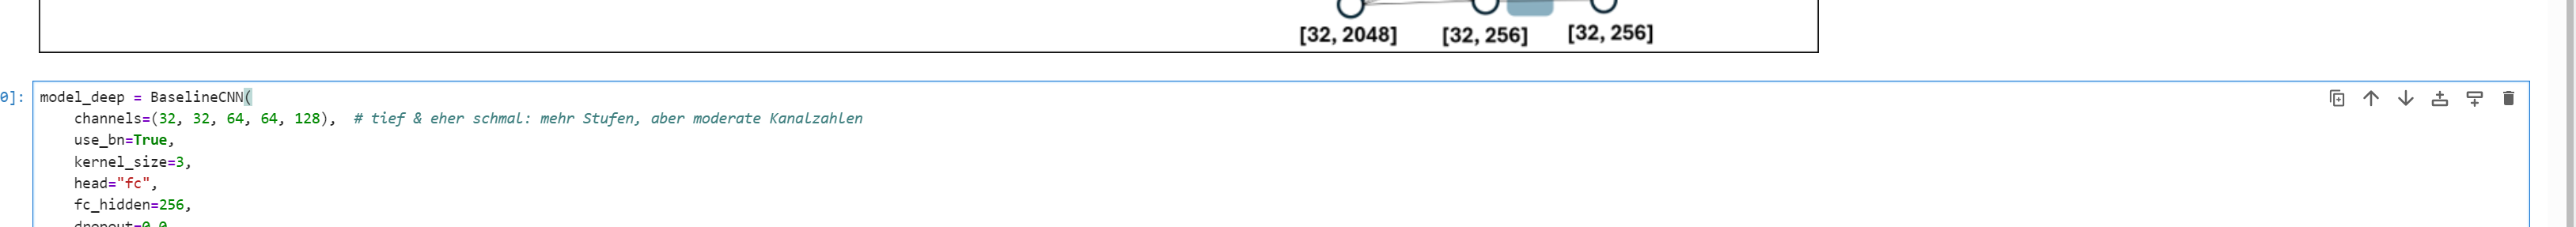

In [ ]:
model_deep = BaselineCNN(
    channels=(32, 32, 64, 64, 128),
    use_bn=True,
    kernel_size=3,
    head="fc",
    fc_hidden=256,
    dropout=0.0,
    adaptive_pool_out=(4, 4),
)

Die nachfolgende Tabelle fasst die Architektur des tiefen, schmalen Modells nochmals detailliert zusammen.
Im Vergleich zur grafischen Darstellung werden hier insbesondere die Anzahl der trainierbaren Parameter sowie der geschätzte Speicherbedarf während des Trainings ausgewiesen.
Trotz einer insgesamt ähnlichen Parameteranzahl im Vergleich zum Baseline-Modell zeigt sich ein reduzierter Speicherbedarf, was auf die stärkere räumliche Verdichtung der Feature-Maps durch die zusätzliche Tiefe des Netzes zurückzuführen ist.

In [ ]:
model_deep = model_deep.to(device)

summary(
    model_deep,
    input_size=(32, 3, 256, 256),
    col_names=("input_size", "output_size", "num_params", "trainable"),
)

Das tiefe, schmale Modell weist mit rund 665.000 trainierbaren Parametern eine ähnliche Größenordnung wie das Baseline-Modell auf, verteilt die Modellkapazität jedoch stärker über zusätzliche Convolution-Blöcke. Die erhöhte Tiefe führt zu einer stärkeren räumlichen Verdichtung der Feature-Maps bei gleichzeitig moderater Kanalbreite. Dadurch wird die Repräsentationsfähigkeit strukturell verändert, ohne die Gesamtkomplexität stark zu erhöhen.

Im nächsten Schritt wird das tiefe, schmale Modell unter identischen Trainingsbedingungen wie das Baseline-Modell trainiert.

In [ ]:
# Training des Modells
model_deep, hist_deep, cm_deep, wrong_deep = train_model(
    model_deep,
    train_loader_std,
    val_loader_std,
    test_loader_std,
    num_epochs=30,
    lr=1e-3,
)

Im Folgenden wird das beste Modell erneut geladen und zusammen mit den gespeicherten Auswertungsartefakten (Trainingsverlauf, Fehlklassifikationen und Konfusionsmatrix) für die weitere Analyse bereitgestellt.

In [ ]:
# Trainiertes Modell laden
# Basis-Pfade
model_path = "Modelle/BasicCNN/model_deep.pth"
eval_base_path = "Modellauswertungen/BasicCNN"

model_deep.load_state_dict(
    torch.load(model_path, map_location=device)
)
model_deep.to(device)
model_deep.eval()

hist_deep = torch.load(os.path.join(eval_base_path, "HIST/hist_basis_deep.pth"),weights_only=False)
wrong_deep = torch.load(os.path.join(eval_base_path, "WRONG/wrong_deep.pth"),weights_only=False)
cm_deep = np.load(os.path.join(eval_base_path, "CM/cm_deep.npy"))

print("Modell + Hist + Wrong erfolgreich geladen")

In [ ]:
plot_training_history(hist_deep)

Im Trainingsverlauf zeigt das tiefe, schmale Modell eine sehr schnelle Konvergenz. Sowohl Trainings- als auch Validierungsgenauigkeit erreichen bereits nach wenigen Epochen Werte nahe 99 % und verlaufen anschließend stabil. Der Validierungs-Loss sinkt kontinuierlich und weist im Vergleich zum Baseline-Modell deutlich geringere Ausreißer auf.

Auffällig ist insbesondere die False-Positive-Rate: Während beim Baseline-Modell einzelne starke Schwankungen und Ausreißer zu beobachten waren, bleibt die Validierungs-FPR beim tieferen Modell überwiegend auf niedrigem Niveau und stabilisiert sich im weiteren Trainingsverlauf.

Insgesamt deutet der Vergleich darauf hin, dass die erhöhte Netz­tiefe bei moderater Kanalbreite zu einer robusteren und stabileren Optimierung führt, ohne Anzeichen von Overfitting zu zeigen.

In [ ]:
plot_confusion_matrix(cm_deep)

Auf dem Testdatensatz erreicht das tiefe, schmale CNN eine Accuracy von 99,88 % bei einer False-Positive-Rate von 0,16 %. Im Vergleich zum Baseline-Modell reduziert sich die Anzahl der Fehlklassifikationen nochmals leicht. Besonders die Zahl der False Positives sinkt auf lediglich vier Fälle, während nur zwei defekte Verschlüsse fälschlich als „good“ klassifiziert werden.

Damit zeigt das Modell eine insgesamt sehr hohe Klassifikationsleistung bei gleichzeitig stabil niedriger Fehlerrate und bestätigt die positive Wirkung der erhöhten Netz­tiefe auf die Modellperformance.

In [ ]:
plot_misclassifications_by_variant(wrong_deep, variant_stats.keys())

Die verbleibenden Fehlklassifikationen sind stark variantenspezifisch und betreffen primär river_cola_black. Eine generelle Schwäche gegenüber bestimmten Farb- oder Strukturmustern ist nicht erkennbar.

In [ ]:
visualize_misclassification_examples(wrong_deep)

Die detaillierte Analyse zeigt, dass die False Positives ausschließlich bei der Variante river_cola_black auftreten. In allen betrachteten Fällen ist auf den Bildern primär der Flaschenhals sichtbar, während der relevante Inspektionsbereich, insbesondere der Sicherungsring, nicht abgebildet ist. Die Fehlklassifikation ist somit plausibel auf die eingeschränkte Sichtbarkeit des entscheidungsrelevanten Bereichs zurückzuführen und weniger auf eine grundsätzliche Fehlinterpretation durch das Modell.

Die beiden False-Negative-Fälle betreffen einzelne Bilder der Varianten cc_red und flirt_orange. Die dargestellten Defekte wirken visuell eher unauffällig. Zwar ist bei cc_red eine Deformation erkennbar, diese betrifft jedoch nicht eindeutig den Sicherungsring. Auch hier erscheint die Fehlentscheidung aus visueller Perspektive nachvollziehbar.

Insgesamt deuten die verbleibenden Fehler auf grenzwertige oder unvollständig erfasste Bildsituationen hin und nicht auf systematische Schwächen des Modells.

In [ ]:
target_layer_model_deep = model_deep.features[-1][0]

In [ ]:
path_model_deep_gc1 = "/home/archive/TetheredCap/Tamper_Evident_Seal_Inspection_Ring_Only_Lab_Pictures/cc_red/bad/Cam1Side_0000000699.jpg"

show_gradcam_from_path(
    model_deep,
    path_model_deep_gc1,
    target_layer=target_layer_model_deep,
    transform_step1=transform_step1,
    transform_test_step2=transform_test_step2,
)

In [ ]:
path_model_deep_gc2 = "/home/archive/TetheredCap/Tamper_Evident_Seal_Inspection_Ring_Only_Lab_Pictures/flirt_orange/bad/Cam1Side_0000000325.jpg"

show_gradcam_from_path(
    model_deep,
    path_model_deep_gc2,
    target_layer=target_layer_model_deep,
    transform_step1=transform_step1,
    transform_test_step2=transform_test_step2,
)

Die Grad-CAM-Visualisierungen der beiden False-Negative-Fälle zeigen, dass das Modell seine Aufmerksamkeit grundsätzlich im Bereich des Verschlusses konzentriert. Die aktivierten Regionen liegen im unteren bzw. mittleren Bereich des Deckels und erfassen strukturelle Merkmale der Geometrie.

Allerdings ist keine eindeutig dominante Aktivierung direkt am Sicherungsring erkennbar. Stattdessen werden teilweise angrenzende Strukturen oder kontrastreiche Bereiche stärker gewichtet. Dies liefert eine plausible Erklärung dafür, warum die gezeigten, visuell eher unauffälligen Defekte nicht zuverlässig als „bad“ klassifiziert wurden.

Insgesamt bestätigen die Grad-CAM-Analysen, dass das Modell relevante Bildregionen berücksichtigt, in Grenzfällen jedoch nicht klar zwischen sicherungsringrelevanten Merkmalen und ähnlichen Strukturen differenziert.  

Aufgrund der insgesamt sehr hohen Klassifikationsleistung, der geringen Fehlerrate sowie der konsistenten Fokussierung auf verschlussrelevante Bildbereiche wird das tiefe, schmale CNN im Folgenden als Referenzarchitektur für weitere Experimente verwendet.

### 4.4.4 Einfluss des Klassifikationskopfes

In diesem Abschnitt wird der Einfluss des Klassifikationskopfes auf die Modellleistung untersucht. Als Ausgangsbasis dient das zuvor identifizierte beste Backbone, nämlich das tiefe, schmale CNN, das sich in den vorangegangenen Architekturvergleichen hinsichtlich Stabilität und Klassifikationsleistung als überlegen erwiesen hat. Während die Faltungsarchitektur unverändert beibehalten wird, wird der bisher verwendete vollständig verbundene Klassifikationskopf durch alternative Kopfstrukturen ersetzt. Ziel dieses Experiments ist es, zu analysieren, inwieweit die Wahl des Klassifikationskopfes die Generalisierungsfähigkeit, das Trainingsverhalten sowie die Fehlklassifikationscharakteristik beeinflusst, ohne die zuvor optimierte Feature-Extraktion zu verändern.  
Die folgende Abbildung zeigt die Architektur des Modells mit alternativem Klassifikationskopf schematisch. Bis einschließlich Convolution Block 5 entspricht die Struktur vollständig der zuvor betrachteten tiefen, schmalen Architektur, sodass die Feature-Extraktion unverändert übernommen wird.

Der wesentliche Unterschied liegt im Übergang vom Faltungsnetz zum Klassifikationskopf. Anstelle des bisherigen Flatten-Schritts mit anschließendem vollständig verbundenem Schichtstapel wird hier ein Adaptive Average Pooling eingesetzt, das jede Feature-Map auf einen einzelnen skalaren Wert reduziert. Dadurch wird jede der 128 Feature-Maps auf eine kompakte, globale Repräsentation zusammengefasst, wodurch die räumliche Information vollständig aggregiert wird.

Infolgedessen entfällt der Flatten-Operator, und der Klassifikationskopf reduziert sich auf eine deutlich kompaktere Struktur. Der resultierende 128-dimensionale Feature-Vektor wird direkt über eine lineare Schicht auf die zweidimensionale Ausgabeschicht abgebildet, welche die beiden Klassen repräsentiert. Optional kann an dieser Stelle Dropout zur Regularisierung eingesetzt werden, ohne die zuvor gelernte Feature-Extraktion zu verändern.

<p align="center">
  <img src="Bilder/Architektur_Klassifikationskopf.png" width="1300">
</p>

Auf Basis der dargestellten Architektur wird das Modell im Folgenden in PyTorch implementiert, wobei die Faltungsblöcke unverändert übernommen und ausschließlich der Klassifikationskopf entsprechend der beschriebenen GAP-Struktur angepasst wird.

In [ ]:
model_deep_gap = BaselineCNN(
    channels=(32, 32, 64, 64, 128),  
    use_bn=True,
    kernel_size=3,
    head="gap",                      
    dropout=0.0,
)

Die tabellarische Zusammenfassung der Modellarchitektur verdeutlicht unmittelbar, dass die Anzahl der trainierbaren Parameter im Vergleich zu den zuvor betrachteten Modellen deutlich reduziert ist. Ursache hierfür ist der Wegfall des umfangreichen vollständig verbundenen Klassifikationskopfes, der durch die Global-Average-Pooling-Struktur ersetzt wird. Infolge dessen verringert sich nicht nur die Modellkomplexität, sondern auch der benötigte Speicherbedarf während Training und Inferenz.

In [ ]:
model_deep_gap = model_deep_gap.to(device)

summary(
    model_deep_gap,
    input_size=(32, 3, 256, 256),
    col_names=("input_size", "output_size", "num_params", "trainable"),
)

Das Modell mit Global-Average-Pooling-Klassifikationskopf wird im Folgenden unter identischen Trainingsbedingungen wie die zuvor betrachteten Architekturen trainiert, um einen fairen Vergleich der resultierenden Lern- und Generalisierungseigenschaften zu ermöglichen.

In [ ]:
# Modell trainieren
model_deep_gap, hist_deep_gap, cm_deep_gap, wrong_deep_gap = train_model(
    model_deep_gap,
    train_loader_std,
    val_loader_std,
    test_loader_std,
    num_epochs=30,
    lr=1e-3,
)

In [ ]:
# trainiertes Modell abrufen
# Basis-Pfade
model_path = "Modelle/BasicCNN/model_deep_gap.pth"
eval_base_path = "Modellauswertungen/BasicCNN"

model_deep_gap.load_state_dict(
    torch.load(model_path, map_location=device)
)
model_deep_gap.to(device)
model_deep_gap.eval()

hist_deep_gap = torch.load(os.path.join(eval_base_path, "HIST/hist_deep_gap.pth"),weights_only=False)
wrong_deep_gap = torch.load(os.path.join(eval_base_path, "WRONG/wrong_deep_gap.pth"),weights_only=False)
cm_deep_gap = np.load(os.path.join(eval_base_path, "CM/cm_deep_gap.npy"))

print("Modell + Hist + Wrong erfolgreich geladen")

In [ ]:
plot_training_history(hist_deep_gap)

Der Trainingsverlauf zeigt eine sehr schnelle Konvergenz des Modells. Die Trainingsaccuracy steigt bereits nach wenigen Epochen auf nahezu 100 % an, während der Trainingsloss kontinuierlich gegen Null tendiert. Dies deutet auf eine hohe Anpassungsfähigkeit der Architektur an die Trainingsdaten hin.

Auffällig sind jedoch starke Schwankungen in den Validierungsmetriken, insbesondere in den ersten Epochen. Sowohl Validierungsaccuracy als auch Validierungsloss zeigen vereinzelt deutliche Ausreißer. Diese spiegeln sich auch in der False-Positive-Rate wider, die in einzelnen Epochen stark ansteigt.

Ab etwa der Mitte des Trainings stabilisieren sich die Validierungswerte jedoch deutlich. Accuracy und Loss verlaufen anschließend sehr nahe an den Trainingskurven, was auf eine gute Generalisierung des Modells hindeutet.

Im Vergleich zum zuvor betrachteten Modell mit vollständig verbundenem Klassifikationskopf zeigt der GAP-Kopf eine ähnlich hohe Endleistung, jedoch eine stärkere Instabilität in frühen Trainingsphasen. Dies kann darauf zurückgeführt werden, dass durch Global Average Pooling die räumliche Information stark komprimiert wird und der Klassifikator unmittelbar auf global aggregierten Features basiert.

In [ ]:
plot_confusion_matrix(cm_deep_gap)

Die Konfusionsmatrix zeigt eine sehr hohe Klassifikationsleistung mit einer Accuracy von 99,90 %. Von 2.579 tatsächlich guten Verschlüssen wurden lediglich 5 fälschlicherweise als „bad“ klassifiziert (False Positives). Gleichzeitig wurde kein einziger fehlerhafter Verschluss als „good“ vorhergesagt (0 False Negatives).

Die False-Positive-Rate liegt mit 0,19 % auf sehr niedrigem Niveau. Besonders hervorzuheben ist das vollständige Vermeiden von False Negatives, was im industriellen Kontext von hoher Relevanz ist, da keine fehlerhaften Teile als gut freigegeben würden.

Trotz der deutlichen Reduktion der trainierbaren Parameter durch den Einsatz von Global Average Pooling bleibt die Klassifikationsleistung auf exzellentem Niveau. Dies deutet darauf hin, dass die zuvor gelernte Feature-Extraktion ausreichend diskriminative Merkmale liefert und ein komplexer Fully-Connected-Kopf für diese Aufgabe nicht erforderlich ist.

In [ ]:
plot_misclassifications_by_variant(wrong_deep_gap, variant_stats.keys())

Im Testdatensatz treten insgesamt fünf Fehlklassifikationen auf. Alle Fehler entfallen auf die Variante river_cola_black und sind ausschließlich False Positives, also good als bad klassifiziert. False Negatives treten nicht auf.

Die Fehlklassifikationen sind damit klar auf eine einzelne Variante konzentriert und nicht über mehrere Varianten verteilt. Alle übrigen Verschlussvarianten werden vollständig korrekt klassifiziert.

Die Konzentration der Fehler auf river_cola_black deutet darauf hin, dass spezifische visuelle Eigenschaften dieser Variante, insbesondere Kontrast und Belichtung, die Modellentscheidung beeinflussen. Insgesamt bestätigt die sehr geringe Fehleranzahl jedoch die hohe Stabilität und Robustheit des Modells im Testdatensatz.

In [ ]:
visualize_misclassification_examples(wrong_deep_gap)

Alle fünf False Positives treten ausschließlich bei der Variante river_cola_black auf. In den meisten Fällen ist überwiegend der Flaschenhals sichtbar und der relevante Bereich des Sicherungsrings nur eingeschränkt erkennbar. In einem Fall ist der Verschluss zwar sichtbar, jedoch erschweren starke Kontraste und Reflexionen die klare Abgrenzung der sicherungsringrelevanten Strukturen.

Die Kombination aus dunkler Farbgebung, Spiegelungen und geringem Detailkontrast führt offenbar dazu, dass das Modell einzelne Struktur- oder Lichtartefakte als potenziellen Defekt interpretiert.

False Negatives treten in dieser Konfiguration nicht auf. Insgesamt zeigen die Detailbilder, dass die verbleibenden Fehlklassifikationen auf spezielle visuelle Randbedingungen beschränkt sind und keine generelle Schwäche bei klar erkennbaren Defekten vorliegt.

In [ ]:
target_layer_deep_gap = model_deep_gap.features[-1][0]

In [ ]:
path_model_deep_gap_gc1 = "/home/archive/TetheredCap/Tamper_Evident_Seal_Inspection_Ring_Only_Lab_Pictures/river_cola_black/good/Cam1Side_0000000087.jpg"

show_gradcam_from_path(
    model_deep_gap,
    path_model_deep_gap_gc1,
    target_layer=target_layer_deep_gap,
    transform_step1=transform_step1,
    transform_test_step2=transform_test_step2,
)

Im vorliegenden Fehlklassifikationsbeispiel ist der Verschluss inklusive Sicherungsring vollständig sichtbar. Die Grad-CAM hebt den Bereich des Sicherungsrings deutlich als entscheidungsrelevant hervor. Gleichzeitig ist im Originalbild in diesem Bereich eine starke Reflexion erkennbar, was darauf hindeutet, dass nicht die strukturelle Integrität des Rings selbst, sondern lokale Helligkeitsartefakte die Klassifikation beeinflusst haben könnten.

Auffällig ist zudem, dass Teile des gepaddeten Randbereichs ebenfalls Aktivierungen zeigen. Dies ist insofern unerwartet, als dieser Bereich keine inhaltliche Information trägt und idealerweise keinen Einfluss auf die Entscheidung haben sollte.

Zusammenfassend zeigt sich, dass der Global-Average-Pooling-Klassifikationskopf im Vergleich zum vollständig verbundenen Kopf eine leicht bessere Testleistung erzielt, obwohl die Anzahl der trainierbaren Parameter deutlich reduziert wurde. Gleichzeitig sinkt die Modellkomplexität, insbesondere im Klassifikationskopf, was sowohl den Speicherbedarf als auch die Trainingsstabilität positiv beeinflusst.

Für die nachfolgenden Experimente wird daher die Architektur mit Global-Average-Pooling-Kopf als Grundlage verwendet, da sie bei geringerer Komplexität mindestens gleichwertige, in diesem Fall sogar leicht bessere Ergebnisse liefert.

### 4.4.5 Aktivierung von Dropout zur Reduktion von Overfitting

In den bisherigen Experimenten zeigte das Modell kein ausgeprägtes Overfitting. Trainings- und Validierungsmetriken verlaufen stabil und auf vergleichbarem Niveau, und auch die Testleistung bestätigt eine gute Generalisierungsfähigkeit.

Dennoch wird der Einfluss von Dropout als zusätzliche Regularisierungsmaßnahme untersucht. Ziel ist es, systematisch zu prüfen, ob sich durch die zufällige Deaktivierung einzelner Feature-Dimensionen im Klassifikationskopf eine weitere Stabilisierung des Trainingsverlaufs oder eine geringfügige Verbesserung der Fehlklassifikationsrate erreichen lässt.

Als Ausgangsbasis dient das zuvor identifizierte beste Modell mit Global-Average-Pooling-Klassifikationskopf. Die Faltungsarchitektur bleibt unverändert, ergänzt wird lediglich eine Dropout-Schicht mit einer Rate von 0,25 vor der finalen linearen Klassifikationsschicht. Damit wird isoliert der Effekt von Dropout analysiert, ohne die zuvor optimierte Feature-Extraktion zu verändern.  

Der folgende Code instanziiert das zuvor definierte tiefe, schmale CNN mit Global-Average-Pooling-Klassifikationskopf erneut. Die Faltungsarchitektur sowie alle zentralen Hyperparameter bleiben unverändert. Einzige Anpassung ist die Aktivierung von Dropout mit einer Rate von 0,25 im Klassifikationskopf. Dadurch entspricht die Modellstruktur der vorherigen Variante, wird jedoch um eine zusätzliche Regularisierungskomponente ergänzt.

In [ ]:
model_deep_dropout = BaselineCNN(
    channels=(32, 32, 64, 64, 128),
    use_bn=True,
    kernel_size=3,
    head="gap",
    dropout=0.25,
)

In [ ]:
# Training des Modells
model_deep_dropout, hist_deep_dropout, cm_deep_dropout, wrong_deep_dropout = train_model(
    model_deep_dropout,
    train_loader_std,
    val_loader_std,
    test_loader_std,
    num_epochs=30,
    lr=1e-3,
)

In [ ]:
# trainiertes Modell und Trainingshistorie etc. laden
# Basis-Pfade
model_path = "Modelle/BasicCNN/model_deep_dropout.pth"
eval_base_path = "Modellauswertungen/BasicCNN"

model_deep_dropout.load_state_dict(
    torch.load(model_path, map_location=device)
)
model_deep_dropout.to(device)
model_deep_dropout.eval()

hist_deep_dropout = torch.load(os.path.join(eval_base_path, "HIST/hist_deep_dropout.pth"),weights_only=False)
wrong_deep_dropout = torch.load(os.path.join(eval_base_path, "WRONG/wrong_deep_dropout.pth"),weights_only=False)
cm_deep_dropout = np.load(os.path.join(eval_base_path, "CM/cm_deep_dropout.npy"))

print("Modell + Hist + Wrong erfolgreich geladen")

In [ ]:
plot_training_history(hist_deep_dropout)

Der Trainingsverlauf zeigt weiterhin eine sehr schnelle Konvergenz. Die Trainingsaccuracy steigt bereits in den ersten Epochen auf nahezu 100 % und bleibt dort stabil. Auch der Trainingsloss fällt kontinuierlich gegen Null.

Die Validierungsaccuracy erreicht ebenfalls früh sehr hohe Werte, zeigt jedoch in den ersten Epochen stärkere Schwankungen als ohne Dropout. Einzelne Ausreißer im Validierungs-Loss sowie in der False-Positive-Rate sind deutlich erkennbar. Ab etwa Epoche 12 stabilisieren sich die Validierungsmetriken jedoch auf einem sehr niedrigen Niveau.

Insgesamt ist kein klassisches Overfitting-Verhalten erkennbar, da Trainings- und Validierungsperformance weiterhin eng beieinanderliegen. Der Einsatz von Dropout führt in diesem Setting nicht zu einer sichtbaren Verbesserung der Generalisierung, sondern erhöht insbesondere in der frühen Trainingsphase die Schwankungen der Validierungsmetriken.

In [ ]:
plot_confusion_matrix(cm_deep_dropout)

Die Konfusionsmatrix im Test zeigt eine Accuracy von 99,90 % bei einer False-Positive-Rate von 0,19 %. Es treten fünf False Positives und keine False Negatives auf. Damit entspricht das Ergebnis exakt der zuvor betrachteten GAP-Variante ohne Dropout.

Im Vergleich zur Architektur ohne Dropout ergibt sich somit keine messbare Verbesserung der Klassifikationsleistung. Weder die Anzahl der Fehlklassifikationen noch die Fehlertypen verändern sich.

Der Einsatz von Dropout führt in diesem Setting daher nicht zu einer Leistungssteigerung, bestätigt jedoch die bereits zuvor beobachtete gute Generalisierungsfähigkeit des Modells.

In [ ]:
plot_misclassifications_by_variant(wrong_deep_dropout, variant_stats.keys())

Die Fehlklassifikationen im Test konzentrieren sich ausschließlich auf die Variante river_cola_black. Es treten fünf False Positives auf, während keine False Negatives beobachtet werden. Alle übrigen Varianten werden vollständig korrekt klassifiziert.

Damit zeigt das Modell eine sehr stabile Generalisierung über nahezu alle Varianten hinweg. Die Fehler sind klar auf eine einzelne, visuell anspruchsvollere Variante begrenzt und deuten nicht auf ein generelles Schwächenprofil der Architektur hin.

Auffällig ist zudem, dass dieses Ergebnis exakt dem Modell ohne aktiviertes Dropout entspricht. Weder die Anzahl noch die Verteilung der Fehlklassifikationen verändern sich durch den Einsatz von Dropout. In diesem Setting lässt sich somit kein zusätzlicher Regularisierungseffekt feststellen.

In [ ]:
visualize_misclassification_examples(wrong_deep_dropout)

Die Fehlklassifikationen entsprechen weitgehend dem zuvor betrachteten Modell ohne Dropout. Die Bilder, auf denen ausschließlich der Flaschenhals sichtbar ist und der relevante Bereich des Sicherungsrings nicht im Bildausschnitt enthalten ist, werden identisch fehlklassifiziert.

Zusätzlich tritt wie bereits ohne Dropout erneut eine Fehlklassifikation bei einem Bild auf, in dem der relevante Bereich grundsätzlich sichtbar ist. In diesem Fall erschweren jedoch starke Reflexionen sowie ungünstige Beleuchtungs und Kontrastverhältnisse die klare Erkennbarkeit der Struktur des Sicherungsrings.

Insgesamt zeigt sich damit, dass Dropout mit einer Rate von 0,25 weder die Art noch das Muster der Fehlklassifikationen substantiell verändert. Die Fehler bleiben strukturell vergleichbar, was darauf hindeutet, dass kein ausgeprägtes Overfitting vorliegt und zusätzliche Regularisierung in dieser Konfiguration keinen erkennbaren Vorteil bringt.

In [ ]:
target_layer_deep_dropout = model_deep_dropout.features[-1][0]

In [ ]:
path_model_deep_dropout_gc1 = "/home/archive/TetheredCap/Tamper_Evident_Seal_Inspection_Ring_Only_Lab_Pictures/river_cola_black/good/Cam2Side_0000000187.jpg"

show_gradcam_from_path(
    model_deep_dropout,
    path_model_deep_dropout_gc1,
    target_layer=target_layer_deep_dropout,
    transform_step1=transform_step1,
    transform_test_step2=transform_test_step2,
)

Die Grad-CAM-Visualisierung der verbliebenen Fehlklassifikation zeigt ein ähnliches Muster wie beim Modell ohne Dropout. Zwar liegt ein Teil der Aktivierung im Bereich des Verschlusses, jedoch wird auch der Padding-Bereich deutlich mit in die Entscheidungsfindung einbezogen. Der Fokus verteilt sich somit nicht ausschließlich auf die strukturell relevanten Merkmale des Sicherungsrings.

Zu beachten ist, dass es sich hierbei nur um ein einzelnes Beispiel handelt und keine generelle Aussage über alle möglichen Fehlklassifikationen erlaubt.

Insgesamt zeigt sich, dass die Aktivierung von Dropout mit einer Rate von 0,25 keinen erkennbaren Vorteil hinsichtlich Trainingsstabilität, Generalisierung oder Fehlklassifikationsmuster gebracht hat. Die Testmetriken sowie die Art der Fehlentscheidungen bleiben praktisch unverändert.

Aus diesem Grund wird in den folgenden Experimenten auf Dropout verzichtet und das Modell ohne zusätzliche Regularisierung im Klassifikationskopf weiterverwendet.

### 4.4.6 Deaktivierung der Batch-Normalisierung

In diesem Abschnitt wird der Einfluss der Batch-Normalisierung auf das Trainings- und Generalisierungsverhalten des Modells untersucht. Als Ausgangspunkt dient erneut das zuvor identifizierte beste Modell. Architektur, Datenvorverarbeitung und sämtliche Hyperparameter bleiben unverändert. Die einzige Modifikation besteht in der Deaktivierung der Batch-Normalisierung innerhalb der Convolution-Blöcke.

Batch-Normalisierung dient primär der Stabilisierung der Aktivierungen und kann die Konvergenz während des Trainings beschleunigen. Sie wirkt damit weniger als klassische Regularisierung im Sinne von Dropout, sondern vielmehr als Normalisierungsbaustein zur Reduktion interner Kovariatenverschiebung. Insbesondere bei kleineren Batch-Größen kann es jedoch zu schwankenden Statistikschätzungen kommen, was sich potenziell auf die Stabilität des Validierungsverlaufs auswirken kann.

Da Architektur, Datenbasis und Trainingsparameter unverändert bleiben, lässt sich der Effekt der Batch-Normalisierung in diesem Experiment isoliert bewerten. Ziel ist es zu analysieren, ob der Verzicht auf Batch-Normalisierung in diesem Szenario zu einem stabileren oder instabileren Trainings- und Validierungsverlauf führt und welche Auswirkungen sich auf Konvergenz und Modellleistung im Test ergeben.

In [ ]:
model_deep_no_bn = BaselineCNN(
    channels=(32, 32, 64, 64, 128),
    use_bn=False,
    kernel_size=3,
    head="gap",
    dropout=0.0,
)

In [ ]:
model_deep_no_bn, hist_deep_no_bn, cm_deep_no_bn, wrong_deep_no_bn = train_model(
    model_deep_no_bn,
    train_loader_std,
    val_loader_std,
    test_loader_std,
    num_epochs=30,
    lr=1e-3,
)

In [ ]:
# trainiertes Modell und Trainingshistorie etc. laden
# Basis-Pfade
model_path = "Modelle/BasicCNN/model_deep_no_bn.pth"
eval_base_path = "Modellauswertungen/BasicCNN"

model_deep_no_bn.load_state_dict(
    torch.load(model_path, map_location=device)
)
model_deep_no_bn.to(device)
model_deep_no_bn.eval()

hist_deep_no_bn = torch.load(os.path.join(eval_base_path, "HIST/hist_deep_no_bn.pth"),weights_only=False)
wrong_deep_no_bn = torch.load(os.path.join(eval_base_path, "WRONG/wrong_deep_no_bn.pth"),weights_only=False)
cm_deep_no_bn = np.load(os.path.join(eval_base_path, "CM/cm_deep_no_bn.npy"))

print("Modell + Hist + Wrong erfolgreich geladen")

In [ ]:
plot_training_history(hist_deep_no_bn)

Der Trainingsverlauf ohne Batch-Normalisierung zeigt eine sehr schnelle Konvergenz. Trainings- und Validierungsaccuracy erreichen bereits nach wenigen Epochen nahezu 100 %. Auch der Loss fällt stark ab und bleibt anschließend auf sehr niedrigem Niveau. Der Abstand zwischen Trainings- und Validierungsmetriken ist gering, was zunächst auf eine stabile Generalisierung hindeutet.

Auffällig ist jedoch die sehr steile Anfangskonvergenz sowie die nahezu perfekte Übereinstimmung beider Kurven über weite Teile des Trainings. Im Vergleich zu den Modellen mit Batch-Normalisierung wirkt der Verlauf weniger gedämpft und stärker deterministisch.

Die False-Positive-Rate zeigt zu Beginn erhöhte Schwankungen, stabilisiert sich jedoch im weiteren Verlauf ebenfalls auf sehr niedrigem Niveau.

Insgesamt deutet der Trainingsverlauf darauf hin, dass Batch-Normalisierung in diesem Szenario nicht zwingend erforderlich ist, um eine stabile Konvergenz zu erreichen. Eine abschließende Bewertung erfolgt jedoch anhand der Testmetriken.

In [ ]:
plot_confusion_matrix(cm_deep_no_bn)

Die Testkonfusionsmatrix bestätigt die im Trainingsverlauf beobachtete hohe Leistungsfähigkeit des Modells ohne Batch-Normalisierung. Mit einer Accuracy von 99,88 % und einer False-Positive-Rate von 0,19 % liegt die Performance auf nahezu identischem Niveau wie bei der Variante mit aktivierter Batch-Normalisierung.

Es treten fünf False Positives und ein False Negative auf. Damit ist die Fehlerverteilung weiterhin sehr gering und ausgewogen. Insgesamt zeigt sich, dass die Deaktivierung der Batch-Normalisierung in diesem Szenario keinen signifikanten Leistungsabfall verursacht, jedoch auch keinen erkennbaren Vorteil bringt.

In [ ]:
plot_misclassifications_by_variant(wrong_deep_no_bn, variant_stats.keys())

Die Analyse der Fehlklassifikationen je Verschlussvariante zeigt, dass die Fehler weiterhin stark auf einzelne Varianten konzentriert sind. Die fünf False Positives treten ausschließlich bei river_cola_black auf. Zusätzlich ist ein einzelnes False Negative bei topsport_green zu beobachten.

Alle übrigen Varianten werden im Testdatensatz fehlerfrei klassifiziert. Das Fehlermuster entspricht damit weitgehend dem zuvor beobachteten Verhalten mit aktivierter Batch-Normalisierung. Es zeigen sich keine neuen systematischen Schwächen oder Verschiebungen in der Fehlerverteilung.

In [ ]:
visualize_misclassification_examples(wrong_deep_no_bn)

Die detaillierte Betrachtung der Fehlklassifikationen bestätigt das zuvor beobachtete Muster. Die False Positives bei river_cola_black treten überwiegend bei Bildern auf, in denen entweder nur der Flaschenhals sichtbar ist oder der relevante Bereich des Sicherungsrings stark überstrahlt beziehungsweise kontrastarm erscheint. In diesen Fällen sind die charakteristischen Strukturen des Rings nur eingeschränkt erkennbar, was die Entscheidung des Modells erschwert.

Zusätzlich zeigt sich ein einzelnes False Positive, bei dem der Deckelbereich zwar sichtbar ist, jedoch ebenfalls ungünstige Beleuchtung und geringe Kontraste vorliegen. Auch hier scheint die visuelle Abgrenzung zwischen intaktem und auffälligem Bereich erschwert zu sein.

Das einzige False Negative bei flirt_orange zeigt eine eher unauffällige Deformation. Der Sicherungsring ist nicht klar gebrochen oder deutlich verschoben, sodass die Fehlentscheidung aus visueller Sicht nachvollziehbar erscheint.

Insgesamt lassen sich keine neuen systematischen Fehlerquellen erkennen. Die Fehlklassifikationen sind auf wenige, visuell anspruchsvolle Randfälle beschränkt.

In [ ]:
target_layer_model_deep_no_bn = model_deep_no_bn.features[-1][0]

In [ ]:
path_model_deep_no_bn_gc1 = "/home/archive/TetheredCap/Tamper_Evident_Seal_Inspection_Ring_Only_Lab_Pictures/river_cola_black/good/Cam2Side_0000000302.jpg"

show_gradcam_from_path(
    model_deep_no_bn,
    path_model_deep_no_bn_gc1,
    target_layer=target_layer_model_deep_no_bn,
    transform_step1=transform_step1,
    transform_test_step2=transform_test_step2,
)

In [ ]:
path_model_deep_no_bn_gc2 = "/home/archive/TetheredCap/Tamper_Evident_Seal_Inspection_Ring_Only_Lab_Pictures/flirt_orange/bad/Cam1Side_0000000325.jpg"

show_gradcam_from_path(
    model_deep_no_bn,
    path_model_deep_no_bn_gc2,
    target_layer=target_layer_model_deep_no_bn,
    transform_step1=transform_step1,
    transform_test_step2=transform_test_step2,
)

Die Grad-CAM-Visualisierungen der Fehlklassifikationen ohne Batch-Normalisierung zeigen ein ähnliches Muster wie in den vorherigen Experimenten. Beim False Positive wird der Bereich des Sicherungsrings deutlich aktiviert, was darauf hinweist, dass das Modell grundsätzlich relevante Strukturen berücksichtigt. Gleichzeitig ist jedoch auch eine Aktivierung im Bereich des schwarzen Paddings erkennbar, sodass die Entscheidung nicht ausschließlich auf dem inhaltlich relevanten Bildbereich basiert.

Beim False Negative liegt der Fokus ebenfalls auf dem Verschlussbereich, insbesondere auf Strukturen des Rings. Zusätzlich treten jedoch Aktivierungen im Rand- beziehungsweise Padding-Bereich auf. Dies deutet darauf hin, dass auch ohne Batch-Normalisierung keine vollständig saubere Trennung zwischen Objekt- und Hintergrundinformationen erfolgt.

Insgesamt bestätigt die Grad-CAM-Analyse, dass die Deaktivierung der Batch-Normalisierung keine qualitative Verbesserung der Entscheidungsfokussierung bewirkt hat. Die genutzten Bildbereiche entsprechen weitgehend den zuvor beobachteten Mustern.

### 4.4.8 Einsatz von Data Augmentation

In diesem Abschnitt wird exemplarisch der Einsatz von Data Augmentation untersucht, um die Generalisierungsfähigkeit des Modells weiter zu stärken. Im vorliegenden Anwendungsfall ist Augmentation insbesondere deshalb sinnvoll, weil in realen Produktions- und Aufnahmesituationen Variationen in Beleuchtung, Kontrast sowie leichte Lage und Ausrichtung der Flaschen auftreten können. Durch gezielte, moderate Transformationen kann das Modell robuster gegenüber solchen Abweichungen werden und weniger stark von spezifischen Aufnahmebedingungen der Trainingsdaten abhängen.

Zur Demonstration wird eine Augmentierungsvariante mit bewusst moderaten Parametern definiert, um realistische Bildveränderungen zu simulieren, ohne die relevanten Merkmale des Verschlussbereichs künstlich zu verfälschen. Hierfür wird ein separater Transformationsschritt ausschließlich für das Training erstellt. Auf Basis dieses Trainings-Transforms werden anschließend eigene DataLoader für Train, Validation und Test erzeugt, sodass die Augmentation sauber von den übrigen Pipeline-Schritten getrennt bleibt.

Das Modell wird danach mit unveränderter Architektur und identischen Trainingsparametern erneut trainiert und evaluiert. Dadurch lässt sich der Einfluss der Augmentation isoliert betrachten, während das Notebook zugleich zeigt, wie sich weitere Augmentierungsvarianten durch Anpassung der Transform-Parameter flexibel ergänzen lassen.

In [ ]:
transform_train_augV1 = build_train_transform(
    rot_deg=2,
    hflip_p=0,
    brightness=0.1,
    contrast=0.1,
    saturation=0.1,
    hue=0.02,
)

In [ ]:
train_loader_augV1, val_loader_augV1, test_loader_augV1 = create_dataloaders(
    train_paths=train_paths,
    val_paths=val_paths,
    test_paths=test_paths,
    preprocessed_dir=preprocessed_path,
    transform_step1=transform_step1,
    transform_train_step2=transform_train_augV1,
    transform_test_step2=transform_test_step2,
    batch_size=32,
    num_workers=0,
    shuffle_train=True,
)

In [ ]:
model_deep_augV1 = BaselineCNN(
    channels=(32, 32, 64, 64, 128),
    use_bn=True,
    kernel_size=3,
    head="gap",
    dropout=0.0,
)

In [ ]:
# Modell trainieren
model_deep_augV1, hist_deep_augV1, cm_deep_augV1, wrong_deep_augV1 = train_model(
    model_deep_augV1,
    train_loader_augV1,
    val_loader_std,
    test_loader_std,
    num_epochs=30,
    lr=1e-3,
)

In [ ]:
# trainiertes Modell und Trainingshistorie etc. laden
# Basis-Pfade
model_path = "Modelle/BasicCNN/model_deep_augV1.pth"
eval_base_path = "Modellauswertungen/BasicCNN"

model_deep_augV1.load_state_dict(
    torch.load(model_path, map_location=device)
)
model_deep_augV1.to(device)
model_deep_augV1.eval()

hist_deep_augV1 = torch.load(os.path.join(eval_base_path, "HIST/hist_deep_augV1.pth"),weights_only=False)
wrong_deep_augV1 = torch.load(os.path.join(eval_base_path, "WRONG/wrong_deep_augV1.pth"),weights_only=False)
cm_deep_augV1 = np.load(os.path.join(eval_base_path, "CM/cm_deep_augV1.npy"))

print("Modell + Hist + Wrong erfolgreich geladen")

In [ ]:
plot_training_history(hist_deep_augV1)

Der Trainingsverlauf zeigt, dass das Modell auch unter Einsatz von Data Augmentation sehr schnell konvergiert. Die Trainingsgenauigkeit erreicht bereits nach wenigen Epochen nahezu 100 %, und auch die Validierungsgenauigkeit bewegt sich auf einem vergleichbar hohen Niveau.

Zwar treten im Validierungs-Loss einzelne deutliche Ausreißer auf, insgesamt verschlechtert sich die Modellleistung durch die Augmentation jedoch nicht. Ein systematisches Auseinanderlaufen von Trainings- und Validierungskurven ist weiterhin nicht erkennbar, sodass kein Hinweis auf verstärktes Overfitting besteht.

Die False-Positive-Rate bleibt über weite Strecken sehr niedrig und zeigt lediglich vereinzelte Peaks. Insgesamt lässt sich festhalten, dass die gewählte moderate Augmentation die Stabilität nicht signifikant verbessert, die Modellleistung jedoch auch nicht negativ beeinflusst.

In [ ]:
plot_confusion_matrix(cm_deep_augV1)

Die Konfusionsmatrix im Test zeigt eine Accuracy von 99,92 % bei einer False-Positive-Rate von 0,16 %. Insgesamt werden lediglich vier Good-Flaschen fälschlicherweise als Bad klassifiziert, während keine Bad-Flasche als Good vorhergesagt wird.

Im Vergleich zur Variante ohne Augmentation ergibt sich damit eine minimale Verbesserung der Gesamtgenauigkeit sowie eine leicht reduzierte Anzahl an Fehlklassifikationen. Die Data Augmentation verschlechtert das Modellverhalten somit nicht, sondern führt in dieser Konfiguration zu einer geringfügig robusteren Generalisierung.

In [ ]:
plot_misclassifications_by_variant(wrong_deep_augV1, variant_stats.keys())

Die Verteilung der Fehlklassifikationen zeigt, dass alle vier False Positives ausschließlich der Variante river_cola_black zuzuordnen sind. Für alle übrigen Verschlussvarianten treten im Test keine Fehlklassifikationen auf.

Damit bleibt das Fehlermuster identisch zur vorherigen besten GAP-Variante ohne Augmentation. Die Data Augmentation verändert also weder die strukturelle Fehlercharakteristik noch verschiebt sie die problematische Variante, reduziert jedoch die Gesamtanzahl der Fehler geringfügig.

In [ ]:
visualize_misclassification_examples(wrong_deep_augV1)

Die Detailanalyse der Fehlklassifikationen bestätigt das zuvor beobachtete Muster. Sämtliche False Positives betreffen weiterhin die Variante river_cola_black. Wie bereits in den vorherigen Experimenten treten die Fehlentscheidungen ausschließlich bei Bildern auf, in denen der relevante Bereich nur eingeschränkt sichtbar ist oder starke Reflexionen und Kontrastprobleme vorliegen.

False Negatives treten unter Einsatz der Data Augmentation im Test nicht auf.

Insgesamt zeigt sich damit, dass die moderate Augmentierung die Fehlerstruktur nicht verändert, jedoch auch keine zusätzlichen systematischen Fehlklassifikationen einführt. Das Modell bleibt stabil und behält sein charakteristisches Fehlermuster bei.

In [ ]:
target_layer_model_deep_augV1 = model_deep_augV1.features[-1][0]

Der Target-Layer für Grad-CAM wird an dieser Stelle bereits definiert, da im weiteren Verlauf eine vergleichende Analyse einzelner Modellvarianten vorgesehen ist. Für die hier betrachteten Fehlklassifikationen liefert eine zusätzliche Grad-CAM-Analyse jedoch keinen substanziellen Mehrwert, da in den betroffenen Bildern der relevante Verschlussbereich  nicht sichtbar ist. Die Fehlentscheidungen sind somit primär auf unzureichende visuelle Information im Eingabebild zurückzuführen und weniger auf eine systematische Fehlfokussierung des Modells.

Insgesamt zeigt die eingesetzte Variante der Data Augmentation einen leicht positiven Einfluss auf die Modellleistung. Die Accuracy steigt geringfügig, die False Positive Rate sinkt weiter, und es treten keine zusätzlichen Fehlklassifikationen auf. Die verbleibenden Fehler beschränken sich auf Bilder, in denen der relevante Bildbereich nicht klar erkennbar ist.

In einer realen Anwendung würden an dieser Stelle weitere Augmentierungsstrategien mit unterschiedlichen Parametern systematisch untersucht und miteinander verglichen. Die hier gewählte, moderat konfigurierte Augmentierung liefert jedoch bereits sehr stabile und nahezu optimale Ergebnisse. Aus diesem Grund werden genau diese Augmentierungsparameter im anschließenden Generalisierungstest mittels Leave-One-Variant-Out weiterverwendet.

### 4.4.9 CNN von Grund auf - Generalisierungstest mittels Leave-One-Variant-Out

In diesem Abschnitt wird die Generalisierungsfähigkeit des final ausgewählten Modells mittels eines Leave-One-Variant-Out-Ansatzes untersucht. Dabei wird jeweils eine vollständige Verschlussvariante vollständig aus dem Training ausgeschlossen und ausschließlich als Testdatensatz verwendet, während das Modell auf allen verbleibenden Varianten trainiert wird.

Dieser Test ist insbesondere praxisrelevant, da das Inspektionssystem in realen Anwendungen regelmäßig auf neue Verschlussvarianten angepasst werden muss, während die Erzeugung und Annotation umfangreicher Trainings- und Testdatensätze für neue Verschlüsse mit hohem Aufwand verbunden ist. Der Leave-One-Variant-Out-Ansatz erlaubt daher eine realitätsnahe Bewertung, inwieweit das bislang beste Modell in der Lage ist, auf dem Modell bislang unbekannte Verschlussvarianten zu generalisieren.

Um ein breiteres und belastbareres Bild der Übertragbarkeit auf zuvor ungesehene Varianten zu erhalten, werden im Folgenden zwei unterschiedliche Leave-One-Variant-Out-Splits betrachtet und separat ausgewertet.

<u><strong>Variante cc_red</strong></u>  

Im Folgenden wird der Leave-One-Variant-Out-Split exemplarisch für die Variante cc_red umgesetzt. Die zuvor definierte Augmentierungsstrategie bleibt dabei unverändert, sodass die Übertragbarkeit des bisher besten Modells unter realitätsnahen Trainingsbedingungen geprüft wird.

In [ ]:
train_loader_ccred_aug, val_loader_ccred_aug, test_loader_ccred_aug = create_dataloaders(
    train_paths_lovo_ccred,
    val_paths_lovo_ccred,
    test_paths_lovo_ccred,
    preprocessed_dir=preprocessed_path,
    transform_step1=transform_step1,
    transform_train_step2=transform_train_augV1,
    transform_test_step2=transform_test_step2,
)

In [ ]:
model_deep_lovo_ccred = BaselineCNN(
    channels=(32, 32, 64, 64, 128),
    use_bn=True,
    kernel_size=3,
    head="fc",
    fc_hidden=256,
    dropout=0.0,
    adaptive_pool_out=(4, 4),
)

In [ ]:
# Modell trainieren
model_deep_lovo_ccred, hist_deep_lovo_ccred, cm_deep_lovo_ccred, wrong_deep_lovo_ccred = train_model(
    model_deep_lovo_ccred,
    train_loader_ccred,
    val_loader_ccred,
    test_loader_ccred,
    num_epochs=30,
    lr=1e-3,
)

In [ ]:
# trainiertes Modell und Trainingshistorie etc. laden
# Basis-Pfade
model_path = "Modelle/BasicCNN/model_deep_lovo_ccred.pth"
eval_base_path = "Modellauswertungen/BasicCNN"

model_deep_lovo_ccred.load_state_dict(
    torch.load(model_path, map_location=device)
)
model_deep_lovo_ccred.to(device)
model_deep_lovo_ccred.eval()

hist_deep_lovo_ccred = torch.load(os.path.join(eval_base_path, "HIST/hist_deep_lovo_ccred.pth"),weights_only=False)
wrong_deep_lovo_ccred = torch.load(os.path.join(eval_base_path, "WRONG/wrong_deep_lovo_ccred.pth"),weights_only=False)
cm_deep_lovo_ccred = np.load(os.path.join(eval_base_path, "CM/cm_deep_lovo_ccred.npy"))

print("Modell + Hist + Wrong erfolgreich geladen")

In [ ]:
plot_training_history(hist_deep_lovo_ccred)

Der Trainingsverlauf zeigt auch im Leave-One-Variant-Out-Szenario eine stabile Konvergenz. Trainings- und Validierungsaccuracy nähern sich schnell hohen Werten an, und der Loss sinkt kontinuierlich. Einzelne Ausschläge in der False Positive Rate sind sichtbar, stabilisieren sich jedoch im weiteren Verlauf.

Für die Bewertung der Generalisierungsfähigkeit ist dieser Verlauf allerdings nur bedingt aussagekräftig. Entscheidend ist die Performance auf der vollständig ausgeschlossenen Variante im Testdatensatz, da sich dort zeigt, ob das Modell tatsächlich auf eine zuvor unbekannte Verschlussvariante übertragen kann.

In [ ]:
plot_confusion_matrix(cm_deep_lovo_ccred)

Die Konfusionsmatrix für die vollständig ausgeschlossene Variante cc_red zeigt einen klaren, aber erwartbaren Leistungsabfall im Vergleich zu den bisherigen Standard-Splits.

Mit einer Accuracy von 97,72 % und einer False Positive Rate von 2,00 % liegt die Performance weiterhin auf einem hohen Niveau, jedoch deutlich unter den nahezu perfekten Ergebnissen, die erzielt wurden, wenn alle Varianten im Training enthalten waren. Konkret treten 42 False Positives (good → bad) und 29 False Negatives (bad → good) auf. Beide Fehlertypen nehmen also sichtbar zu.

Dieser Unterschied verdeutlicht den zentralen Zweck des Leave-One-Variant-Out-Ansatzes: Er prüft nicht die reine Trainingsleistung, sondern die echte Übertragbarkeit auf eine bislang unbekannte Verschlussvariante. Während das Modell bei bekannten Varianten nahezu fehlerfrei arbeitet, zeigt sich hier, dass ein Teil der gelernten Merkmale noch variantenspezifisch geprägt ist.

Gleichzeitig ist das Ergebnis keineswegs schlecht. Eine Accuracy nahe 98 % bei vollständig unbekannter Variante zeigt, dass das Modell bereits relevante strukturelle Merkmale des Sicherungsrings und der Verschlussgeometrie gelernt hat, die über einzelne Farb- oder Designunterschiede hinausgehen. Dennoch wird deutlich, dass für eine noch robustere Generalisierung entweder weitere Varianten im Training oder gezielte Regularisierungs- und Augmentierungsstrategien sinnvoll sein könnten.

In [ ]:
visualize_misclassification_examples(wrong_deep_lovo_ccred)

Die Fehlklassifikationen bei der Variante cc_red zeigen ein sehr klares Muster.

Sowohl bei den False Positives als auch bei den False Negatives handelt es sich fast ausschließlich um Bilder mit ähnlicher Perspektive und Beleuchtung. Auffällig ist, dass viele Aufnahmen einen sehr dunklen unteren Bildbereich sowie starke Reflexionen auf dem roten Kunststoff aufweisen. Teilweise ist der Sicherungsring nur schwach kontrastiert oder verschmilzt farblich mit dem restlichen Verschluss.

Bei den False Positives scheint das Modell einzelne Strukturen oder Schattenbereiche als Defekt zu interpretieren, obwohl die Geometrie korrekt ist. Umgekehrt werden bei den False Negatives offenbar subtile Abweichungen im Ringbereich nicht zuverlässig erkannt, insbesondere wenn sie durch Glanzstellen oder Farbsättigung überlagert werden.

Insgesamt bestätigt die visuelle Analyse, dass der Leistungsabfall im LOvO-Szenario nicht zufällig ist, sondern systematisch mit der spezifischen Farbcharakteristik und Lichtreflexion der Variante cc_red zusammenhängt. Das Modell generalisiert grundsätzlich, ist jedoch noch empfindlich gegenüber starken farb- und kontrastbedingten Domänenverschiebungen.

In [ ]:
target_layer_model_deep_lovo_ccred = model_deep_lovo_ccred.features[-1][0]

In [ ]:
path_model_deep_lovo_ccred_gc1 = "/home/archive/TetheredCap/Tamper_Evident_Seal_Inspection_Ring_Only_Lab_Pictures/cc_red/bad/Cam2Top_0000000669.jpg"

show_gradcam_from_path(
    model_deep_lovo_ccred,
    path_model_deep_lovo_ccred_gc1,
    target_layer=target_layer_model_deep_lovo_ccred,
    transform_step1=transform_step1,
    transform_test_step2=transform_test_step2,
)

In [ ]:
path_model_deep_lovo_ccred_gc2 = "/home/archive/TetheredCap/Tamper_Evident_Seal_Inspection_Ring_Only_Lab_Pictures/cc_red/bad/Cam1Top_0000000700.jpg"

show_gradcam_from_path(
    model_deep_lovo_ccred,
    path_model_deep_lovo_ccred_gc2,
    target_layer=target_layer_model_deep_lovo_ccred,
    transform_step1=transform_step1,
    transform_test_step2=transform_test_step2,
)

In [ ]:
path_model_deep_lovo_ccred_gc3 = "/home/archive/TetheredCap/Tamper_Evident_Seal_Inspection_Ring_Only_Lab_Pictures/cc_red/good/Cam1Side_0000001024.jpg"

show_gradcam_from_path(
    model_deep_lovo_ccred,
    path_model_deep_lovo_ccred_gc3,
    target_layer=target_layer_model_deep_lovo_ccred,
    transform_step1=transform_step1,
    transform_test_step2=transform_test_step2,
)

In [ ]:
path_model_deep_lovo_ccred_gc4 = "/home/archive/TetheredCap/Tamper_Evident_Seal_Inspection_Ring_Only_Lab_Pictures/cc_red/good/Cam1Side_0000000995.jpg"

show_gradcam_from_path(
    model_deep_lovo_ccred,
    path_model_deep_lovo_ccred_gc4,
    target_layer=target_layer_model_deep_lovo_ccred,
    transform_step1=transform_step1,
    transform_test_step2=transform_test_step2,
)

Die Grad-CAM-Visualisierungen bestätigen die zuvor beobachteten Muster.

Bei den False Negatives konzentriert sich das Modell überwiegend auf den mittleren Ringbereich des Verschlusses. Obwohl der relevante Bereich also grundsätzlich erfasst wird, scheint die Gewichtung nicht ausreichend, um die feinen strukturellen Abweichungen korrekt als Defekt zu klassifizieren. Teilweise überlagern starke Reflexionen oder homogene Farbflächen die entscheidenden Details.

Bei den False Positives ist zusätzlich erkennbar, dass neben dem Ringbereich auch der untere Bildrand beziehungsweise der dunkle Hintergrund mit in die Entscheidung einbezogen wird. Das deutet darauf hin, dass das Modell bei dieser bislang unbekannten Variante noch nicht vollständig zwischen relevanter Geometrie und bildspezifischen Artefakten trennt.

Insgesamt zeigen die Grad-CAMs, dass das Modell zwar auf sinnvolle Regionen fokussiert, jedoch bei der Variante cc_red durch die starke Farbcharakteristik und veränderte Lichtverhältnisse in seiner Entscheidungsfindung beeinträchtigt wird. Dies unterstreicht die Herausforderung der Generalisierung auf vollständig ungesehene Varianten.  

Abschließend zeigt sich, dass die Generalisierungsleistung auf eine vollständig unbekannte Variante zwar solide ist, jedoch weiterhin klares Verbesserungspotenzial besteht.

Zur weiteren Optimierung könnten gezieltere Data-Augmentation-Strategien untersucht werden, insbesondere stärkere Simulationen von Farb-, Kontrast- und Beleuchtungsvariationen. Gerade bei stark farbdominierten Varianten wie cc_red scheint die Robustheit gegenüber Farb- und Lichtunterschieden entscheidend zu sein. Zusätzlich wäre ein Vergleich mit verzerrten Bildern statt Padding sinnvoll, um mögliche Abhängigkeiten vom Randbereich weiter zu reduzieren.

Darüber hinaus bietet sich eine systematische Analyse unterschiedlicher Fine-Tuning-Strategien an, etwa abgestuftes Unfreezing mit differenzierten Lernraten oder vollständiges Fine-Tuning bei reduzierter Lernrate. Auch der Einsatz tieferer Architekturen oder alternativer Regularisierungsstrategien könnte zeigen, ob komplexere Merkmalsrepräsentationen die Variantenunabhängigkeit weiter verbessern.

<u><strong>Variante voesl_zitrone</strong></u>  

Für eine zweite, farblich und visuell deutlich abweichende Verschlussvariante wird der Leave-One-Variant-Out-Test analog durchgeführt. Ziel ist es, die zuvor beobachteten Generalisierungseffekte auf eine weitere unbekannte Variante zu übertragen und die Robustheit des Modells unter identischen Trainings- und Augmentationsparametern zu überprüfen.

In [ ]:
# LOVO: voesl_zitrone mit Augmentation
train_loader_voesl_aug, val_loader_voesl_aug, test_loader_voesl_aug = create_dataloaders(
    train_paths_lovo_voesl_zitrone,
    val_paths_lovo_voesl_zitrone,
    test_paths_lovo_voesl_zitrone,
    preprocessed_dir=preprocessed_path,
    transform_step1=transform_step1,
    transform_train_step2=transform_train_augV1,
    transform_test_step2=transform_test_step2,
)

In [ ]:
model_deep_lovo_voesl = BaselineCNN(
    channels=(32, 32, 64, 64, 128),
    use_bn=True,
    kernel_size=3,
    head="gap",
    dropout=0.0,
)

In [ ]:
# Modell trainieren
model_deep_lovo_voesl, hist_deep_lovo_voesl, cm_deep_lovo_voesl, wrong_deep_lovo_voesl = train_model(
    model_deep_lovo_voesl,
    train_loader_voesl_aug,
    val_loader_voesl_aug,
    test_loader_voesl_aug,
    num_epochs=30,
    lr=1e-3,
)

In [ ]:
# Daten des bereits trainierten Modells abrufen
# Basis-Pfade
model_path = "Modelle/BasicCNN/model_deep_lovo_voesl.pth"
eval_base_path = "Modellauswertungen/BasicCNN"

model_deep_lovo_voesl.load_state_dict(
    torch.load(model_path, map_location=device)
)
model_deep_lovo_voesl.to(device)
model_deep_lovo_voesl.eval()

hist_deep_lovo_voesl = torch.load(os.path.join(eval_base_path, "HIST/hist_deep_lovo_voesl.pth"),weights_only=False)
wrong_deep_lovo_voesl = torch.load(os.path.join(eval_base_path, "WRONG/wrong_deep_lovo_voesl.pth"),weights_only=False)
cm_deep_lovo_voesl = np.load(os.path.join(eval_base_path, "CM/cm_deep_lovo_voesl.npy"))

print("Modell + Hist + Wrong erfolgreich geladen")

In [ ]:
plot_training_history(hist_deep_lovo_voesl)

Im Trainingsverlauf zeigt sich erneut eine sehr schnelle Konvergenz mit nahezu perfekter Trainingsgenauigkeit und sehr geringem Trainingsverlust. Die Validierungsmetriken schwanken hingegen deutlich stärker, insbesondere in den ersten Epochen. Die starken Ausschläge in Validation Loss und False Positive Rate deuten darauf hin, dass die zurückgehaltene Variante strukturell deutlich von den Trainingsvarianten abweicht.

Entscheidend ist daher weniger der Trainingsverlauf, sondern die finale Bewertung auf dem vollständig unbekannten Testdatensatz.

In [ ]:
plot_confusion_matrix(cm_deep_lovo_voesl)

Die Konfusionsmatrix zeigt ein deutlich einseitiges Vorhersageverhalten des Modells. Sämtliche Testbilder werden als bad klassifiziert, unabhängig von der tatsächlichen Klasse. Dadurch entstehen für die Klasse good ausschließlich False Positives, während für bad keine True Negatives existieren. Die Accuracy von 56,33 % ergibt sich hier lediglich aus dem Anteil der korrekt als bad erkannten Beispiele und spiegelt keine ausgewogene Klassifikationsleistung wider. Die False Positive Rate von 100 % verdeutlicht, dass das Modell die unbekannte Variante systematisch fehlinterpretiert und keine tragfähige Entscheidungsgrenze zwischen den Klassen gelernt hat.

Die deutlich schlechtere Generalisierungsleistung bei voesl_zitrone lässt sich im Kontext der visuellen Unterschiede der Verschlussvarianten plausibel erklären.

Die nachfolgende Abbildung verdeutlicht, dass sich voesl_zitrone sowohl in der Form als auch in der Farbcharakteristik stärker von den übrigen Varianten unterscheidet als beispielsweise cc_red.

Im Fall von cc_red bestanden bereits mehrere strukturelle und farbliche Ähnlichkeiten zu im Training enthaltenen Varianten. Hinsichtlich der Geometrie weist cc_red eine sehr ähnliche Verschlussform wie cc_lightgray, fanta_blue oder aquanna_gray auf. Auch bezüglich der Farbgebung existierten bereits rote Verschlüsse im Trainingsdatensatz, etwa kcl_red oder kcl_pink, sodass sowohl Form- als auch Farbinformationen für das Modell nicht vollständig neu waren. Entsprechend konnte zumindest eine gewisse Übertragungsleistung erzielt werden.

Demgegenüber weicht voesl_zitrone insbesondere in der Formgestaltung deutlich von den übrigen Verschlüssen ab. Die charakteristische Geometrie des Sicherungsrings sowie die Ausprägung der Verschlussnase unterscheiden sich sichtbar von den sonst dominierenden Formen. Damit fehlen dem Modell vertraute strukturelle Referenzmuster.

Auch farblich ist voesl_zitrone nur eingeschränkt repräsentiert. Zwar existiert mit topsport_yellow eine gelbliche Variante, jedoch handelt es sich um einen deutlich anderen Gelbton. Darüber hinaus unterscheiden sich die übrigen Varianten stark in ihrer Farbcharakteristik, sodass auch aus farblicher Sicht nur begrenzte Ähnlichkeiten bestehen.

Insgesamt zeigt sich somit, dass bei voesl_zitrone sowohl eine geometrische als auch eine farbliche Domänenverschiebung vorliegt, während bei cc_red zumindest partielle Überlappungen in Form und Farbe gegeben waren. Dies erklärt die beobachtete Differenz in der Generalisierungsleistung im Leave-One-Variant-Out-Szenario.

<p align="center">
  <img src="Bilder/uebersicht_verschluesse.jpg" width="900">
</p>

In [ ]:
visualize_misclassification_examples(wrong_deep_lovo_voesl)

Die Detailanalyse der Fehlklassifikationen bestätigt das Bild aus der Konfusionsmatrix. Sämtliche Fehlentscheidungen betreffen die Klasse good, die durchgängig als bad klassifiziert wird. False Negatives treten hingegen nicht auf, da das Modell alle Bilder der Variante pauschal als bad einstuft.

In den dargestellten Beispielen ist erkennbar, dass die Geometrie des Sicherungsrings und die gesamte Formgebung deutlich von den im Training gesehenen Varianten abweichen. Das Modell scheint diese strukturellen Unterschiede nicht als neue, aber valide Ausprägung eines korrekten Verschlusses zu interpretieren, sondern bewertet sie systematisch als Abweichung im Sinne eines Defekts. Die Fehlklassifikationen wirken daher konsistent und nicht zufällig, sondern deuten auf eine fehlende Übertragbarkeit der gelernten Merkmalsrepräsentation auf diese stark abweichende Variante hin.

In [ ]:
target_layer_model_deep_lovo_voesl = model_deep_lovo_voesl.features[-1][0]

In [ ]:
path_model_deep_lovo_voesl_gc1 = "/home/archive/TetheredCap/Tamper_Evident_Seal_Inspection_Ring_Only_Lab_Pictures/voesl_zitrone/good/Cam1Top_0000000192.jpg"

show_gradcam_from_path(
    model_deep_lovo_voesl,
    path_model_deep_lovo_voesl_gc1,
    target_layer=target_layer_model_deep_lovo_voesl,
    transform_step1=transform_step1,
    transform_test_step2=transform_test_step2,
)

In [ ]:
path_model_deep_lovo_voesl_gc2 = "/home/archive/TetheredCap/Tamper_Evident_Seal_Inspection_Ring_Only_Lab_Pictures/voesl_zitrone/good/Cam1Side_0000000249.jpg"

show_gradcam_from_path(
    model_deep_lovo_voesl,
    path_model_deep_lovo_voesl_gc2,
    target_layer=target_layer_model_deep_lovo_voesl,
    transform_step1=transform_step1,
    transform_test_step2=transform_test_step2,
)

Die Grad-CAM-Visualisierungen bestätigen diesen Eindruck. Das Modell fokussiert sich zwar auf Bereiche des Verschlusses selbst, insbesondere auf Kanten und Strukturen im Bereich des Sicherungsrings, interpretiert diese jedoch offenbar als auffällig oder „defektartig“. Ein konsistenter Fokus auf irrelevante Padding-Bereiche ist hier nicht dominant zu erkennen. Vielmehr scheint das Problem darin zu liegen, dass die gelernten Merkmalsmuster nicht auf die stark abweichende Geometrie dieser Variante übertragbar sind. Die Aktivierungen deuten darauf hin, dass das Modell durchaus strukturelle Details wahrnimmt, diese aber falsch einordnet.

Abschließend zeigen die Leave-One-Variant-Out-Experimente deutlich, dass die Generalisierungsfähigkeit stark von der Ähnlichkeit der unbekannten Variante zu den im Training enthaltenen Verschlüssen abhängt. Varianten wie cc_red, die in Form und teilweise auch Farbe bereits im Trainingsdatensatz vertreten oder zumindest ähnlich sind, können solide klassifiziert werden. Weicht eine Variante jedoch sowohl in der Geometrie als auch in der Farbcharakteristik deutlich ab, wie im Fall von voesl_zitrone, bricht die Leistung erheblich ein. Die LOvO-Tests liefern damit einen realitätsnahen Einblick in die Robustheit des Modells gegenüber neuen Verschlussvarianten und verdeutlichen, dass insbesondere strukturelle Unterschiede eine zentrale Herausforderung für die Übertragbarkeit darstellen.

### 4.4.10 Zusammenfassung Experimente mit dem CNN von Grund auf

Im Rahmen der Arbeit wurde ein Convolutional Neural Network vollständig neu aufgebaut und systematisch variiert. Ziel war es, den Einfluss einzelner Architektur- und Trainingsentscheidungen isoliert zu untersuchen und gleichzeitig eine modulare Notebook-Struktur zu schaffen, mit der weitere Experimente einfach ergänzt werden können. Ausgehend vom Basis-CNN wurden unterschiedliche Aspekte der Modellierung betrachtet. Dazu gehörten die Bildvorverarbeitung mit Padding im Vergleich zu bewusst verzerrten Bildern, Variationen der Netztiefe, der Vergleich zwischen Fully Connected Head und GAP-Head, die Aktivierung von Dropout, die Deaktivierung von Batch Normalization sowie der Einsatz moderater Data Augmentation. Darüber hinaus wurden Leave-One-Variant-Out-Tests durchgeführt, um die Generalisierungsfähigkeit auf vollständig unbekannte Verschlussvarianten zu untersuchen.

Die experimentellen Ergebnisse der untersuchten Architekturvarianten lagen insgesamt sehr dicht beieinander. Das tiefe, schmale Modell mit GAP-Head zeigte in den Tests leicht bessere Ergebnisse, insbesondere im Hinblick auf die False-Positive-Rate, die Unterschiede zu den übrigen Varianten waren jedoch gering. Weder Dropout noch die Deaktivierung von BatchNorm führten zu einer klaren Verbesserung oder signifikanten Verschlechterung der Modellleistung. Auch die alternative Vorverarbeitung mit verzerrten Bildern brachte keinen systematischen Vorteil gegenüber der Padding-Variante. Innerhalb des gewählten Trainings- und Datensetups haben architektonische Feinvariationen somit nur begrenzten Einfluss auf die Gesamtperformance.

Die eingesetzte Data-Augmentation-Strategie zeigte einen leicht positiven Effekt. Fehlklassifikationen traten überwiegend bei Bildern auf, bei denen der relevante Bildbereich nur eingeschränkt sichtbar war. In realen Inspektionssystemen werden solche Situationen häufig durch mehrere hintereinander geschaltete Prüfstationen abgefangen. Das Notebook ermöglicht es, weitere Augmentationsvarianten unkompliziert zu ergänzen und systematisch zu evaluieren.

Die Grad-CAM-Analysen lieferten zusätzliche Einblicke in das Entscheidungsverhalten des Modells. In vielen Fällen fokussierte das Netzwerk korrekt den Bereich des Sicherungsrings. Bei einzelnen Beispielen zeigte sich jedoch auch eine teilweise Fokussierung auf den Padding-Bereich. Für solche Fälle könnten weiterführende Tests mit alternativer Vorverarbeitung oder gezielten Augmentationsstrategien sinnvoll sein, um den Einfluss des Randbereichs weiter zu reduzieren.

Die deutlichsten Unterschiede zeigten sich in den Leave-One-Variant-Out-Experimenten. Während die Variante cc_red noch vergleichsweise solide generalisierte, führte der Ausschluss von voesl_zitrone zu einer starken Verschlechterung der Performance. Die Analyse der Bildbeispiele verdeutlicht, dass cc_red sowohl in Farbe als auch in Form Ähnlichkeiten zu bereits im Training enthaltenen Varianten aufweist. Dagegen weicht voesl_zitrone insbesondere in der Geometrie deutlich von den übrigen Verschlüssen ab, während auch der Gelbton nur eingeschränkt mit vorhandenen Varianten vergleichbar ist. Die Generalisierungsleistung hängt somit stark von der strukturellen und farblichen Nähe neuer Varianten zu bekannten Trainingsbeispielen ab.

Abschließend lässt sich festhalten, dass das selbst entwickelte CNN auf bekannten Varianten sehr hohe Klassifikationsleistungen erreicht. Architekturvariationen innerhalb dieser Modellklasse führen nur zu marginalen Unterschieden. Die zentrale Herausforderung liegt weniger in der Feinabstimmung einzelner Layer oder Regularisierungstechniken, sondern vielmehr in der Robustheit gegenüber bislang unbekannten, stark abweichenden Varianten. Das entwickelte Notebook stellt dabei ein flexibles und erweiterbares Werkzeug dar, mit dem neue Varianten, zusätzliche Augmentationsstrategien oder alternative Architekturkonfigurationen systematisch getestet werden können. Es bildet somit eine belastbare Grundlage für weiterführende Untersuchungen zur Variantenunabhängigkeit und industriellen Skalierbarkeit des Ansatzes.

## 4.5 Experimente mit ResNet

In diesem Kapitel werden Experimente mit einer vortrainierten ResNet-Architektur durchgeführt, um den Einsatz von Transfer Learning für die vorliegende Bildklassifikationsaufgabe systematisch zu untersuchen. Ziel ist es, die Leistungsfähigkeit eines ResNet-18-Modells unter unterschiedlichen Trainingsstrategien zu analysieren und mit den zuvor entwickelten CNN-Architekturen zu vergleichen.

Ausgehend von einem Basismodell, bei dem zunächst ausschließlich der Klassifikationskopf trainiert wird, wird die Modellkomplexität schrittweise erhöht. Hierzu werden verschiedene Fine-Tuning-Strategien betrachtet, bei denen ausgewählte Teile des ResNet-Backbones wieder trainierbar gemacht werden. Dadurch kann untersucht werden, in welchem Umfang eine Anpassung tieferer Netzwerkschichten an die domänenspezifischen Bilddaten zu einer Verbesserung der Klassifikationsleistung führt.

Alle Experimente folgen derselben Trainings- und Evaluationslogik wie die zuvor vorgestellten CNN-Modelle, um eine faire Vergleichbarkeit sicherzustellen. Die Bewertung erfolgt anhand der etablierten Metriken, wobei der Schwerpunkt insbesondere auf der False-Positive-Rate liegt, da diese für den betrachteten industriellen Anwendungsfall von zentraler Bedeutung ist.

### 4.5.1 ResNet-Basismodell (nur Kopf trainierbar)

Auf Basis der in Kapitel 4.1.2 implementierten ResNet-Klasse wird zunächst ein Basismodell instanziiert, das dem klassischen Transfer-Learning-Ansatz folgt. Dabei wird das vortrainierte ResNet-18-Modell mit ImageNet-Gewichten geladen, während der gesamte Backbone eingefroren bleibt. Trainierbar ist ausschließlich der neu definierte lineare Klassifikationskopf, der an die vorliegende binäre Klassifikationsaufgabe angepasst wird.

Durch die Nutzung vortrainierter Gewichte startet das Training nicht von zufällig initialisierten Parametern, sondern greift auf bereits gelernte generische Bildmerkmale zurück. Im Vergleich zum selbst implementierten Baseline-CNN bietet die ResNet-Architektur zudem eine deutlich höhere Modellkapazität sowie eine tiefere Struktur. Die enthaltenen Residual-Verbindungen ermöglichen stabile Gradientenflüsse auch über viele Schichten hinweg und reduzieren das Risiko von Vanishing-Gradient-Problemen.

Dieses Basismodell dient als Referenz für die nachfolgenden Fine-Tuning-Experimente, in denen schrittweise weitere Teile des Backbones für das Training freigegeben werden.

In [ ]:
# Basic-Variante: klassisches Transfer Learning (Backbone gefreezed, linearer Kopf)
model_rn18_basic = ResNetClassifier(
    num_classes=2,
    arch="resnet18",
    pretrained=True,
    freeze_backbone=True,
    unfreeze_from=None,
    head="linear",
    dropout=0.0,
)

Im Folgenden wird die Struktur des verwendeten ResNet-18-Modells anhand der Modellzusammenfassung detailliert betrachtet. Die Architektur besteht aus einem initialen Convolution-Block mit anschließender Max-Pooling-Operation sowie vier aufeinanderfolgenden Residual-Stufen, die jeweils aus zwei sogenannten BasicBlocks bestehen. Innerhalb dieser Residual-Blöcke ermöglichen Skip-Connections einen direkten Gradientenfluss über mehrere Schichten hinweg und stabilisieren damit das Training tiefer Netzwerke.

Insgesamt umfasst das ResNet-18-Modell rund 11,2 Millionen Parameter. Aufgrund des eingefrorenen Backbones sind jedoch lediglich 1.026 Parameter trainierbar, die ausschließlich dem neu definierten linearen Klassifikationskopf entsprechen. Der überwiegende Teil der Modellkapazität wird somit aus den vortrainierten ImageNet-Gewichten übernommen.

Im Vergleich dazu besitzt das zuvor entwickelte tiefe Baseline-CNN lediglich etwa 665.000 Parameter, die vollständig trainierbar sind. Bereits dieser Größenvergleich verdeutlicht die deutlich höhere Modellkapazität und strukturelle Komplexität der ResNet-Architektur. Während beim Baseline-Modell sämtliche Merkmalsextraktion von Grund auf gelernt werden muss, greift das ResNet auf eine umfangreiche, vortrainierte Repräsentation zurück, die nun lediglich durch einen angepassten Klassifikationskopf ergänzt wird.

In [ ]:
model_rn18_basic = model_rn18_basic.to(device)

summary(
    model_rn18_basic,
    input_size=(32, 3, 256, 256),
    col_names=("input_size", "output_size", "num_params", "trainable"),
)

Der folgende Code trainiert das zuvor instanziierte ResNet-Basismodell unter Verwendung derselben Trainings- und Evaluationspipeline wie beim Baseline-CNN, wodurch eine direkte Vergleichbarkeit der Ergebnisse sichergestellt wird.

In [ ]:
# Modell trainieren
model_rn18_basic, hist_rn18_basic, cm_rn18_basic, wrong_rn18_basic = train_model(
    model_rn18_basic,
    train_loader_std,
    val_loader_std,
    test_loader_std,
    num_epochs=30,
    lr=1e-3,
)

In der nachfolgenden Codezelle werden das trainierte Modell sowie die zugehörigen Evaluationsartefakte (Trainingshistorie, Fehlklassifikationen und Konfusionsmatrix) aus dem Speicher geladen.

In [ ]:
# Daten des bereits trainierten Modells abrufen
# Basis-Pfade
model_path = "Modelle/ResNet/model_rn18_basic.pth"
eval_base_path = "Modellauswertungen/ResNet"

model_rn18_basic.load_state_dict(
    torch.load(model_path, map_location=device)
)
model_rn18_basic.to(device)
model_rn18_basic.eval()

hist_rn18_basic = torch.load(os.path.join(eval_base_path, "HIST/hist_rn18_basic.pth"),weights_only=False)
wrong_rn18_basic = torch.load(os.path.join(eval_base_path, "WRONG/wrong_rn18_basic.pth"),weights_only=False)
cm_rn18_basic = np.load(os.path.join(eval_base_path, "CM/cm_rn18_basic.npy"))

print("Modell + Hist + Wrong erfolgreich geladen")

In [ ]:
plot_training_history(hist_rn18_basic)

Die Trainingshistorie zeigt eine schnelle Konvergenz des Modells innerhalb der ersten Epochen. Sowohl Trainings- als auch Validierungsaccuracy steigen zügig an und stabilisieren sich ab etwa Epoche 10 auf einem Niveau von rund 90–92 %. Auffällig ist, dass die Validierungsaccuracy über weite Strecken leicht über der Trainingsaccuracy liegt, was auf eine gute Generalisierungsfähigkeit des eingefrorenen Backbones hindeutet.

Der Trainings- und Validierungsloss sinken kontinuierlich und verlaufen insgesamt stabil, ohne deutliche Anzeichen von Overfitting. Gegen Ende des Trainings ist lediglich eine leichte Schwankung im Validierungsloss erkennbar, die sich jedoch nicht konsistent fortsetzt.

Die False-Positive-Rate bewegt sich im Großteil des Trainings im Bereich zwischen etwa 3 % und 7 %, zeigt jedoch einzelne Ausreißer in späteren Epochen. Diese Schwankungen verdeutlichen, dass trotz insgesamt stabiler Accuracy die Klassifikationsgrenze in Bezug auf Fehlalarme nicht vollständig konstant ist, was für die spätere Modellselektion relevant ist.

In [ ]:
plot_confusion_matrix(cm_rn18_basic)

Die Konfusionsmatrix bestätigt die im Trainingsverlauf beobachtete stabile Modellleistung. Insgesamt wird eine Accuracy von 92,62 % erreicht. Von 2.579 tatsächlich guten Verschlüssen werden 2.477 korrekt als „good“ klassifiziert, während 102 Fälle fälschlicherweise als „bad“ eingestuft werden. Dies entspricht einer False-Positive-Rate von 3,96 %, die im industriellen Anwendungskontext von besonderer Bedeutung ist, da unnötige Ausschleusungen korrekter Produkte direkte Auswirkungen auf nachgelagerte Prozesse haben können.

Die tatsächlich fehlerhaften Verschlüsse werden in 1.994 von 2.248 Fällen korrekt erkannt. In 254 Fällen erfolgt jedoch eine fälschliche Klassifikation als „good“ (False Negatives). Damit treten Fehlklassifikationen fehlerhafter Verschlüsse häufiger auf als fälschliche Zurückweisungen guter Verschlüsse.

Insgesamt zeigt das ResNet-Basismodell bereits ohne Fine-Tuning des Backbones eine robuste Klassifikationsleistung und eine vergleichsweise niedrige False-Positive-Rate. Dies deutet darauf hin, dass die vortrainierten Merkmalsrepräsentationen des ResNet-18 bereits gut auf die vorliegende Bilddomäne übertragbar sind.  

Trotz der insgesamt stabilen Klassifikationsleistung bleibt das ResNet-Basismodell im direkten Vergleich hinter den zuvor entwickelten Baseline-CNN-Architekturen zurück. Während das selbst implementierte tiefe CNN eine höhere Gesamtaccuracy sowie eine geringere False-Positive-Rate erzielte, erreicht das hier betrachtete Modell trotz deutlich größerer Gesamtparameterzahl nicht die gleiche Leistungsfähigkeit.

Ein wesentlicher Grund hierfür liegt in der Trainingsstrategie: Im vorliegenden Experiment wurden lediglich 1.026 Parameter des linearen Klassifikationskopfes trainiert, während der gesamte Backbone eingefroren blieb. Die Merkmalsrepräsentation basiert somit vollständig auf den vortrainierten ImageNet-Gewichten. Da sich die ImageNet-Domäne erheblich von der hier betrachteten industriellen Bilddomäne unterscheidet, sind die extrahierten Features nur eingeschränkt auf die spezifischen Eigenschaften der Verschlussbilder abgestimmt.

Das Ergebnis ist daher zwar insgesamt solide, bleibt jedoch deutlich unter der Leistung des vollständig trainierten, domänenspezifisch optimierten Baseline-CNNs. Dies deutet darauf hin, dass eine reine Nutzung vortrainierter Features ohne weitere Anpassung an die Zielaufgabe nicht ausreicht, um die bestmögliche Klassifikationsleistung zu erzielen.

In [ ]:
plot_misclassifications_by_variant(wrong_rn18_basic, variant_stats.keys())

Die Auswertung der Fehlklassifikationen je Verschlussvariante zeigt eine deutliche Streuung zwischen den einzelnen Varianten. In den meisten Fällen überwiegen die False Negatives (Bad → Good), das Modell tendiert also eher dazu, fehlerhafte Verschlüsse als „good“ zu klassifizieren als umgekehrt korrekte Produkte fälschlicherweise zurückzuweisen.

Einzelne Varianten weisen deutlich erhöhte Fehlklassifikationszahlen auf, was auf eine unzureichende Anpassung der vortrainierten ImageNet-Features an die spezifische industrielle Bilddomäne hindeutet. Die heterogene Fehlerverteilung legt nahe, dass eine weitere Anpassung des Backbones durch Fine-Tuning erforderlich sein könnte, um variantenspezifische Merkmale besser zu erfassen

In [ ]:
visualize_misclassification_examples(wrong_rn18_basic)

Die visuelle Analyse der False Positives zeigt, dass es sich durchweg um tatsächlich fehlerfreie Verschlüsse handelt, die vom Modell fälschlicherweise als „bad“ klassifiziert wurden. Auffällig ist erneut das häufige Auftreten der Variante river_cola_black, die bereits beim Baseline-CNN erhöhte Fehlklassifikationen zeigte. In einzelnen Beispielen ist zusätzlich der Flaschenhals deutlich sichtbar, was möglicherweise die Merkmalsextraktion beeinflusst. Insgesamt zeigt sich jedoch keine klare strukturelle Gemeinsamkeit: Die Verschlüsse variieren hinsichtlich Farbe, Beleuchtung und Sichtbarkeit der Verschlussnase. Die meisten Bilder sind gut ausgeleuchtet und weisen einen klar erkennbaren Kontrast auf.

Auch bei den False Negatives ergibt sich kein eindeutiges Muster. Die fehlerhaften Verschlüsse umfassen ein breites Spektrum unterschiedlicher Varianten und Defekttypen. Zu beobachten sind unter anderem gerissene Sicherungsringe, untergeschobene Ringe, größere Spaltmaße zwischen Ring und Deckel sowie deformierte Strukturen. Die Fehlklassifikationen betreffen somit unterschiedliche Fehlerausprägungen und Farben, ohne dass ein einzelner dominanter Defekttyp erkennbar ist.

Insgesamt deutet diese heterogene Fehlerverteilung darauf hin, dass das eingefrorene ResNet-Backbone keine klar systematische Fehlinterpretation eines bestimmten Bildmerkmals aufweist, sondern vielmehr Schwierigkeiten bei der konsistenten Erfassung domänenspezifischer Geometrie- und Strukturmerkmale hat.

In [ ]:
target_layer_model_rn18_basic = model_rn18_basic.model.layer4[-1]

In [ ]:
path_model_rn18_basic_gc1 = "/home/archive/TetheredCap/Tamper_Evident_Seal_Inspection_Ring_Only_Lab_Pictures/kcl_pink/bad/Cam1Side_0000000085.jpg"

show_gradcam_from_path(
    model_rn18_basic,
    path_model_rn18_basic_gc1,
    target_layer=target_layer_model_rn18_basic,
    transform_step1=transform_step1,
    transform_test_step2=transform_test_step2,
)

In [ ]:
path_model_rn18_basic_gc2 = "/home/archive/TetheredCap/Tamper_Evident_Seal_Inspection_Ring_Only_Lab_Pictures/kcl_orange/good/Cam2Side_0000000106.jpg"

show_gradcam_from_path(
    model_rn18_basic,
    path_model_rn18_basic_gc2,
    target_layer=target_layer_model_rn18_basic,
    transform_step1=transform_step1,
    transform_test_step2=transform_test_step2,
)

Die Grad-CAM-Visualisierungen verdeutlichen, dass das Modell seine Entscheidung nicht konsistent auf die tatsächlich relevanten Defektbereiche stützt. Im ersten Beispiel (False Negative) wird der untergeschobene Sicherungsring nicht als dominantes Entscheidungsmerkmal hervorgehoben. Stattdessen konzentriert sich die Aktivierung teilweise auf andere Bildbereiche. Auffällig ist zudem, dass in beiden Beispielen der schwarze Padding-Bereich in die Entscheidungsfindung einbezogen wird – wenn auch in unterschiedlicher Intensität.

Diese Beobachtungen bestätigen, dass die eingefrorenen, auf ImageNet vortrainierten Merkmalsrepräsentationen nicht optimal auf die spezifischen geometrischen Strukturen der Verschlussringe abgestimmt sind. Um die Aufmerksamkeit stärker auf die funktional relevanten Bereiche zu lenken, ist eine weitere Anpassung des Backbones erforderlich. Im nächsten Schritt werden daher zusätzliche Netzwerkschichten für das Training freigegeben.

### 4.5.2 Fine-Tuning: Unfreeze layer 4

Aufbauend auf dem zuvor untersuchten Basismodell wird im nächsten Schritt ein partielles Fine-Tuning durchgeführt. Hierbei bleibt der Großteil des ResNet-Backbones weiterhin eingefroren, jedoch wird die letzte Residual-Stufe (layer4) für das Training freigegeben. Dadurch können die höherstufigen, semantisch komplexeren Merkmalsrepräsentationen an die spezifische industrielle Bilddomäne angepasst werden, während die grundlegenden, allgemeineren Bildfeatures der früheren Schichten erhalten bleiben.  

Ziel dieses Experiments ist es zu untersuchen, ob eine gezielte Anpassung der tiefsten Netzwerkschichten zu einer verbesserten Klassifikationsleistung führt und insbesondere die zuvor beobachteten Fehlklassifikationen reduziert werden können, ohne das Modell vollständig neu zu trainieren.

In [ ]:
model_rn18_u4 = ResNetClassifier(
    num_classes=2,
    arch="resnet18",
    pretrained=True,
    freeze_backbone=True,
    unfreeze_from="layer4",
    head="linear",
    dropout=0.0,
).to(device)

Im Folgenden wird die Modellstruktur nach dem partiellen Fine-Tuning betrachtet. Durch das Freigeben von layer4 sind nun neben dem linearen Klassifikationskopf auch die Parameter der letzten Residual-Stufe trainierbar. Dadurch erhöht sich die Anzahl der lernbaren Parameter signifikant, während die früheren, allgemeineren Merkmalsstufen weiterhin eingefroren bleiben.  

Während im Basismodell lediglich 1.026 Parameter trainiert wurden, sind nun insgesamt 8.394.754 Parameter lernbar. Damit wird ein erheblicher Teil der hochstufigen Merkmalsrepräsentationen an die spezifische Bilddomäne angepasst, ohne jedoch das gesamte Netzwerk vollständig neu zu trainieren.

In [ ]:
model_rn18_u4 = model_rn18_u4.to(device)

summary(
    model_rn18_u4,
    input_size=(32, 3, 256, 256),
    col_names=("input_size", "output_size", "num_params", "trainable"),
)

Der folgende Code trainiert das ResNet-Modell mit freigegebenem layer4 unter identischen Trainings- und Evaluationsbedingungen wie die vorherigen Modelle, um eine konsistente Vergleichbarkeit der Ergebnisse sicherzustellen.

In [ ]:
# Model trainieren
model_rn18_u4, hist_rn18_u4, cm_rn18_u4, wrong_rn18_u4 = train_model(
    model_rn18_u4,
    train_loader_std,
    val_loader_std,
    test_loader_std,
    num_epochs=30,
    lr=1e-3,
)

In der nachfolgenden Codezelle werden das trainierte Fine-Tuning-Modell sowie die zugehörigen Evaluationsartefakte aus dem Speicher geladen, um die Ergebnisse analysieren zu können.

In [ ]:
# Daten des bereits trainierten Modells abrufen
# Basis-Pfade
model_path = "Modelle/ResNet/model_rn18_u4.pth"
eval_base_path = "Modellauswertungen/ResNet"

model_rn18_u4.load_state_dict(
    torch.load(model_path, map_location=device)
)
model_rn18_u4.to(device)
model_rn18_u4.eval()

hist_rn18_u4 = torch.load(os.path.join(eval_base_path, "HIST/hist_rn18_u4.pth"),weights_only=False)
wrong_rn18_u4 = torch.load(os.path.join(eval_base_path, "WRONG/wrong_rn18_u4.pth"),weights_only=False)
cm_rn18_u4 = np.load(os.path.join(eval_base_path, "CM/cm_rn18_u4.npy"))

print("Modell + Hist + Wrong erfolgreich geladen")

In [ ]:
plot_training_history(hist_rn18_u4)

Im Vergleich zum zuvor betrachteten Basismodell zeigt das Fine-Tuning mit freigegebenem layer4 eine deutliche Leistungssteigerung. Sowohl Trainings- als auch Validierungsaccuracy steigen bereits nach wenigen Epochen auf nahezu 99,5–100 % an und bleiben über den gesamten Trainingsverlauf hinweg stabil. Parallel dazu sinkt der Trainings- und Validierungsloss deutlich unter die Werte des Basismodells.

Auch die False-Positive-Rate reduziert sich signifikant und bewegt sich über weite Strecken nahe null. Insgesamt deutet der Trainingsverlauf darauf hin, dass die gezielte Anpassung der hochstufigen Merkmalsrepräsentationen eine wesentlich bessere Abstimmung auf die spezifische Bilddomäne ermöglicht.

In [ ]:
plot_confusion_matrix(cm_rn18_u4)

Die Konfusionsmatrix bestätigt die deutliche Leistungssteigerung durch das Fine-Tuning. Mit einer Accuracy von 99,81 % wird nahezu eine fehlerfreie Klassifikation erreicht. Von 2.579 tatsächlich guten Verschlüssen werden 2.573 korrekt erkannt, lediglich 6 Fälle werden fälschlicherweise als „bad“ klassifiziert. Dies entspricht einer False-Positive-Rate von nur 0,23 %.

Auch die Anzahl der False Negatives reduziert sich drastisch: Nur 3 fehlerhafte Verschlüsse werden als „good“ eingestuft, während 2.245 korrekt erkannt werden. Im Vergleich zum Basismodell stellt dies eine massive Reduktion beider Fehlertypen dar.

Die Ergebnisse zeigen deutlich, dass die gezielte Anpassung der hochstufigen Merkmalsrepräsentationen eine nahezu vollständige Domänenanpassung ermöglicht und die zuvor beobachteten Schwächen des eingefrorenen Backbones weitgehend eliminiert.

In [ ]:
plot_misclassifications_by_variant(wrong_rn18_u4, variant_stats.keys())

Die Analyse der Fehlklassifikationen je Verschlussvariante zeigt eine drastische Reduktion der Fehler gegenüber dem Basismodell. Für die meisten Varianten treten keine Fehlklassifikationen mehr auf. Die verbleibenden Fehler konzentrieren sich auf sehr wenige Einzelfälle, wobei insbesondere river_cola_black noch mehrere False Positives aufweist.

False Negatives treten nur noch vereinzelt und ohne erkennbares systematisches Muster auf. Insgesamt zeigt sich eine nahezu vollständige Stabilisierung der Klassifikationsleistung über alle Varianten hinweg.

Im Vergleich zum eingefrorenen Backbone wird deutlich, dass das partielle Fine-Tuning von layer4 die variantenspezifischen Schwächen weitgehend eliminiert und eine konsistente Domänenanpassung ermöglicht.

In [ ]:
visualize_misclassification_examples(wrong_rn18_u4)

Die detaillierte Analyse der verbleibenden Fehlklassifikationen zeigt ein deutlich klareres Muster als im Basismodell. Sämtliche False Positives betreffen die Variante river_cola_black. In vier der sechs Fälle ist primär der Flaschenhals sichtbar, während der eigentliche Verschluss mit Sicherungsring nicht erscheint. In den beiden übrigen Fällen sind Verschluss und Sicherungsring zwar erkennbar, jedoch ist der Kontrast vergleichsweise schwach. Die Fehlklassifikationen lassen sich somit zumindest teilweise durch eine eingeschränkte Sichtbarkeit des relevanten Bereichs erklären.

Auch bei den False Negatives zeigt sich eine nachvollziehbare Struktur. Im Fall von kcl_pink ist der Sicherungsring nicht sichtbar, sodass der entscheidungsrelevante Bereich fehlt. In den beiden weiteren Beispielen sind die Defekte nur subtil ausgeprägt und visuell wenig offensichtlich. Eine klare, dominante Fehlinterpretation eines bestimmten Defekttyps ist nicht erkennbar.

Insgesamt bestätigt die Analyse die deutlich verbesserte Modellleistung im Vergleich zum Basismodell. Die verbleibenden Fehlklassifikationen sind überwiegend auf eingeschränkte Sichtbarkeit oder sehr subtile Defektausprägungen zurückzuführen und nicht mehr auf systematische Schwächen der Merkmalsextraktion.

In [ ]:
target_layer_model_rn18_u4 = model_rn18_u4.model.layer4[-1]

In [ ]:
path_model_rn18_u4_gc1 = "/home/archive/TetheredCap/Tamper_Evident_Seal_Inspection_Ring_Only_Lab_Pictures/river_cola_black/good/Cam2Side_0000000086.jpg"

show_gradcam_from_path(
    model_rn18_u4,
    path_model_rn18_u4_gc1,
    target_layer=target_layer_model_rn18_u4,
    transform_step1=transform_step1,
    transform_test_step2=transform_test_step2,
)

In [ ]:
path_model_rn18_u4_gc2 = "/home/archive/TetheredCap/Tamper_Evident_Seal_Inspection_Ring_Only_Lab_Pictures/topsport_green/bad/Cam2Top_0000000058.jpg"

show_gradcam_from_path(
    model_rn18_u4,
    path_model_rn18_u4_gc2,
    target_layer=target_layer_model_rn18_u4,
    transform_step1=transform_step1,
    transform_test_step2=transform_test_step2,
)

Die Grad-CAM-Visualisierungen zeigen, dass sich die Aufmerksamkeit des Modells nun deutlich stärker auf den Bereich des Verschlussrings konzentriert. Im Fall des False Positives bei river_cola_black liegt die Aktivierung im zentralen Ringbereich, obwohl kein tatsächlicher Defekt vorliegt. Die Fehlentscheidung scheint hier weniger auf irrelevanten Bildanteilen zu beruhen, sondern vielmehr auf einer fehlerhaften Interpretation lokaler Strukturen.

Auch beim False Negative ist die Aktivierung klar im Bereich des Sicherungsrings lokalisiert. Das Modell betrachtet somit grundsätzlich den relevanten Bildausschnitt, interpretiert die dort vorhandene Struktur jedoch als unkritisch. Im Gegensatz zum Basismodell wird der Padding-Bereich nicht mehr dominant einbezogen.

Insgesamt deutet dies darauf hin, dass die hochstufigen Merkmalsrepräsentationen bereits erfolgreich an die Domäne angepasst wurden. Um zu untersuchen, ob eine weitere Verbesserung durch eine noch stärkere Domänenanpassung möglich ist, wird im nächsten Schritt ein weitergehendes Unfreezing des Backbones betrachtet.

### 4.5.3 Unfreeze layer3 und layer4

Im nächsten Schritt wird das Fine-Tuning weiter ausgeweitet, indem zusätzlich zu layer4 nun auch layer3 für das Training freigegeben wird. Dadurch können nicht nur die höchsten, sondern auch mittlere Repräsentationsebenen des Netzwerks an die spezifische Bilddomäne angepasst werden. Ziel dieses Experiments ist es zu untersuchen, ob eine noch stärkere Domänenanpassung zu einer weiteren Reduktion der verbleibenden Fehlklassifikationen führt oder ob bereits mit dem partiellen Fine-Tuning von layer4 ein Leistungsplateau erreicht wurde.

In [ ]:
# Fine-Tuning: layer3 + layer4 + Kopf trainierbar
model_rn18_u3 = ResNetClassifier(
    num_classes=2,
    arch="resnet18",
    pretrained=True,
    freeze_backbone=True,
    unfreeze_from="layer3",
    head="linear",
    dropout=0.0,
).to(device)

Im Folgenden wird die Modellstruktur nach dem erweiterten Fine-Tuning betrachtet. Durch das zusätzliche Freigeben von layer3 erhöht sich die Anzahl der trainierbaren Parameter nochmals deutlich, da nun sowohl mittlere als auch hochstufige Merkmalsrepräsentationen an die Ziel-Domäne angepasst werden.

Während beim vorherigen Modell mit freigegebenem layer4 rund 8,39 Millionen Parameter trainierbar waren, sind es nun 10.494.466 Parameter. Damit wird ein Großteil des Backbones aktiv optimiert, während lediglich die frühesten, generischen Feature-Extraktionsstufen eingefroren bleiben.

In [ ]:
model_rn18_u3 = model_rn18_u3.to(device)

summary(
    model_rn18_u3,
    input_size=(32, 3, 256, 256),
    col_names=("input_size", "output_size", "num_params", "trainable"),
)

Der folgende Code trainiert das ResNet-Modell mit freigegebenem layer3 und layer4 unter identischen Trainingsbedingungen wie die vorherigen Varianten, um die Auswirkungen des erweiterten Fine-Tunings direkt vergleichen zu können.

In [ ]:
# Modell trainieren
model_rn18_u3, hist_rn18_u3, cm_rn18_u3, wrong_rn18_u3 = train_model(
    model_rn18_u3,
    train_loader_std,
    val_loader_std,
    test_loader_std,
    num_epochs=30,
    lr=1e-3,
)

In der anschließenden Codezelle werden das trainierte Modell sowie die zugehörigen Evaluationsartefakte geladen, um die Ergebnisse des erweiterten Fine-Tunings systematisch auszuwerten.

In [ ]:
# Daten des bereits trainierten Modells abrufen
# Basis-Pfade
model_path = "Modelle/ResNet/model_rn18_u3.pth"
eval_base_path = "Modellauswertungen/ResNet"

model_rn18_u3.load_state_dict(
    torch.load(model_path, map_location=device)
)
model_rn18_u3.to(device)
model_rn18_u3.eval()

hist_rn18_u3 = torch.load(os.path.join(eval_base_path, "HIST/hist_rn18_u3.pth"),weights_only=False)
wrong_rn18_u3 = torch.load(os.path.join(eval_base_path, "WRONG/wrong_rn18_u3.pth"),weights_only=False)
cm_rn18_u3 = np.load(os.path.join(eval_base_path, "CM/cm_rn18_u3.npy"))

print("Modell + Hist + Wrong erfolgreich geladen")

In [ ]:
plot_training_history(hist_rn18_u3)

Der Trainingsverlauf zeigt insgesamt eine sehr hohe und stabile Modellleistung. Trainings- und Validierungsaccuracy erreichen erneut nahezu 100 % und verlaufen über weite Strecken sehr dicht beieinander. Der Loss sinkt schnell ab und verbleibt auf einem niedrigen Niveau, wobei nur geringe Schwankungen in der Validierung erkennbar sind.

Im Vergleich zum Modell mit ausschließlich freigegebenem layer4 ist jedoch keine signifikante weitere Leistungssteigerung erkennbar. Auch die False-Positive-Rate bewegt sich weiterhin nahe null, ohne eine deutliche zusätzliche Verbesserung zu zeigen.

Dies deutet darauf hin, dass bereits das Fine-Tuning von layer4 eine nahezu vollständige Domänenanpassung ermöglicht hat und das zusätzliche Freigeben von layer3 nur einen marginalen Einfluss auf die Gesamtperformance besitzt.

In [ ]:
plot_confusion_matrix(cm_rn18_u3)

Die Konfusionsmatrix bestätigt die sehr hohe Gesamtleistung des Modells. Mit einer Accuracy von 99,85 % wird eine minimal höhere Genauigkeit als beim Modell mit ausschließlich freigegebenem layer4 erreicht. Von 2.579 tatsächlich guten Verschlüssen werden 2.574 korrekt klassifiziert, lediglich 5 Fälle werden fälschlicherweise als „bad“ eingestuft (FPR = 0,19 %).

Auch die Anzahl der False Negatives reduziert sich weiter auf nur 2 Fälle. Im direkten Vergleich zeigt sich jedoch, dass die Verbesserung gegenüber dem vorherigen Fine-Tuning-Schritt nur marginal ausfällt. Dies deutet darauf hin, dass bereits das Freigeben von layer4 den Großteil der notwendigen Domänenanpassung ermöglicht hat und das zusätzliche Unfreezing von layer3 lediglich einen sehr geringen zusätzlichen Nutzen bringt.

In [ ]:
plot_misclassifications_by_variant(wrong_rn18_u3, variant_stats.keys())

Die Verteilung der Fehlklassifikationen unterscheidet sich nur geringfügig von der vorherigen Variante mit ausschließlich freigegebenem layer4. Die False Positives treten weiterhin ausschließlich bei river_cola_black auf, während die False Negatives vereinzelt bei einzelnen anderen Varianten erscheinen.

Insgesamt ist die Fehleranzahl minimal reduziert, jedoch bewegt sich die Leistung auf einem sehr ähnlichen Niveau wie beim vorherigen Fine-Tuning-Schritt. Das zusätzliche Unfreezing von layer3 führt somit zu keiner grundlegenden Leistungssteigerung, sondern lediglich zu einer leichten Stabilisierung bzw. marginalen Verbesserung einzelner Kennzahlen.

In [ ]:
target_layer_model_rn18_u3 = model_rn18_u3.model.layer4[-1]

In [ ]:
visualize_misclassification_examples(wrong_rn18_u3)

Die detaillierte Betrachtung der Fehlklassifikationen zeigt ein sehr ähnliches Muster wie in der vorherigen Ausbaustufe.

Die False Positives treten weiterhin ausschließlich bei river_cola_black auf. In mehreren Fällen ist der Flaschenhals stärker sichtbar als der eigentliche Verschluss mit Sicherungsring, sodass der relevante Bereich nur eingeschränkt erkennbar ist. In anderen Beispielen ist der Kontrast insgesamt gering, was die klare Abgrenzung des Sicherungsrings erschwert.

Die False Negatives verteilen sich auf einzelne Varianten. Bei cc_lightgray fehlt der Sicherungsring vollständig, was vom Modell nicht korrekt als Defekt erkannt wurde. Im Fall von flirt_orange ist der Defekt visuell nur schwach ausgeprägt, sodass die fehlerhafte Einstufung als „good“ nachvollziehbar erscheint.

Damit bestätigt sich, dass das Modell auf einem sehr hohen Leistungsniveau arbeitet und die verbleibenden Fehler vor allem in visuell anspruchsvollen Randfällen auftreten.

In [ ]:
target_layer_model_rn18_u3 = model_rn18_u3.model.layer4[-1]

In [ ]:
path_model_rn18_u3_gc1 = "/home/archive/TetheredCap/Tamper_Evident_Seal_Inspection_Ring_Only_Lab_Pictures/river_cola_black/good/Cam2Side_0000000086.jpg"

show_gradcam_from_path(
    model_rn18_u3,
    path_model_rn18_u3_gc1,
    target_layer=target_layer_model_rn18_u3,
    transform_step1=transform_step1,
    transform_test_step2=transform_test_step2,
)

In [ ]:
path_model_rn18_u3_gc2 = "/home/archive/TetheredCap/Tamper_Evident_Seal_Inspection_Ring_Only_Lab_Pictures/cc_lightgray/bad/Cam1Side_0000000229.jpg"

show_gradcam_from_path(
    model_rn18_u3,
    path_model_rn18_u3_gc2,
    target_layer=target_layer_model_rn18_u3,
    transform_step1=transform_step1,
    transform_test_step2=transform_test_step2,
)

In [ ]:
path_model_rn18_u3_gc3 = "/home/archive/TetheredCap/Tamper_Evident_Seal_Inspection_Ring_Only_Lab_Pictures/flirt_orange/bad/Cam1Side_0000000325.jpg"

show_gradcam_from_path(
    model_rn18_u3,
    path_model_rn18_u3_gc3,
    target_layer=target_layer_model_rn18_u3,
    transform_step1=transform_step1,
    transform_test_step2=transform_test_step2,
)

Die Grad-CAM-Visualisierungen zeigen, dass das Modell seine Entscheidung überwiegend auf den relevanten Verschlussbereich stützt. Beim True-Negative-Beispiel (river_cola_black) liegt der Fokus klar auf der Verschlussgeometrie, insbesondere im Bereich der „Nase“ bzw. der ringnahen Struktur.

Bei den False-Negatives (cc_lightgray, flirt_orange) wird ebenfalls der Verschlussbereich hervorgehoben, jedoch ohne dass der fehlende bzw. deformierte Sicherungsring als eindeutig diskriminierendes Merkmal genutzt wird. Damit bestätigt sich, dass die verbleibenden Fehler vor allem bei visuell schwierigen Randfällen auftreten und weniger durch eine falsche Fokussierung auf irrelevante Bildbereiche erklärt werden können.

Im nächsten Schritt wird daher ein vollständiges Fine-Tuning durchgeführt, bei dem alle Schichten des ResNet-Backbones trainierbar sind, um auch die früheren Merkmalsextraktionsstufen stärker an die spezifische Bilddomäne anzupassen.

### 4.5.4 Vollständiges Fine-Tuning (alle Schichten trainierbar)

Im letzten Schritt wird ein vollständiges Fine-Tuning durchgeführt, bei dem sämtliche Schichten des ResNet-Backbones trainierbar sind. Ziel ist es, die vortrainierten ImageNet-Merkmale vollständig an die spezifische Bilddomäne der Tethered-Caps anzupassen und zu untersuchen, ob sich dadurch eine weitere Leistungssteigerung erzielen lässt.

In [ ]:
# Vollständiges Fine-Tuning: alles trainierbar
model_rn18_full = ResNetClassifier(
    num_classes=2,
    arch="resnet18",
    pretrained=True,
    freeze_backbone=False,   # Backbone nicht einfrieren
    unfreeze_from="layer1",  # wird effektiv ignoriert/ist hier nur explizit
    head="linear",
    dropout=0.0,
).to(device)

Die folgende Modellübersicht zeigt, dass nun sämtliche Parameter des ResNet-18 trainierbar sind, sodass das Netzwerk vollständig an die Zielaufgabe angepasst werden kann. Insgesamt werden damit 11.177.538 Parameter optimiert, was die maximale Anpassungsfähigkeit, aber auch das höchste Overfitting-Risiko innerhalb der getesteten Varianten bedeutet.

In [ ]:
model_rn18_full = model_rn18_full.to(device)

summary(
    model_rn18_full,
    input_size=(32, 3, 256, 256),
    col_names=("input_size", "output_size", "num_params", "trainable"),
)

Im letzten Schritt wird das vollständig freigegebene ResNet mit reduzierter Lernrate trainiert, um die vortrainierten Gewichte vorsichtig an die spezifische Bilddomäne anzupassen und zu starke Gewichtsanpassungen zu vermeiden.

In [ ]:
# Modell trainieren
model_rn18_full, hist_rn18_full, cm_rn18_full, wrong_rn18_full = train_model(
    model_rn18_full,
    train_loader_std,
    val_loader_std,
    test_loader_std,
    num_epochs=30,
    lr=1e-4, # reduzierte Lernrate, da vollständiges Fine-Tuning aller vortrainierten Schichten
)

Zur konsistenten Auswertung werden anschließend das gespeicherte Modell sowie Trainingshistorie, Fehlklassifikationen und Konfusionsmatrix erneut geladen.

In [ ]:
# Daten des bereits trainierten Modells abrufen
# Basis-Pfade
model_path = "Modelle/ResNet/model_rn18_full.pth"
eval_base_path = "Modellauswertungen/ResNet"

model_rn18_full.load_state_dict(
    torch.load(model_path, map_location=device)
)
model_rn18_full.to(device)
model_rn18_full.eval()

hist_rn18_full = torch.load(os.path.join(eval_base_path, "HIST/hist_rn18_full.pth"),weights_only=False)
wrong_rn18_full = torch.load(os.path.join(eval_base_path, "WRONG/wrong_rn18_full.pth"),weights_only=False)
cm_rn18_full = np.load(os.path.join(eval_base_path, "CM/cm_rn18_full.npy"))

print("Modell + Hist + Wrong erfolgreich geladen")

In [ ]:
plot_training_history(hist_rn18_full)

Das vollständige Fine-Tuning führt zu einem sehr schnellen Konvergenzverhalten. Trainings- und Validierungsgenauigkeit stabilisieren sich bereits nach wenigen Epochen nahe 100 %, während der Loss kontinuierlich auf sehr niedrige Werte fällt. Die False-Positive-Rate bleibt über weite Teile des Trainings bei 0 % und zeigt nur vereinzelte, sehr geringe Ausschläge, was auf eine insgesamt stabile und robuste Anpassung aller Schichten hinweist.

In [ ]:
plot_confusion_matrix(cm_rn18_full)

Das vollständige Fine-Tuning erzielt die bislang beste Gesamtleistung. Mit einer Accuracy von 99,92 % und einer FPR von 0,16 % wird die Zahl der False Positives weiter reduziert. Besonders hervorzuheben ist, dass keine einzige fehlerhafte Flasche (bad) mehr als gut klassifiziert wird (0 False Negatives). Damit zeigt das Modell eine nahezu perfekte Trennung beider Klassen im Testdatensatz.

In [ ]:
plot_misclassifications_by_variant(wrong_rn18_full, variant_stats.keys())

Die Fehlklassifikationen sind nun nahezu vollständig eliminiert. Es treten ausschließlich wenige False Positives bei river_cola_black auf, während keine False Negatives mehr auftreten. Damit zeigt das vollständig feinabgestimmte Modell nicht nur eine sehr hohe Gesamtgenauigkeit, sondern auch eine stabile Performance über nahezu alle Verschlussvarianten hinweg.

In [ ]:
visualize_misclassification_examples(wrong_rn18_full)

Die verbleibenden Fehlklassifikationen treten ausschließlich bei Bildern auf, in denen überwiegend der Flaschenhals sichtbar ist und der relevante Bereich des Sicherungsrings gar nicht im Bild enthalten ist. In diesen Fällen fehlen dem Modell die entscheidenden visuellen Merkmale zur Beurteilung des Manipulationszustands, sodass die Fehlentscheidung nachvollziehbar erscheint.

Damit hängen die letzten Fehler weniger mit einer falschen Merkmalsinterpretation zusammen, sondern vielmehr mit einer eingeschränkten Bildinformation.

In [ ]:
target_layer_model_rn18_full = model_rn18_full.model.layer4[-1]

In [ ]:
path_model_rn18_full_gc1 = "/home/archive/TetheredCap/Tamper_Evident_Seal_Inspection_Ring_Only_Lab_Pictures/river_cola_black/good/Cam1Side_0000000343.jpg"

show_gradcam_from_path(
    model_rn18_full,
    path_model_rn18_full_gc1,
    target_layer=target_layer_model_rn18_full,
    transform_step1=transform_step1,
    transform_test_step2=transform_test_step2,
)

Die Grad-CAM-Visualisierung für ein korrekt klassifiziertes Beispiel (True Negative) zeigt, dass das Modell seine Entscheidung überwiegend auf den Bereich des Sicherungsrings konzentriert. Die Aktivierungen liegen entlang der relevanten Ringstruktur und nicht im Hintergrund oder im schwarzen Paddingbereich.
Dies deutet darauf hin, dass das vollständige Fine-Tuning eine noch stärkere Fokussierung auf die tatsächlich entscheidungsrelevanten Merkmale ermöglicht.  

Im Vergleich zu den zuvor teilweise eingefrorenen Varianten wirkt die Aktivierung homogener und deckt den funktional relevanten Bereich konsistenter ab, was mit der verbesserten Fehlerrate korrespondiert.

Während das Backbone nun vollständig trainierbar ist, bleibt der Kopf bislang vergleichsweise einfach. Durch die Erweiterung um eine zusätzliche versteckte Schicht wird geprüft, ob eine höhere Modellkapazität im Klassifikationskopf die Entscheidungsgrenze weiter verfeinern kann, selbst wenn die bisherigen Ergebnisse bereits nahe am Optimum liegen.

Ziel ist hier weniger eine deutliche Leistungssteigerung, sondern die systematische Überprüfung, ob das lineare Mapping bereits ausreichend ist oder ob noch geringfügige Verbesserungen, beispielsweise bei einzelnen Fehlklassifikationen, möglich sind.

### 4.5.5 MLP-Head (Kapazität im Kopf erhöhen)

Nachdem im vorherigen Abschnitt das vollständige Fine-Tuning des Backbones betrachtet wurde, wird nun der Fokus auf den Klassifikationskopf gelegt. Ziel ist es zu untersuchen, ob eine Erhöhung der Kapazität im Kopf durch ein MLP mit versteckter Schicht zusätzliche Leistungsreserven erschließen kann, obwohl das Gesamtsystem bereits sehr hohe Genauigkeiten erreicht.

In [ ]:
model_rn18_best_mlp = ResNetClassifier(
    num_classes=2,
    arch="resnet18",
    pretrained=True,
    freeze_backbone=False,
    unfreeze_from="layer1",  
    head="mlp",
    fc_hidden=256,
    dropout=0.1,
).to(device)

Die folgende tabellarische Darstellung zeigt die angepasste Architektur des Modells mit dem erweiterten MLP-Kopf.

Im Vergleich zur linearen Variante besteht der Klassifikationskopf nun aus zwei voll verbundenen Schichten mit einer dazwischenliegenden ReLU-Aktivierung sowie Dropout. Konkret wird der 512-dimensionale Featurevektor zunächst auf 256 Neuronen projiziert und anschließend auf die zwei Zielklassen abgebildet.

Dadurch erhöht sich die Anzahl der trainierbaren Parameter leicht, während das Backbone unverändert bleibt. Der Kopf erhält somit zusätzliche Modellkapazität, um nichtlineare Entscheidungsgrenzen im Merkmalsraum zu modellieren, anstatt lediglich eine lineare Trennung vorzunehmen.

In [ ]:
model_rn18_best_mlp = model_rn18_best_mlp.to(device)

summary(
    model_rn18_best_mlp,
    input_size=(32, 3, 256, 256),
    col_names=("input_size", "output_size", "num_params", "trainable"),
)

Im Folgenden wird das Modell mit erweitertem MLP-Kopf unter identischen Trainingsbedingungen erneut trainiert, um den Einfluss der erhöhten Kapazität im Klassifikationskopf zu evaluieren.

In [ ]:
model_rn18_best_mlp, hist_rn18_best_mlp, cm_rn18_best_mlp, wrong_rn18_best_mlp = train_model(
    model_rn18_best_mlp,
    train_loader_std,
    val_loader_std,
    test_loader_std,
    num_epochs=30,
    lr=1e-4,
)

Anschließend werden das gespeicherte Modell sowie die zugehörigen Trainingshistorien, Fehlklassifikationen und die Konfusionsmatrix zur weiteren Analyse geladen.

In [ ]:
# Daten des bereits trainierten Modells abrufen
# Basis-Pfade
model_path = "Modelle/ResNet/model_rn18_best_mlp.pth"
eval_base_path = "Modellauswertungen/ResNet"

model_rn18_best_mlp.load_state_dict(
    torch.load(model_path, map_location=device)
)
model_rn18_best_mlp.to(device)
model_rn18_best_mlp.eval()

hist_rn18_best_mlp = torch.load(os.path.join(eval_base_path, "HIST/hist_rn18_best_mlp.pth"),weights_only=False)
wrong_rn18_best_mlp = torch.load(os.path.join(eval_base_path, "WRONG/wrong_rn18_best_mlp.pth"),weights_only=False)
cm_rn18_best_mlp = np.load(os.path.join(eval_base_path, "CM/cm_rn18_best_mlp.npy"))

print("Modell + Hist + Wrong erfolgreich geladen")

In [ ]:
plot_training_history(hist_rn18_best_mlp)

Im Trainingsverlauf zeigt sich insgesamt eine sehr stabile Performance mit nahezu perfekter Trainings- und Validierungsgenauigkeit über die meisten Epochen hinweg. Der kurzzeitige Einbruch der Validierungs-Accuracy sowie der korrespondierende Peak im Validierungs-Loss gegen Ende des Trainings deuten auf eine instabile Einzel-Epoche hin, wirken sich jedoch nicht nachhaltig auf die Gesamtleistung aus. Auch die False-Positive-Rate bleibt über weite Strecken bei 0 %, was auf eine insgesamt sehr robuste Entscheidungsgrenze schließen lässt.

In [ ]:
plot_confusion_matrix(cm_rn18_best_mlp)

Die Konfusionsmatrix zeigt mit 99,90 % Accuracy und einer FPR von 0,16 % eine weiterhin sehr hohe Gesamtleistung. Gegenüber dem vollständig feinjustierten linearen Kopf ergibt sich jedoch keine relevante Verbesserung; es verbleiben vier False Positives und ein False Negative. Die zusätzliche Kapazität im MLP-Head führt somit zu keiner messbaren Leistungssteigerung, was darauf hindeutet, dass das lineare Mapping für diese Aufgabe bereits ausreichend ist.

In [ ]:
plot_misclassifications_by_variant(wrong_rn18_best_mlp, variant_stats.keys())

Die Fehlklassifikationen konzentrieren sich weiterhin auf einzelne Varianten. Vier False Positives treten bei river_cola_black auf, während ein False Negative bei flirt_orange verbleibt. Eine systematische Schwäche über mehrere Varianten hinweg ist nicht erkennbar; die Fehler wirken eher vereinzelte Ausreißer als strukturelles Generalisierungsproblem.

In [ ]:
visualize_misclassification_examples(wrong_rn18_best_mlp)

Die vier False Positives entsprechen erneut Bildern, auf denen ausschließlich der Flaschenhals sichtbar ist, während der relevante Bereich des Sicherungsrings nicht enthalten ist. Die Fehlentscheidung ist hier daher weniger auf eine falsche Merkmalsinterpretation des Modells zurückzuführen als auf fehlende visuelle Information im entscheidenden Bereich.

Das einzelne False Negative bei flirt_orange zeigt hingegen einen nur subtil ausgeprägten Defekt, der visuell nicht eindeutig erkennbar ist. Der Fehler wirkt daher eher grenzwertig als systematisch und deutet nicht auf eine klare strukturelle Schwäche des Modells hin.

In [ ]:
target_layer_model_rn18_best_mlp = model_rn18_best_mlp.model.layer4[-1]

In [ ]:
path_model_rn18_best_mlp_gc1 = "/home/archive/TetheredCap/Tamper_Evident_Seal_Inspection_Ring_Only_Lab_Pictures/flirt_orange/bad/Cam1Side_0000000325.jpg"

show_gradcam_from_path(
    model_rn18_best_mlp,
    path_model_rn18_best_mlp_gc1,
    target_layer=target_layer_model_rn18_best_mlp,
    transform_step1=transform_step1,
    transform_test_step2=transform_test_step2,
)

Die Grad-CAM-Visualisierung des False Negatives zeigt, dass das Modell den linken Bereich des Verschlusses besonders stark gewichtet. Der tatsächliche Defekt ist jedoch visuell nur schwach ausgeprägt und hebt sich kaum vom regulären Strukturmuster ab. Das Modell fokussiert damit auf einen plausiblen, strukturell relevanten Bereich, interpretiert die dortigen Merkmale jedoch als „good“. Die Fehlklassifikation wirkt daher nicht zufällig, sondern als Grenzfall zwischen regulärer Struktur und tatsächlichem Defekt. Im folgenden Kapitel wird erneut ein Leave-One-Variant-Out-Experiment für cc_red durchgeführt. Ziel ist es, wie beim Basis-CNN die Generalisierungsfähigkeit auf eine unbekannte Variante zu überprüfen, wobei als Ausgangspunkt wieder das Modell mit linearem Kopf verwendet wird.

### 4.5.6 ResNet - Generalisierungstest mittels Leave-One-Variant-Out

In diesem Abschnitt wird die Generalisierungsfähigkeit des ResNet-Modells mithilfe eines Leave-One-Variant-Out-Experiments untersucht. Analog zum Vorgehen im Baseline-CNN-Kapitel wird jeweils eine vollständige Verschlussvariante aus dem Training ausgeschlossen und ausschließlich für den Test verwendet.

Zur besseren Vergleichbarkeit orientiert sich die Durchführung methodisch an der Baseline-Ausarbeitung. Es werden dieselben Varianten betrachtet, nämlich cc_red und voesl_zitrone, sodass die Ergebnisse architekturübergreifend gegenübergestellt werden können.

<u><strong>Variante cc_red</strong></u>  

Für die Variante cc_red wird im ersten Schritt das ResNet-Modell erneut vollständig freigegeben und mit linearem Kopf instanziiert. Anschließend erfolgt das Training ohne Einbeziehung dieser Variante, sodass sie ausschließlich zur Bewertung der Generalisierungsfähigkeit dient.

In [ ]:
# Vollständiges Fine-Tuning: alles trainierbar
model_rn18_full_lovo_cc_red = ResNetClassifier(
    num_classes=2,
    arch="resnet18",
    pretrained=True,
    freeze_backbone=False,   # Backbone nicht einfrieren
    unfreeze_from="layer1",  # wird effektiv ignoriert/ist hier nur explizit
    head="linear",
    dropout=0.0,
).to(device)

Im nächsten Schritt wird das Modell im Leave-One-Variant-Out-Setup für die Variante cc_red trainiert, wobei diese Variante während des Trainings vollständig ausgeschlossen bleibt.

In [ ]:
model_rn18_full_lovo_cc_red, hist_rn18_full_lovo_cc_red, cm_rn18_full_lovo_cc_red, wrong_rn18_full_lovo_cc_red = train_model(
    model_rn18_full_lovo_cc_red,
    train_loader_ccred,
    val_loader_ccred,
    test_loader_ccred,
    num_epochs=30,
    lr=1e-4,
)

Anschließend werden das gespeicherte Modell sowie die zugehörigen Trainingsverläufe, Fehlklassifikationen und die Konfusionsmatrix zur Auswertung wieder geladen.

In [ ]:
# Daten des bereits trainierten Modells abrufen
# Basis-Pfade
model_path = "Modelle/ResNet/model_rn18_full_lovo_cc_red.pth"
eval_base_path = "Modellauswertungen/ResNet"

model_rn18_full_lovo_cc_red.load_state_dict(
    torch.load(model_path, map_location=device)
)
model_rn18_full_lovo_cc_red.to(device)
model_rn18_full_lovo_cc_red.eval()

hist_rn18_full_lovo_cc_red = torch.load(os.path.join(eval_base_path, "HIST/hist_rn18_full_lovo_cc_red.pth"),weights_only=False)
wrong_rn18_full_lovo_cc_red = torch.load(os.path.join(eval_base_path, "WRONG/wrong_rn18_full_lovo_cc_red.pth"),weights_only=False)
cm_rn18_full_lovo_cc_red = np.load(os.path.join(eval_base_path, "CM/cm_rn18_full_lovo_cc_red.npy"))

print("Modell + Hist + Wrong erfolgreich geladen")

In [ ]:
plot_training_history(hist_rn18_full_lovo_cc_red)

Der Trainingsverlauf des vollständig feinjustierten ResNet-18 zeigt eine sehr schnelle Konvergenz innerhalb der ersten Epochen. Bereits nach wenigen Trainingsdurchläufen stabilisieren sich sowohl Trainings- als auch Validierungsaccuracy auf einem Niveau nahe 100 %. Parallel dazu sinkt der Trainingsverlust kontinuierlich und verbleibt dauerhaft auf sehr niedrigem Niveau.

Die Validierungsmetriken verlaufen weitgehend synchron zu den Trainingswerten. Zwischen beiden Kurven ist über den gesamten Trainingsprozess hinweg kein signifikanter Abstand erkennbar, was auf eine gute Generalisierungsfähigkeit ohne ausgeprägtes Overfitting hindeutet. Einzelne leichte Schwankungen in der Validierungs-FPR sind sichtbar, bewegen sich jedoch durchgehend in einem sehr niedrigen Bereich.

Im Vergleich zum Leave-One-Variant-Out-Experiment des Baseline-CNN zeigt sich ein insgesamt stabilerer und schnellerer Konvergenzverlauf. Während beim Baseline-Modell in frühen Epochen teils stärkere Schwankungen insbesondere in der False-Positive-Rate beobachtet wurden, stabilisiert sich das ResNet-Modell früher und auf niedrigerem Niveau. Dies deutet auf eine robustere Merkmalsrepräsentation durch das vortrainierte Backbone hin.

In [ ]:
plot_confusion_matrix(cm_rn18_full_lovo_cc_red)

Die Konfusionsmatrix des ResNet-Modells im Leave-One-Variant-Out-Szenario für die Variante cc_red zeigt eine Accuracy von 98,59 % bei einer False-Positive-Rate von lediglich 0,33 %. Insgesamt wurden nur 7 tatsächlich gute Verschlüsse fälschlicherweise als fehlerhaft klassifiziert.

Im direkten Vergleich zum Baseline-CNN ergibt sich eine deutliche Reduktion der False Positives (42 → 7). Dies entspricht einer Verringerung um rund 83 %. Da False Positives in einem industriellen Anwendungsszenario unnötigen Ausschuss und damit direkte Kosten verursachen, stellt diese Verbesserung einen signifikanten praktischen Vorteil dar.

Demgegenüber ist beim ResNet ein leichter Anstieg der False Negatives (29 → 37) zu beobachten. Das Modell übersieht somit geringfügig mehr tatsächlich fehlerhafte Verschlüsse. Insgesamt überwiegt jedoch der Vorteil der stark reduzierten False-Positive-Rate, sodass das ResNet-Modell im LOVO-Szenario für cc_red als leistungsfähiger eingestuft werden kann.

In [ ]:
visualize_misclassification_examples(wrong_rn18_full_lovo_cc_red)

Eine detaillierte Betrachtung der Fehlklassifikationen zeigt klare strukturelle Gemeinsamkeiten innerhalb beider Fehlertypen.

Bei den sieben fälschlicherweise als fehlerhaft klassifizierten guten Verschlüssen ist die charakteristische Verschlussnase in allen Fällen deutlich sichtbar. Mit Ausnahme eines einzelnen Beispiels weisen die Bilder zudem eine sehr ähnliche Verschlussposition und Beleuchtungssituation auf. Die Bildkomposition wirkt insgesamt homogen. Das letzte Beispiel hebt sich durch eine leicht abweichende Positionierung beziehungsweise Perspektive ab.

Die als gut klassifizierten fehlerhaften Verschlüsse zeigen hingegen ein konsistentes Muster. In allen dargestellten Fällen handelt es sich um deformierte Verschlüsse. Andere Fehlertypen treten innerhalb dieser Gruppe nicht auf. Auffällig ist außerdem, dass die Nase in diesen Beispielen nicht sichtbar ist. Die Beleuchtung variiert zwischen helleren und dunkleren Aufnahmen, ein systematischer Zusammenhang mit der Helligkeit ist jedoch nicht erkennbar. Das dominierende gemeinsame Merkmal ist die Deformation als Fehlertyp.

Insgesamt deutet diese Analyse darauf hin, dass deformierte Strukturen ohne klar sichtbare Referenzmerkmale teilweise nicht zuverlässig erkannt werden, während die sichtbare Nase in bestimmten Konstellationen eine starke Rolle in der Entscheidungsfindung zu spielen scheint.

In [ ]:
target_layer_model_rn18_full_lovo_cc_red = model_rn18_full_lovo_cc_red.model.layer4[-1]

In [ ]:
path_model_rn18_full_lovo_cc_red_gc1 = "/home/archive/TetheredCap/Tamper_Evident_Seal_Inspection_Ring_Only_Lab_Pictures/cc_red/good/Cam1Side_0000001009.jpg"

show_gradcam_from_path(
    model_rn18_full_lovo_cc_red,
    path_model_rn18_full_lovo_cc_red_gc1,
    target_layer=target_layer_model_rn18_full_lovo_cc_red,
    transform_step1=transform_step1,
    transform_test_step2=transform_test_step2,
)

In [ ]:
path_model_rn18_full_lovo_cc_red_gc2 = "/home/archive/TetheredCap/Tamper_Evident_Seal_Inspection_Ring_Only_Lab_Pictures/cc_red/good/Cam2Side_0000000029.jpg"

show_gradcam_from_path(
    model_rn18_full_lovo_cc_red,
    path_model_rn18_full_lovo_cc_red_gc2,
    target_layer=target_layer_model_rn18_full_lovo_cc_red,
    transform_step1=transform_step1,
    transform_test_step2=transform_test_step2,
)

In [ ]:
path_model_rn18_full_lovo_cc_red_gc3 = "/home/archive/TetheredCap/Tamper_Evident_Seal_Inspection_Ring_Only_Lab_Pictures/cc_red/bad/Cam2Side_0000000640.jpg"

show_gradcam_from_path(
    model_rn18_full_lovo_cc_red,
    path_model_rn18_full_lovo_cc_red_gc3,
    target_layer=target_layer_model_rn18_full_lovo_cc_red,
    transform_step1=transform_step1,
    transform_test_step2=transform_test_step2,
)

In [ ]:
path_model_rn18_full_lovo_cc_red_gc4 = "/home/archive/TetheredCap/Tamper_Evident_Seal_Inspection_Ring_Only_Lab_Pictures/cc_red/bad/Cam2Top_0000000646.jpg"

show_gradcam_from_path(
    model_rn18_full_lovo_cc_red,
    path_model_rn18_full_lovo_cc_red_gc4,
    target_layer=target_layer_model_rn18_full_lovo_cc_red,
    transform_step1=transform_step1,
    transform_test_step2=transform_test_step2,
)

Die Grad-CAM-Visualisierungen zeigen, dass das ResNet-Modell seine Entscheidungsfindung auf die relevanten Bildbereiche konzentriert. Sowohl bei korrekt als auch bei falsch klassifizierten Beispielen liegt die Aktivierung überwiegend im Bereich des Verschlussrings und der strukturellen Merkmale des Tethered-Caps-Mechanismus. Hintergrundbereiche sowie schwarze Randflächen werden nicht als dominante Entscheidungsgrundlage genutzt.

Bei den False-Positive-Beispielen konzentriert sich die Aktivierung insbesondere auf die Region der sichtbaren Nase sowie angrenzende Ringstrukturen. Dies bestätigt die zuvor beobachtete Annahme, dass dieses Merkmal eine starke Rolle in der Modellentscheidung spielt. Bei den False-Negative-Beispielen liegt die Aktivierung im Bereich der deformierten Ringstruktur. Auch hier werden somit die relevanten geometrischen Veränderungen betrachtet, wenngleich diese nicht in allen Fällen zur korrekten Klassifikation führen.

Insgesamt zeigt die Grad-CAM-Analyse, dass das Modell keine irrelevanten Artefakte oder Randbereiche als primäre Entscheidungsbasis nutzt, sondern strukturell sinnvolle Bildregionen fokussiert.  

Im Leave-One-Variant-Out-Szenario für die Variante cc_red zeigt das vollständig feinjustierte ResNet-18 eine sehr hohe Generalisierungsfähigkeit. Trotz vollständigem Ausschluss dieser Variante aus dem Training erreicht das Modell eine hohe Gesamtgenauigkeit bei gleichzeitig deutlich reduzierter False-Positive-Rate im Vergleich zum Baseline-CNN.

Die Fehleranalyse verdeutlicht, dass die verbleibenden Fehlklassifikationen strukturell konsistent sind und nicht zufällig verteilt auftreten. Die Grad-CAM-Visualisierungen bestätigen zudem, dass das Modell relevante geometrische Merkmale des Verschlusses berücksichtigt und seine Entscheidungen auf plausiblen Bildregionen basieren.

Zusammenfassend kann das ResNet-Modell im LOVO-Szenario für cc_red als robust und variantenübergreifend generalisierungsfähig bewertet werden. Die Kombination aus hoher Accuracy, niedriger False-Positive-Rate und nachvollziehbarer Entscheidungsstruktur spricht für eine stabile Merkmalsrepräsentation auch bei zuvor nicht gesehenen Verschlussvarianten.

<u><strong>Variante voesl_zitrone</strong></u>  

Für die Variante voesl_zitrone wird analog zur vorherigen Untersuchung erneut ein Leave-One-Variant-Out-Experiment durchgeführt. Ziel ist es, die Generalisierungsfähigkeit des vollständig feinjustierten ResNet auch auf diese bislang ungesehene Verschlussvariante zu überprüfen. Die Modellarchitektur entspricht dabei dem zuvor verwendeten ResNet mit linearem Kopf, sodass die Ergebnisse direkt vergleichbar sind.

In [ ]:
# Vollständiges Fine-Tuning: alles trainierbar
model_rn18_full_lovo_voesl_zitrone = ResNetClassifier(
    num_classes=2,
    arch="resnet18",
    pretrained=True,
    freeze_backbone=False,   # Backbone nicht einfrieren
    unfreeze_from="layer1",  # wird effektiv ignoriert/ist hier nur explizit
    head="linear",
    dropout=0.0,
).to(device)

Im folgenden Schritt wird das ResNet im Leave-One-Variant-Out-Setup für die Variante voesl_zitrone trainiert, wobei diese Variante im Training vollständig ausgeschlossen bleibt und ausschließlich zur Evaluation dient.

In [ ]:
model_rn18_full_lovo_voesl_zitrone, hist_rn18_full_lovo_voesl_zitrone, cm_rn18_full_lovo_voesl_zitrone, wrong_rn18_full_lovo_voesl_zitrone = train_model(
    model_rn18_full_lovo_voesl_zitrone,
    train_loader_voesl,
    val_loader_voesl,
    test_loader_voesl,
    num_epochs=30,
    lr=1e-4, 
)

Anschließend werden das gespeicherte Bestmodell sowie Trainingshistorie, Fehlklassifikationen und Konfusionsmatrix geladen, um die Generalisierungsleistung auf die zuvor ungesehene Variante detailliert auszuwerten.

In [ ]:
# Daten des bereits trainierten Modells abrufen
# Basis-Pfade
model_path = "Modelle/ResNet/model_rn18_full_lovo_voesl_zitrone.pth"
eval_base_path = "Modellauswertungen/ResNet"

model_rn18_full_lovo_voesl_zitrone.load_state_dict(
    torch.load(model_path, map_location=device)
)
model_rn18_full_lovo_voesl_zitrone.to(device)
model_rn18_full_lovo_voesl_zitrone.eval()

hist_rn18_full_lovo_voesl_zitrone = torch.load(os.path.join(eval_base_path, "HIST/hist_rn18_full_lovo_voesl_zitrone.pth"),weights_only=False)
wrong_rn18_full_lovo_voesl_zitrone = torch.load(os.path.join(eval_base_path, "WRONG/wrong_rn18_full_lovo_voesl_zitrone.pth"),weights_only=False)
cm_rn18_full_lovo_voesl_zitrone = np.load(os.path.join(eval_base_path, "CM/cm_rn18_full_lovo_voesl_zitrone.npy"))

print("Modell + Hist + Wrong erfolgreich geladen")

In [ ]:
plot_training_history(hist_rn18_full_lovo_voesl_zitrone)

Der Trainingsverlauf des ResNet-Modells im Leave-One-Variant-Out-Szenario für die Variante voesl_zitrone zeigt insgesamt eine stabile Konvergenz. Die Trainingsaccuracy steigt bereits in den ersten Epochen auf ein Niveau nahe 100 % und verbleibt dort über den weiteren Verlauf. Auch die Validierungsaccuracy stabilisiert sich nach kurzer Zeit auf einem hohen Niveau.

Vereinzelt treten einzelne Ausreißer im Validierungsverlust sowie in der False-Positive-Rate auf. Diese sind jedoch zeitlich begrenzt und führen nicht zu einem nachhaltigen Leistungsabfall. Insgesamt verlaufen Trainings- und Validierungskurven weitgehend synchron, was auf eine robuste Anpassung des vollständig feinjustierten Backbones hindeutet.

Im direkten Vergleich zum Baseline-CNN zeigt sich ein deutlich stabilerer Trainingsprozess. Während das Baseline-Modell im LOVO-Szenario für voesl_zitrone starke Schwankungen in Validierungsaccuracy, Verlust und False-Positive-Rate aufweist, verläuft das Training des ResNet weitgehend konsistent. Insbesondere die extremen Ausschläge der False-Positive-Rate, die beim Baseline-CNN in einzelnen Epochen beobachtet wurden, treten beim ResNet nicht in vergleichbarer Form auf.

Diese Beobachtung deutet darauf hin, dass das vortrainierte und vollständig feinjustierte ResNet-Modell eine deutlich robustere Merkmalsrepräsentation lernt, die weniger sensitiv gegenüber der strukturell abweichenden Variante voesl_zitrone ist.

In [ ]:
plot_confusion_matrix(cm_rn18_full_lovo_voesl_zitrone)

Die Konfusionsmatrix des ResNet-Modells im Leave-One-Variant-Out-Szenario für die Variante voesl_zitrone zeigt eine Accuracy von 71,27 % bei einer False-Positive-Rate von 65,77 %. Von 1084 tatsächlich guten Verschlüssen werden 713 fälschlicherweise als fehlerhaft klassifiziert. Gleichzeitig werden alle 1398 tatsächlich fehlerhaften Verschlüsse korrekt erkannt.

Im Vergleich zum Baseline-CNN stellt dies dennoch eine deutliche Verbesserung dar. Während das Baseline-Modell im LOVO-Szenario für voesl_zitrone alle Bilder unabhängig von ihrer tatsächlichen Klasse als „bad“ klassifizierte und somit eine False-Positive-Rate von 100 % aufwies, reduziert das ResNet diesen Effekt signifikant. Dennoch bleibt die Fehlklassifikationsrate im Bereich der guten Verschlüsse hoch.

Auffällig ist, dass keine False Negatives auftreten. Das Modell klassifiziert somit keinen tatsächlich fehlerhaften Verschluss als „good“. Die Generalisierungsproblematik äußert sich ausschließlich in einer starken Überklassifikation als „bad“.

Die im Vergleich zu cc_red deutlich schlechtere Leistung lässt sich plausibel durch die strukturelle Andersartigkeit der Variante voesl_zitrone erklären. Diese unterscheidet sich sowohl in der Farbgebung als auch in der geometrischen Ausprägung des Verschlusses von den übrigen Varianten. Da diese Merkmalskombination im Training vollständig fehlte, interpretiert das Modell große Teile dieser bislang unbekannten Struktur offenbar als anomal oder fehlerhaft.

Zusammenfassend zeigt das ResNet im LOVO-Szenario für voesl_zitrone eine verbesserte, jedoch weiterhin eingeschränkte Generalisierungsfähigkeit gegenüber stark abweichenden Verschlussvarianten. Im direkten Vergleich zu cc_red wird deutlich, dass die Generalisierungsleistung maßgeblich vom strukturellen Abstand der ausgeschlossenen Variante zum Trainingsdatensatz abhängt.

In [ ]:
visualize_misclassification_examples(wrong_rn18_full_lovo_voesl_zitrone)

Die Betrachtung der fälschlicherweise als „bad“ klassifizierten guten Verschlüsse zeigt ein deutlich homogeneres Bild als im Fall von cc_red. Die Beleuchtung ist in nahezu allen dargestellten Beispielen sehr ähnlich, sodass kein offensichtlicher Zusammenhang zwischen Helligkeit oder Kontrast und der Fehlklassifikation erkennbar ist.

Auch hinsichtlich der geometrischen Merkmale ergibt sich kein klar trennendes Muster. Sowohl Bilder mit sichtbarer Nase als auch ohne deutlich erkennbare Nase werden fälschlicherweise als „bad“ klassifiziert. Eine eindeutige strukturelle Besonderheit, die ausschließlich in den Fehlbeispielen auftritt, lässt sich visuell nicht identifizieren.

Auffällig ist vielmehr, dass die gesamte Variante eine deutlich abweichende Farbgebung und Ringstruktur aufweist. Die gelb-grüne Farbcharakteristik sowie die spezifische geometrische Ausprägung des Rings unterscheiden sich sichtbar von den im Training verwendeten Varianten. Da diese Kombination im Trainingsdatensatz vollständig fehlte, scheint das Modell große Teile dieser bislang unbekannten Erscheinungsform als anomal zu interpretieren.

Im Gegensatz zu cc_red liegt das Problem somit weniger in der Fehlinterpretation einzelner Merkmale, sondern eher in einer globalen Abweichung der gesamten Variante vom gelernten Merkmalsraum.

In [ ]:
target_layer_model_rn18_full_lovo_voesl_zitrone = model_rn18_full_lovo_voesl_zitrone.model.layer4[-1]

In [ ]:
path_model_rn18_full_lovo_voesl_zitrone_gc1 = "/home/archive/TetheredCap/Tamper_Evident_Seal_Inspection_Ring_Only_Lab_Pictures/voesl_zitrone/good/Cam1Side_0000000211.jpg"

show_gradcam_from_path(
    model_rn18_full_lovo_voesl_zitrone,
    path_model_rn18_full_lovo_voesl_zitrone_gc1,
    target_layer=target_layer_model_rn18_full_lovo_voesl_zitrone,
    transform_step1=transform_step1,
    transform_test_step2=transform_test_step2,
)

In [ ]:
path_model_rn18_full_lovo_voesl_zitrone_gc2 = "/home/archive/TetheredCap/Tamper_Evident_Seal_Inspection_Ring_Only_Lab_Pictures/voesl_zitrone/good/Cam2Top_0000000234.jpg"

show_gradcam_from_path(
    model_rn18_full_lovo_voesl_zitrone,
    path_model_rn18_full_lovo_voesl_zitrone_gc2,
    target_layer=target_layer_model_rn18_full_lovo_voesl_zitrone,
    transform_step1=transform_step1,
    transform_test_step2=transform_test_step2,
)

In [ ]:
path_model_rn18_full_lovo_voesl_zitrone_gc3 = "/home/archive/TetheredCap/Tamper_Evident_Seal_Inspection_Ring_Only_Lab_Pictures/voesl_zitrone/good/Cam1Top_0000000043.jpg"

show_gradcam_from_path(
    model_rn18_full_lovo_voesl_zitrone,
    path_model_rn18_full_lovo_voesl_zitrone_gc3,
    target_layer=target_layer_model_rn18_full_lovo_voesl_zitrone,
    transform_step1=transform_step1,
    transform_test_step2=transform_test_step2,
)

Die Grad-CAM-Visualisierungen der False-Positive-Beispiele zeigen, dass das Modell seine Aktivierungsschwerpunkte überwiegend im oberen Bereich des Verschlussrings setzt. Besonders stark aktiviert werden die vertikalen Rippenstrukturen sowie Übergangsbereiche zwischen Ring und Deckel.

Auffällig ist, dass die Aktivierung nicht punktuell auf eine klar identifizierbare Deformation oder lokale Unregelmäßigkeit gerichtet ist, sondern größere zusammenhängende Bereiche der Ringstruktur umfasst. Dies deutet darauf hin, dass das Modell die gesamte strukturelle Ausprägung dieser Variante als anomal interpretiert, anstatt einzelne konkrete Defektmerkmale zu identifizieren.

Im Gegensatz zur Variante cc_red liegt hier kein isoliertes Fehlfokus-Muster auf einem spezifischen Detail wie der Nase vor. Vielmehr scheint die globale Form- und Strukturabweichung des Rings die Entscheidungsfindung zu dominieren. Die charakteristische Rippengeometrie der Variante voesl_zitrone wird offenbar nicht als normale Variantenprägung, sondern als fehlerhaftes Muster bewertet.

Die Grad-CAM-Analyse bestätigt damit die zuvor aus der Konfusionsmatrix abgeleitete Beobachtung: Die Fehlklassifikation beruht weniger auf einer falschen Interpretation einzelner lokaler Merkmale, sondern auf einer generellen Verschiebung im gelernten Merkmalsraum.

### 4.5.7 Zusammenfassung Experimente mit ResNet

Im zweiten Teil der Untersuchung wurde ein vortrainiertes ResNet-18 im Sinne des Transfer Learnings eingesetzt, um die Leistungsfähigkeit im Vergleich zum zuvor entwickelten Basic CNN systematisch zu analysieren. Ziel war es, zu untersuchen, inwiefern sich durch die Nutzung eines vortrainierten Backbones und durch schrittweises Unfreezen einzelner Layer die Klassifikationsleistung verbessern lässt.

Zunächst wurde ausschließlich der Klassifikationskopf trainiert. Anschließend wurden sukzessive weitere Layer des Backbones freigegeben, bis schließlich das gesamte Netzwerk feinjustiert wurde. Dabei zeigte sich eindeutig, dass mit zunehmender Domänenanpassung eine deutliche Leistungssteigerung erzielt werden konnte. Das vollständig feinjustierte Modell erreichte sehr hohe Accuracy-Werte bei gleichzeitig niedriger False-Positive-Rate. Bereits ohne tiefgreifende Architekturänderungen konnten somit exzellente Ergebnisse erzielt werden.

Ergänzend wurde ein alternativer MLP-Head getestet. Der Schwerpunkt lag jedoch klar auf dem Transfer-Learning-Ansatz und der Analyse des stufenweisen Unfreezens.

Abseits der Leave-One-Variant-Out-Experimente zeigte das beste ResNet-Modell eine sehr stabile und nahezu perfekte Klassifikationsleistung. Die wenigen Fehlklassifikationen waren überwiegend auf ungünstige Bildausschnitte zurückzuführen, nicht auf strukturelle Fehlinterpretationen des Verschlussmechanismus.

Im Vergleich zum Basic CNN erwies sich das ResNet als deutlich robuster und trainingsstabiler. Während das Basic CNN teils starke Schwankungen im Validierungsverlauf zeigte, konvergierte das ResNet konsistenter und mit besserer Gesamtleistung.

Die Leave-One-Variant-Out-Experimente verdeutlichen, dass die Generalisierungsfähigkeit stark vom strukturellen Abstand der ausgeschlossenen Variante abhängt. Für cc_red konnte eine nahezu vollständige Generalisierung erreicht werden. Für die strukturell und farblich deutlich abweichende Variante voesl_zitrone blieb die Leistung eingeschränkt, lag jedoch klar über der des Basic CNN. Die Grad-CAM-Analysen zeigen, dass relevante Bildbereiche berücksichtigt werden, die Fehlentscheidungen jedoch auf eine Repräsentationsgrenze bei starkem Domain Shift zurückzuführen sind.

Insgesamt bestätigt der ResNet-Ansatz, dass Transfer Learning mit schrittweisem Fine-Tuning eine deutlich leistungsfähigere und robustere Lösung darstellt als das Training eines CNN von Grund auf. Gleichzeitig zeigen die Ergebnisse, dass die Generalisierung auf stark abweichende Varianten weiterhin eine Herausforderung bleibt.

Das modular aufgebaute Notebook ermöglicht jedoch problemlos weiterführende Experimente, etwa mit erweiterten Data-Augmentation-Strategien, alternativen Backbones, unterschiedlichen Klassifikationsköpfen, Regularisierungsverfahren oder variierenden Vorverarbeitungsansätzen wie verzerrtem Resize statt Padding.

## 4.6 Gradcam

In [ ]:
path_gradcam_bad1 = "/home/archive/TetheredCap/Tamper_Evident_Seal_Inspection_Ring_Only_Lab_Pictures/fanta_blue/bad/Cam1Side_0000000150.jpg"
path_gradcam_bad2 = "/home/archive/TetheredCap/Tamper_Evident_Seal_Inspection_Ring_Only_Lab_Pictures/fanta_orange/bad/Cam1Side_0000000151.jpg"
path_gradcam_bad3 = "/home/archive/TetheredCap/Tamper_Evident_Seal_Inspection_Ring_Only_Lab_Pictures/kcl_red/bad/Cam2Top_0000000216.jpg"
path_gradcam_bad4 = "/home/archive/TetheredCap/Tamper_Evident_Seal_Inspection_Ring_Only_Lab_Pictures/sprite_green/bad/Cam1Top_0000000005.jpg"
path_gradcam_bad5 = "/home/archive/TetheredCap/Tamper_Evident_Seal_Inspection_Ring_Only_Lab_Pictures/topsport_yellow/bad/Cam2Side_0000000060.jpg"
path_gradcam_bad6 = "/home/archive/TetheredCap/Tamper_Evident_Seal_Inspection_Ring_Only_Lab_Pictures/voesl_zitrone/bad/Cam2Top_0000000119.jpg"

In [ ]:
path_gradcam_good1 = "/home/archive/TetheredCap/Tamper_Evident_Seal_Inspection_Ring_Only_Lab_Pictures/aquapanna_grey/good/Cam1Side_0000000057.jpg"
path_gradcam_good2 = "/home/archive/TetheredCap/Tamper_Evident_Seal_Inspection_Ring_Only_Lab_Pictures/topsport_green/good/Cam1Side_0000000039.jpg"
path_gradcam_good3 = "/home/archive/TetheredCap/Tamper_Evident_Seal_Inspection_Ring_Only_Lab_Pictures/cc_red/good/Cam1Side_0000000178.jpg"
path_gradcam_good4 = "/home/archive/TetheredCap/Tamper_Evident_Seal_Inspection_Ring_Only_Lab_Pictures/fanta_blue/good/Cam1Side_0000000046.jpg"

### Bad1 - Fanta Blue - Bad

In [ ]:
# eigenes CNN - Basismodell
show_gradcam_from_path(
    model_basis,
    path_gradcam_bad1,
    target_layer=target_layer_basis,
    transform_step1=transform_step1,
    transform_test_step2=transform_test_step2,
)

In [ ]:
# eigenes CNN - Basismodell mit verzerrten Bildern
show_gradcam_from_path(
    model_basis_distort,
    path_gradcam_bad1,
    target_layer=target_layer_basis_distort,
    transform_step1=transform_step1_distort,
    transform_test_step2=transform_test_step2,
)

In [ ]:
# eigenes CNN - Basismodell - tiefes Modell
show_gradcam_from_path(
    model_deep,
    path_gradcam_bad1,
    target_layer=target_layer_model_deep,
    transform_step1=transform_step1,
    transform_test_step2=transform_test_step2,
)

In [ ]:
# tiefes Modell - einfacher Kopf
show_gradcam_from_path(
    model_deep_gap,
    path_gradcam_bad1,
    target_layer=target_layer_deep_gap,
    transform_step1=transform_step1,
    transform_test_step2=transform_test_step2,
)

In [ ]:
# tiefes Modell - mit Dropout
show_gradcam_from_path(
    model_deep_dropout,
    path_gradcam_bad1,
    target_layer=target_layer_deep_dropout,
    transform_step1=transform_step1,
    transform_test_step2=transform_test_step2,
)

In [ ]:
# tiefes Modell - ohne Batchnorm
show_gradcam_from_path(
    model_deep_no_bn,
    path_gradcam_bad1,
    target_layer=target_layer_model_deep_no_bn,
    transform_step1=transform_step1,
    transform_test_step2=transform_test_step2,
)

In [ ]:
# tiefes Modell - Data Augmentation
show_gradcam_from_path(
    model_deep_augV1,
    path_gradcam_bad1,
    target_layer=target_layer_model_deep_augV1,
    transform_step1=transform_step1,
    transform_test_step2=transform_test_step2,
)

In [ ]:
# Lovo - cc_red
show_gradcam_from_path(
    model_deep_lovo_ccred,
    path_gradcam_bad1,
    target_layer=target_layer_model_deep_lovo_ccred,
    transform_step1=transform_step1,
    transform_test_step2=transform_test_step2,
)

In [ ]:
# Lovo - Voessl
show_gradcam_from_path(
    model_deep_lovo_voesl,
    path_gradcam_bad1,
    target_layer=target_layer_model_deep_lovo_voesl,
    transform_step1=transform_step1,
    transform_test_step2=transform_test_step2,
)

### Bad2 - Fanta Orange - Bad

In [ ]:
# eigenes CNN - Basismodell
show_gradcam_from_path(
    model_basis,
    path_gradcam_bad2,
    target_layer=target_layer_basis,
    transform_step1=transform_step1,
    transform_test_step2=transform_test_step2,
)

In [ ]:
# eigenes CNN - Basismodell mit verzerrten Bildern
show_gradcam_from_path(
    model_basis_distort,
    path_gradcam_bad2,
    target_layer=target_layer_basis_distort,
    transform_step1=transform_step1_distort,
    transform_test_step2=transform_test_step2,
)

In [ ]:
# eigenes CNN - Basismodell - tiefes Modell
show_gradcam_from_path(
    model_deep,
    path_gradcam_bad2,
    target_layer=target_layer_model_deep,
    transform_step1=transform_step1,
    transform_test_step2=transform_test_step2,
)

In [ ]:
# tiefes Modell - einfacher Kopf
show_gradcam_from_path(
    model_deep_gap,
    path_gradcam_bad2,
    target_layer=target_layer_deep_gap,
    transform_step1=transform_step1,
    transform_test_step2=transform_test_step2,
)

In [ ]:
# tiefes Modell - mit Dropout
show_gradcam_from_path(
    model_deep_dropout,
    path_gradcam_bad2,
    target_layer=target_layer_deep_dropout,
    transform_step1=transform_step1,
    transform_test_step2=transform_test_step2,
)

In [ ]:
# tiefes Modell - ohne Batchnorm
show_gradcam_from_path(
    model_deep_no_bn,
    path_gradcam_bad2,
    target_layer=target_layer_model_deep_no_bn,
    transform_step1=transform_step1,
    transform_test_step2=transform_test_step2,
)

In [ ]:
# tiefes Modell - Data Augmentation
show_gradcam_from_path(
    model_deep_augV1,
    path_gradcam_bad2,
    target_layer=target_layer_model_deep_augV1,
    transform_step1=transform_step1,
    transform_test_step2=transform_test_step2,
)

In [ ]:
# Lovo - cc_red
show_gradcam_from_path(
    model_deep_lovo_ccred,
    path_gradcam_bad2,
    target_layer=target_layer_model_deep_lovo_ccred,
    transform_step1=transform_step1,
    transform_test_step2=transform_test_step2,
)

In [ ]:
# Lovo - Voessl
show_gradcam_from_path(
    model_deep_lovo_voesl,
    path_gradcam_bad2,
    target_layer=target_layer_model_deep_lovo_voesl,
    transform_step1=transform_step1,
    transform_test_step2=transform_test_step2,
)

### Bad3 - kcl_red - Bad

In [ ]:
# eigenes CNN - Basismodell
show_gradcam_from_path(
    model_basis,
    path_gradcam_bad3,
    target_layer=target_layer_basis,
    transform_step1=transform_step1,
    transform_test_step2=transform_test_step2,
)

In [ ]:
# eigenes CNN - Basismodell - mit verzerrten Bildern
show_gradcam_from_path(
    model_basis_distort,
    path_gradcam_bad3,
    target_layer=target_layer_basis_distort,
    transform_step1=transform_step1_distort,
    transform_test_step2=transform_test_step2,
)

In [ ]:
# eigenes CNN - Basismodell - tiefes Modell
show_gradcam_from_path(
    model_deep,
    path_gradcam_bad3,
    target_layer=target_layer_model_deep,
    transform_step1=transform_step1,
    transform_test_step2=transform_test_step2,
)

In [ ]:
# tiefes Modell - einfacher Kopf
show_gradcam_from_path(
    model_deep_gap,
    path_gradcam_bad3,
    target_layer=target_layer_deep_gap,
    transform_step1=transform_step1,
    transform_test_step2=transform_test_step2,
)

In [ ]:
# tiefes Modell - mit Dropout
show_gradcam_from_path(
    model_deep_dropout,
    path_gradcam_bad3,
    target_layer=target_layer_deep_dropout,
    transform_step1=transform_step1,
    transform_test_step2=transform_test_step2,
)

In [ ]:
# tiefes Modell - ohne Batchnorm
show_gradcam_from_path(
    model_deep_no_bn,
    path_gradcam_bad3,
    target_layer=target_layer_model_deep_no_bn,
    transform_step1=transform_step1,
    transform_test_step2=transform_test_step2,
)

In [ ]:
# tiefes Modell - Data Augmentation
show_gradcam_from_path(
    model_deep_augV1,
    path_gradcam_bad3,
    target_layer=target_layer_model_deep_augV1,
    transform_step1=transform_step1,
    transform_test_step2=transform_test_step2,
)

In [ ]:
# Lovo - cc_red
show_gradcam_from_path(
    model_deep_lovo_ccred,
    path_gradcam_bad3,
    target_layer=target_layer_model_deep_lovo_ccred,
    transform_step1=transform_step1,
    transform_test_step2=transform_test_step2,
)

In [ ]:
# Lovo - Voessl
show_gradcam_from_path(
    model_deep_lovo_voesl,
    path_gradcam_bad3,
    target_layer=target_layer_model_deep_lovo_voesl,
    transform_step1=transform_step1,
    transform_test_step2=transform_test_step2,
)

### Bad4 - sprite_green - Bad

In [ ]:
# eigenes CNN - Basismodell
show_gradcam_from_path(
    model_basis,
    path_gradcam_bad4,
    target_layer=target_layer_basis,
    transform_step1=transform_step1,
    transform_test_step2=transform_test_step2,
)

In [ ]:
# eigenes CNN - Basismodell - mit verzerrten Bildern
show_gradcam_from_path(
    model_basis_distort,
    path_gradcam_bad4,
    target_layer=target_layer_basis_distort,
    transform_step1=transform_step1_distort,
    transform_test_step2=transform_test_step2,
)

In [ ]:
# eigenes CNN - Basismodell - tiefes Modell
show_gradcam_from_path(
    model_deep,
    path_gradcam_bad4,
    target_layer=target_layer_model_deep,
    transform_step1=transform_step1,
    transform_test_step2=transform_test_step2,
)

In [ ]:
# tiefes Modell - einfacher Kopf
show_gradcam_from_path(
    model_deep_gap,
    path_gradcam_bad4,
    target_layer=target_layer_deep_gap,
    transform_step1=transform_step1,
    transform_test_step2=transform_test_step2,
)

In [ ]:
# tiefes Modell - mit Dropout
show_gradcam_from_path(
    model_deep_dropout,
    path_gradcam_bad4,
    target_layer=target_layer_deep_dropout,
    transform_step1=transform_step1,
    transform_test_step2=transform_test_step2,
)

In [ ]:
# tiefes Modell - ohne Batchnorm
show_gradcam_from_path(
    model_deep_no_bn,
    path_gradcam_bad4,
    target_layer=target_layer_model_deep_no_bn,
    transform_step1=transform_step1,
    transform_test_step2=transform_test_step2,
)

In [ ]:
# tiefes Modell - Data Augmentation
show_gradcam_from_path(
    model_deep_augV1,
    path_gradcam_bad4,
    target_layer=target_layer_model_deep_augV1,
    transform_step1=transform_step1,
    transform_test_step2=transform_test_step2,
)

In [ ]:
# Lovo - cc_red
show_gradcam_from_path(
    model_deep_lovo_ccred,
    path_gradcam_bad4,
    target_layer=target_layer_model_deep_lovo_ccred,
    transform_step1=transform_step1,
    transform_test_step2=transform_test_step2,
)

In [ ]:
# Lovo - Voessl
show_gradcam_from_path(
    model_deep_lovo_voesl,
    path_gradcam_bad4,
    target_layer=target_layer_model_deep_lovo_voesl,
    transform_step1=transform_step1,
    transform_test_step2=transform_test_step2,
)

### Bad5 - topsport_yellow - Bad

In [ ]:
# eigenes CNN - Basismodell
show_gradcam_from_path(
    model_basis,
    path_gradcam_bad5,
    target_layer=target_layer_basis,
    transform_step1=transform_step1,
    transform_test_step2=transform_test_step2,
)

In [ ]:
# eigenes CNN - Basismodell - mit verzerrten Bildern
show_gradcam_from_path(
    model_basis_distort,
    path_gradcam_bad5,
    target_layer=target_layer_basis_distort,
    transform_step1=transform_step1_distort,
    transform_test_step2=transform_test_step2,
)

In [ ]:
# eigenes CNN - Basismodell - tiefes Modell
show_gradcam_from_path(
    model_deep,
    path_gradcam_bad5,
    target_layer=target_layer_model_deep,
    transform_step1=transform_step1,
    transform_test_step2=transform_test_step2,
)

In [ ]:
# tiefes Modell - einfacher Kopf
show_gradcam_from_path(
    model_deep_gap,
    path_gradcam_bad5,
    target_layer=target_layer_deep_gap,
    transform_step1=transform_step1,
    transform_test_step2=transform_test_step2,
)

In [ ]:
# tiefes Modell - mit Dropout
show_gradcam_from_path(
    model_deep_dropout,
    path_gradcam_bad5,
    target_layer=target_layer_deep_dropout,
    transform_step1=transform_step1,
    transform_test_step2=transform_test_step2,
)

In [ ]:
# tiefes Modell - ohne Batchnorm
show_gradcam_from_path(
    model_deep_no_bn,
    path_gradcam_bad5,
    target_layer=target_layer_model_deep_no_bn,
    transform_step1=transform_step1,
    transform_test_step2=transform_test_step2,
)

In [ ]:
# tiefes Modell - Data Augmentation
show_gradcam_from_path(
    model_deep_augV1,
    path_gradcam_bad5,
    target_layer=target_layer_model_deep_augV1,
    transform_step1=transform_step1,
    transform_test_step2=transform_test_step2,
)

In [ ]:
# Lovo - cc_red
show_gradcam_from_path(
    model_deep_lovo_ccred,
    path_gradcam_bad5,
    target_layer=target_layer_model_deep_lovo_ccred,
    transform_step1=transform_step1,
    transform_test_step2=transform_test_step2,
)

In [ ]:
# Lovo - Voessl
show_gradcam_from_path(
    model_deep_lovo_voesl,
    path_gradcam_bad5,
    target_layer=target_layer_model_deep_lovo_voesl,
    transform_step1=transform_step1,
    transform_test_step2=transform_test_step2,
)

### Bad6 - voesl_zitrone - Bad

In [ ]:
# eigenes CNN - Basismodell
show_gradcam_from_path(
    model_basis,
    path_gradcam_bad6,
    target_layer=target_layer_basis,
    transform_step1=transform_step1,
    transform_test_step2=transform_test_step2,
)

In [ ]:
# eigenes CNN - Basismodell - mit verzerrten Bildern
show_gradcam_from_path(
    model_basis_distort,
    path_gradcam_bad6,
    target_layer=target_layer_basis_distort,
    transform_step1=transform_step1_distort,
    transform_test_step2=transform_test_step2,
)

In [ ]:
# eigenes CNN - Basismodell - tiefes Modell
show_gradcam_from_path(
    model_deep,
    path_gradcam_bad6,
    target_layer=target_layer_model_deep,
    transform_step1=transform_step1,
    transform_test_step2=transform_test_step2,
)

In [ ]:
# tiefes Modell - einfacher Kopf
show_gradcam_from_path(
    model_deep_gap,
    path_gradcam_bad6,
    target_layer=target_layer_deep_gap,
    transform_step1=transform_step1,
    transform_test_step2=transform_test_step2,
)

In [ ]:
# tiefes Modell - mit Dropout
show_gradcam_from_path(
    model_deep_dropout,
    path_gradcam_bad6,
    target_layer=target_layer_deep_dropout,
    transform_step1=transform_step1,
    transform_test_step2=transform_test_step2,
)

In [ ]:
# tiefes Modell - ohne Batchnorm
show_gradcam_from_path(
    model_deep_no_bn,
    path_gradcam_bad6,
    target_layer=target_layer_model_deep_no_bn,
    transform_step1=transform_step1,
    transform_test_step2=transform_test_step2,
)

In [ ]:
# tiefes Modell - Data Augmentation
show_gradcam_from_path(
    model_deep_augV1,
    path_gradcam_bad6,
    target_layer=target_layer_model_deep_augV1,
    transform_step1=transform_step1,
    transform_test_step2=transform_test_step2,
)

In [ ]:
# Lovo - cc_red
show_gradcam_from_path(
    model_deep_lovo_ccred,
    path_gradcam_bad6,
    target_layer=target_layer_model_deep_lovo_ccred,
    transform_step1=transform_step1,
    transform_test_step2=transform_test_step2,
)

In [ ]:
# Lovo - Voessl
show_gradcam_from_path(
    model_deep_lovo_voesl,
    path_gradcam_bad6,
    target_layer=target_layer_model_deep_lovo_voesl,
    transform_step1=transform_step1,
    transform_test_step2=transform_test_step2,
)

### Good1 - aquana_grey - Good

In [ ]:
# eigenes CNN - Basismodell
show_gradcam_from_path(
    model_basis,
    path_gradcam_good1,
    target_layer=target_layer_basis,
    transform_step1=transform_step1,
    transform_test_step2=transform_test_step2,
)

In [ ]:
# eigenes CNN - Basismodell - mit verzerrten Bildern
show_gradcam_from_path(
    model_basis_distort,
    path_gradcam_good1,
    target_layer=target_layer_basis_distort,
    transform_step1=transform_step1_distort,
    transform_test_step2=transform_test_step2,
)

In [ ]:
# eigenes CNN - Basismodell - tiefe Modell
show_gradcam_from_path(
    model_deep,
    path_gradcam_good1,
    target_layer=target_layer_model_deep,
    transform_step1=transform_step1,
    transform_test_step2=transform_test_step2,
)

In [ ]:
# tiefes Modell - einfacher Kopf
show_gradcam_from_path(
    model_deep_gap,
    path_gradcam_good1,
    target_layer=target_layer_deep_gap,
    transform_step1=transform_step1,
    transform_test_step2=transform_test_step2,
)

In [ ]:
# tiefes Modell - mit Dropout
show_gradcam_from_path(
    model_deep_dropout,
    path_gradcam_good1,
    target_layer=target_layer_deep_dropout,
    transform_step1=transform_step1,
    transform_test_step2=transform_test_step2,
)

In [ ]:
# tiefes Modell - ohne Batchnorm
show_gradcam_from_path(
    model_deep_no_bn,
    path_gradcam_good1,
    target_layer=target_layer_model_deep_no_bn,
    transform_step1=transform_step1,
    transform_test_step2=transform_test_step2,
)

In [ ]:
# tiefes Modell - Data Augmentation
show_gradcam_from_path(
    model_deep_augV1,
    path_gradcam_good1,
    target_layer=target_layer_model_deep_augV1,
    transform_step1=transform_step1,
    transform_test_step2=transform_test_step2,
)

In [ ]:
# Lovo - cc_red
show_gradcam_from_path(
    model_deep_lovo_ccred,
    path_gradcam_good1,
    target_layer=target_layer_model_deep_lovo_ccred,
    transform_step1=transform_step1,
    transform_test_step2=transform_test_step2,
)

In [ ]:
# Lovo - Voessl
show_gradcam_from_path(
    model_deep_lovo_voesl,
    path_gradcam_good1,
    target_layer=target_layer_model_deep_lovo_voesl,
    transform_step1=transform_step1,
    transform_test_step2=transform_test_step2,
)

### Good2 - topsport_green - Good

In [ ]:
# eigenes CNN - Basismodell
show_gradcam_from_path(
    model_basis,
    path_gradcam_good2,
    target_layer=target_layer_basis,
    transform_step1=transform_step1,
    transform_test_step2=transform_test_step2,
)

In [ ]:
# eigenes CNN - Basismodell - mit verzerrten Bildern
show_gradcam_from_path(
    model_basis_distort,
    path_gradcam_good2,
    target_layer=target_layer_basis_distort,
    transform_step1=transform_step1_distort,
    transform_test_step2=transform_test_step2,
)

In [ ]:
# eigenes CNN - Basismodell - tiefes Modell
show_gradcam_from_path(
    model_deep,
    path_gradcam_good2,
    target_layer=target_layer_model_deep,
    transform_step1=transform_step1,
    transform_test_step2=transform_test_step2,
)

In [ ]:
# tiefes Modell - einfacher Kopf
show_gradcam_from_path(
    model_deep_gap,
    path_gradcam_good2,
    target_layer=target_layer_deep_gap,
    transform_step1=transform_step1,
    transform_test_step2=transform_test_step2,
)

In [ ]:
# tiefes Modell - mit Dropout
show_gradcam_from_path(
    model_deep_dropout,
    path_gradcam_good2,
    target_layer=target_layer_deep_dropout,
    transform_step1=transform_step1,
    transform_test_step2=transform_test_step2,
)

In [ ]:
# tiefes Modell - ohne Batchnorm
show_gradcam_from_path(
    model_deep_no_bn,
    path_gradcam_good2,
    target_layer=target_layer_model_deep_no_bn,
    transform_step1=transform_step1,
    transform_test_step2=transform_test_step2,
)

In [ ]:
# tiefes Modell - Data Augmentation
show_gradcam_from_path(
    model_deep_augV1,
    path_gradcam_good2,
    target_layer=target_layer_model_deep_augV1,
    transform_step1=transform_step1,
    transform_test_step2=transform_test_step2,
)

In [ ]:
# Lovo - cc_red
show_gradcam_from_path(
    model_deep_lovo_ccred,
    path_gradcam_good2,
    target_layer=target_layer_model_deep_lovo_ccred,
    transform_step1=transform_step1,
    transform_test_step2=transform_test_step2,
)

In [ ]:
# Lovo - Voessl
show_gradcam_from_path(
    model_deep_lovo_voesl,
    path_gradcam_good2,
    target_layer=target_layer_model_deep_lovo_voesl,
    transform_step1=transform_step1,
    transform_test_step2=transform_test_step2,
)

### Good3 - cc_red - Good

In [ ]:
# eigenes CNN - Basismodell
show_gradcam_from_path(
    model_basis,
    path_gradcam_good3,
    target_layer=target_layer_basis,
    transform_step1=transform_step1,
    transform_test_step2=transform_test_step2,
)

In [ ]:
# eigenes CNN - Basismodell - mit verzerrten Bildern
show_gradcam_from_path(
    model_basis_distort,
    path_gradcam_good3,
    target_layer=target_layer_basis_distort,
    transform_step1=transform_step1_distort,
    transform_test_step2=transform_test_step2,
)

In [ ]:
# eigenes CNN - Basismodell - tiefes Modell
show_gradcam_from_path(
    model_deep,
    path_gradcam_good3,
    target_layer=target_layer_model_deep,
    transform_step1=transform_step1,
    transform_test_step2=transform_test_step2,
)

In [ ]:
# tiefes Modell - einfacher Kopf
show_gradcam_from_path(
    model_deep_gap,
    path_gradcam_good3,
    target_layer=target_layer_deep_gap,
    transform_step1=transform_step1,
    transform_test_step2=transform_test_step2,
)

In [ ]:
# tiefes Modell - mit Dropout
show_gradcam_from_path(
    model_deep_dropout,
    path_gradcam_good3,
    target_layer=target_layer_deep_dropout,
    transform_step1=transform_step1,
    transform_test_step2=transform_test_step2,
)

In [ ]:
# tiefes Modell - ohne Batchnorm
show_gradcam_from_path(
    model_deep_no_bn,
    path_gradcam_good3,
    target_layer=target_layer_model_deep_no_bn,
    transform_step1=transform_step1,
    transform_test_step2=transform_test_step2,
)

In [ ]:
# tiefes Modell - Data Augmentation
show_gradcam_from_path(
    model_deep_augV1,
    path_gradcam_good3,
    target_layer=target_layer_model_deep_augV1,
    transform_step1=transform_step1,
    transform_test_step2=transform_test_step2,
)

In [ ]:
# Lovo - cc_red
show_gradcam_from_path(
    model_deep_lovo_ccred,
    path_gradcam_good3,
    target_layer=target_layer_model_deep_lovo_ccred,
    transform_step1=transform_step1,
    transform_test_step2=transform_test_step2,
)

In [ ]:
# Lovo - Voessl
show_gradcam_from_path(
    model_deep_lovo_voesl,
    path_gradcam_good3,
    target_layer=target_layer_model_deep_lovo_voesl,
    transform_step1=transform_step1,
    transform_test_step2=transform_test_step2,
)

### Good4 - fanta_blue - Good

In [ ]:
# eigenes CNN - Basismodell
show_gradcam_from_path(
    model_basis,
    path_gradcam_good4,
    target_layer=target_layer_basis,
    transform_step1=transform_step1,
    transform_test_step2=transform_test_step2,
)

In [ ]:
# eigenes CNN - mit verzerrten Bildern
show_gradcam_from_path(
    model_basis_distort,
    path_gradcam_good4,
    target_layer=target_layer_basis_distort,
    transform_step1=transform_step1_distort,
    transform_test_step2=transform_test_step2,
)

In [ ]:
# eigenes CNN - Basismodell - tiefes Modell
show_gradcam_from_path(
    model_deep,
    path_gradcam_good4,
    target_layer=target_layer_model_deep,
    transform_step1=transform_step1,
    transform_test_step2=transform_test_step2,
)

In [ ]:
# tiefes Modell - einfacher Kopf
show_gradcam_from_path(
    model_deep_gap,
    path_gradcam_good4,
    target_layer=target_layer_deep_gap,
    transform_step1=transform_step1,
    transform_test_step2=transform_test_step2,
)

In [ ]:
# tiefes Modell - mit Dropout
show_gradcam_from_path(
    model_deep_dropout,
    path_gradcam_good4,
    target_layer=target_layer_deep_dropout,
    transform_step1=transform_step1,
    transform_test_step2=transform_test_step2,
)

In [ ]:
# tiefes Modell - ohne Batchnorm
show_gradcam_from_path(
    model_deep_no_bn,
    path_gradcam_good4,
    target_layer=target_layer_model_deep_no_bn,
    transform_step1=transform_step1,
    transform_test_step2=transform_test_step2,
)

In [ ]:
# tiefes Modell - Data Augmentation
show_gradcam_from_path(
    model_deep_augV1,
    path_gradcam_good4,
    target_layer=target_layer_model_deep_augV1,
    transform_step1=transform_step1,
    transform_test_step2=transform_test_step2,
)

In [ ]:
# Lovo - cc_red
show_gradcam_from_path(
    model_deep_lovo_ccred,
    path_gradcam_good4,
    target_layer=target_layer_model_deep_lovo_ccred,
    transform_step1=transform_step1,
    transform_test_step2=transform_test_step2,
)

In [ ]:
# Lovo - Voessl
show_gradcam_from_path(
    model_deep_lovo_voesl,
    path_gradcam_good4,
    target_layer=target_layer_model_deep_lovo_voesl,
    transform_step1=transform_step1,
    transform_test_step2=transform_test_step2,
)

## 4.7 Inferenzzeit und Praxistauglichkeit

In diesem Abschnitt wird die Inferenzzeit der trainierten Modelle untersucht, um deren Praxistauglichkeit für einen späteren Inline-Einsatz zu bewerten. Das Zielsystem ist auf eine Verarbeitung von 72 000 Behältern pro Stunde ausgelegt. Da pro Behälter vier Bildaufnahmen erfasst und klassifiziert werden, ergibt sich eine Anforderung von 288 000 Bildern pro Stunde, entsprechend 80 Bildern pro Sekunde.

Im Fokus steht daher die reine Vorwärtslaufzeit der Modelle unter realistischen Randbedingungen, insbesondere im Hinblick auf parallele Bildverarbeitung. Ziel ist es zu beurteilen, ob die Modelle diese zeitlichen Anforderungen erfüllen und welche Architekturvarianten grundsätzlich für den produktiven Einsatz geeignet sind.  

Zur Messung der Inferenzzeit werden zwei Hilfsfunktionen implementiert. Die erste Funktion dient der robusten und reproduzierbaren Bestimmung der reinen Vorwärtslaufzeit eines bereits trainierten Modells auf Basis eines DataLoaders. Dabei werden Warm-up-Durchläufe berücksichtigt, um Initialisierungseffekte der Hardware zu minimieren.

Ergänzend ermöglicht eine zweite Funktion die gezielte Anpassung der Batchgröße, um praxisnahe Szenarien, insbesondere die parallele Verarbeitung von vier Bildern pro Behälter, abzubilden. Auf dieser Basis kann die effektive Inferenzgeschwindigkeit ausgewählter Modellvarianten systematisch ermittelt und mit den definierten Echtzeitanforderungen verglichen werden.

In [ ]:
def measure_inference(
    model,
    dataloader,
    device=None,
    num_warmup=20,
    num_batches=100,
    use_amp=False,
):
    # Inferenz-Zeitmessung für ein bereits trainiertes Modell
    # misst nur den Forward-Pass (kein Backprop, kein Optimizer)
    # Ergebnis: mittlere Batch-Zeit + FPS (Bilder pro Sekunde)

    if device is None:
        device = next(model.parameters()).device

    # Modell auf Device schieben und in Eval-Mode setzen
    # Eval ist wichtig: Dropout aus, BatchNorm nutzt Running Stats
    model = model.to(device).eval()

    # hier sammeln wir die gemessenen Zeiten pro Batch
    times = []
    total_images = 0  # für FPS über alle gemessenen Bilder

    # AMP macht nur auf CUDA wirklich Sinn
    amp_enabled = bool(use_amp and str(device).startswith("cuda"))

    # je nach Dataset liefert der DataLoader z.B.
    # (x, y) oder (x, y, path) -> wir brauchen nur x
    def get_x(batch):
        # batch kann tuple/list sein -> erstes Element ist immer x
        if isinstance(batch, (tuple, list)):
            return batch[0]
        return batch

    # Warmup:
    # Ziel: GPU/Kernel-Cache "anwerfen", ggf. cuDNN-Autotuning stabilisieren,
    # damit die eigentliche Messung nicht durch die ersten Batches verfälscht wird
    it = iter(dataloader)
    with torch.inference_mode():  # schneller als no_grad, keine Gradienten-Overheads
        for _ in range(num_warmup):
            # wenn der Loader zu Ende ist, einfach wieder von vorne anfangen
            try:
                batch = next(it)
            except StopIteration:
                it = iter(dataloader)
                batch = next(it)

            # Input auf Device (non_blocking kann helfen, wenn pin_memory=True ist)
            x = get_x(batch).to(device, non_blocking=True)

            # CUDA ist asynchron -> ohne synchronize misst perf_counter nur das "losschicken" der Arbeit
            if str(device).startswith("cuda"):
                torch.cuda.synchronize()

            # Forward-Pass
            if amp_enabled:
                with torch.cuda.amp.autocast():
                    _ = model(x)
            else:
                _ = model(x)

            # nochmal synchronisieren, damit wirklich fertig gerechnet wurde
            if str(device).startswith("cuda"):
                torch.cuda.synchronize()

    # Messung:
    # wir messen pro Batch die reine Forward-Zeit (ohne Backprop, ohne Optimizer)
    it = iter(dataloader)
    with torch.inference_mode():
        for _ in range(num_batches):
            # wieder robust gegen StopIteration
            try:
                batch = next(it)
            except StopIteration:
                it = iter(dataloader)
                batch = next(it)

            # Input holen + auf Device schieben
            x = get_x(batch).to(device, non_blocking=True)
            bs = x.size(0)  # Batchsize dieses konkreten Batches (kann beim letzten Batch kleiner sein)

            if str(device).startswith("cuda"):
                torch.cuda.synchronize()
            t0 = time.perf_counter()  # Startzeit

            # Forward (optional mit AMP)
            if amp_enabled:
                with torch.cuda.amp.autocast():
                    _ = model(x)
            else:
                _ = model(x)

            if str(device).startswith("cuda"):
                torch.cuda.synchronize()
            t1 = time.perf_counter()  # Endzeit

            # Zeit speichern + Bildanzahl hochzählen
            dt = t1 - t0
            times.append(dt)
            total_images += bs

    # Zeiten als numpy array für Statistik
    times = np.array(times, dtype=np.float64)

    # mittlere Batch-Zeit (Sekunden)
    mean_batch_time = times.mean()

    # 95%-Perzentil Batch-Zeit (zeigt "schlechte" / langsamere Batches)
    p95_batch_time = np.percentile(times, 95)

    # FPS lieber aus allen gemessenen Bildern berechnen:
    # robust auch wenn der letzte Batch kleiner ist oder Batchsize schwankt
    mean_fps = total_images / times.sum()

    # optional: könnte man aus p95_batch_time abschätzen,
    # aber wenn Batchsize variiert, wird das schnell unsauber
    p95_fps = None

    # alles als Dictionary zurückgeben, damit du es easy printen/loggen kannst
    return {
        "device": str(device),
        "batch_size": dataloader.batch_size,
        "num_batches_measured": int(len(times)),
        "mean_batch_time_s": float(mean_batch_time),
        "p95_batch_time_s": float(p95_batch_time),
        "mean_fps": float(mean_fps),
        "p95_fps": p95_fps,
    }

In [ ]:
test_loader_bs4 = DataLoader(
    test_loader_std.dataset,   # wir verwenden exakt den gleichen Test-Datensatz wie beim normalen Testlauf, nur mit anderer Batchgröße
    batch_size=4,              # immer 4 Bilder gleichzeitig
    shuffle=False,             
    num_workers=0,             
)

<u><strong>Inferenzzeit für das Basis-CNN (model_basis)</strong></u>

In [ ]:
speed_bs4 = measure_inference(
    model_basis,
    test_loader_bs4,
    device=device,
    num_warmup=50,
    num_batches=200,
)

print(speed_bs4)

<u><strong>Inferenzzeit für das Basis-CNN mit verzerrten Bildern(model_basis_distort)</strong></u>

In [ ]:
speed_bs4 = measure_inference(
    model_basis_distort,
    test_loader_bs4,
    device=device,
    num_warmup=50,
    num_batches=200,
)

print(speed_bs4)

<u><strong>Inferenzzeit für das Basis-CNN - Deep</strong></u>

In [ ]:
speed_bs4 = measure_inference(
    model_deep,
    test_loader_bs4,
    device=device,
    num_warmup=50,
    num_batches=200,
)

print(speed_bs4)

<u><strong>Inferenzzeit für das Basis-CNN - Deep mit einfachem Kopf</strong></u>

In [ ]:
speed_bs4 = measure_inference(
    model_deep_gap,
    test_loader_bs4,
    device=device,
    num_warmup=50,
    num_batches=200,
)

print(speed_bs4)

<u><strong>Inferenzzeit für das Basis-CNN - Deep mit Dropout</strong></u>

In [ ]:
speed_bs4 = measure_inference(
    model_deep_dropout,
    test_loader_bs4,
    device=device,
    num_warmup=50,
    num_batches=200,
)

print(speed_bs4)

<u><strong>Inferenzzeit für das Basis-CNN - ohne Batchnorm</strong></u>

In [ ]:
speed_bs4 = measure_inference(
    model_deep_no_bn,
    test_loader_bs4,
    device=device,
    num_warmup=50,
    num_batches=200,
)

print(speed_bs4)

<u><strong>Inferenzzeit für das Basis-CNN - mit Data Augmentation</strong></u>

In [ ]:
speed_bs4 = measure_inference(
    model_deep_augV1,
    test_loader_bs4,
    device=device,
    num_warmup=50,
    num_batches=200,
)

print(speed_bs4)

<u><strong>Inferenzzeit für das Basis-CNN - LOVO - CC_red</strong></u>

In [ ]:
speed_bs4 = measure_inference(
    model_deep_lovo_ccred,
    test_loader_bs4,
    device=device,
    num_warmup=50,
    num_batches=200,
)

print(speed_bs4)

<u><strong>Inferenzzeit für das Basis-CNN - Lovo- voesl_zitrone</strong></u>

In [ ]:
speed_bs4 = measure_inference(
    model_deep_lovo_voesl,
    test_loader_bs4,
    device=device,
    num_warmup=50,
    num_batches=200,
)

print(speed_bs4)

# 5. Unüberwachter Ansatz mittels Encoder-Netzwerken

In den vorangegangenen Abschnitten wurde die Inspektion von Tethered Caps als überwachtes Klassifikationsproblem betrachtet. In der industriellen Praxis ist jedoch die Verfügbarkeit repräsentativer Fehlerdaten oft eingeschränkt: Defekte treten selten auf, variieren stark und können sich im Zeitverlauf ändern. Vor diesem Hintergrund wird in diesem Kapitel ein unüberwachter Ansatz vorgestellt, bei dem ein Encoder-Netzwerk (Autoencoder) den Normalzustand anhand fehlerfreier (Good-)Bilder lernt. Abweichungen von diesem Normalmodell werden anschließend über einen Rekonstruktionsfehler als Anomalien erkannt.

Der Fokus liegt dabei explizit auf der Qualitätsanforderung, dass Good-Bilder nicht fälschlich als Bad bewertet werden dürfen. Entsprechend wird die Entscheidungsgrenze (Threshold) so kalibriert, dass die False-Positive-Rate (FPR) < 0,1 % bleibt.

## 5.1 Setup & Datencheck

Aufbauend auf den in Kapitel 3 beschriebenen Verfahren zum Datenimport und zur Datenvorbereitung werden in diesem Abschnitt die für den unüberwachten Ansatz relevanten Rahmenbedingungen definiert. Neben dem technischen Setup zur Sicherstellung reproduzierbarer Experimente liegt der Fokus insbesondere auf der Überprüfung der Datenqualität, da fehlerhafte oder inkonsistente Good-Daten unmittelbar zu einer erhöhten False-Positive-Rate führen können.

Zunächst werden die verwendeten Bibliotheken eingebunden und Zufalls-Seeds festgelegt, um eine konsistente Initialisierung des Trainingsprozesses zu gewährleisten. Anschließend werden die Bilddaten geladen und hinsichtlich ihrer Verteilung (Good/Bad) sowie grundlegender Eigenschaften wie Auflösung, Farbraum und Dateiformat analysiert.

Darüber hinaus erfolgt eine visuelle Stichprobenprüfung der Good- und Bad-Bilder, um offensichtliche Fehlannotationen, Ausreißer oder systematische Unterschiede zu identifizieren. Ein besonderer Fokus liegt auf der Erkennung von Duplikaten oder nahezu identischen Bildern, da diese zu Data Leakage zwischen Trainings- und Evaluationsdaten führen und die Aussagekraft der Ergebnisse verfälschen würden.

Das Ergebnis dieses Abschnitts ist eine validierte und dokumentierte Datenbasis, die als Ausgangspunkt für den unüberwachten Trainingsprozess des Autoencoders dient.

### 5.1.1 Setup & Reproduzierbarkeit

In [ ]:
import os
import random
from glob import glob
from collections import Counter, defaultdict

import numpy as np
import cv2
import matplotlib.pyplot as plt

import torch

SEED = 42
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed_all(SEED)

device = "cuda" if torch.cuda.is_available() else "cpu"
print("Device:", device)

### 5.1.2 Daten laden (aus Kapitel 3 übernommen)

In [ ]:
BASE_DIR = os.path.expanduser("~/TetheredCap/Tamper_Evident_Seal_Inspection_Ring_Only_Lab_Pictures")

# Unterstützte Bild-Endungen (bei Bedarf erweitern)
EXTS = ("*.jpg", "*.jpeg", "*.png", "*.bmp", "*.tif", "*.tiff")

def collect_images(base_dir: str, class_name: str):
    """
    Sammelt rekursiv Bilder unter base_dir/*/<class_name>/*.<ext>
    Gibt: list(paths), list(groups)
    group = der Unterordner direkt unter base_dir (z.B. Messreihe/Charge)
    """
    paths = []
    for ext in EXTS:
        paths.extend(glob(os.path.join(base_dir, "*", class_name, ext)))
    paths = sorted(paths)

    # group extrahieren: .../Lab_Pictures/<group>/<class>/image.jpg
    groups = [p.split(os.sep)[-3] for p in paths]  # -3 = <group>
    return paths, groups

good_images, good_groups = collect_images(BASE_DIR, "good")
bad_images, bad_groups   = collect_images(BASE_DIR, "bad")  # falls vorhanden

print(f"GOOD images: {len(good_images)}")
print(f"BAD  images: {len(bad_images)}")

# Überblick Gruppen (wichtig für Leakage/Group-Split später)
print("\nGOOD Gruppen (Top 10):")
for g, c in Counter(good_groups).most_common(10):
    print(f"  {g}: {c}")

if len(bad_images) > 0:
    print("\nBAD Gruppen (Top 10):")
    for g, c in Counter(bad_groups).most_common(10):
        print(f"  {g}: {c}")

### 5.1.3 Visueller Datencheck

In [ ]:
def read_rgb(path: str):
    img = cv2.imread(path, cv2.IMREAD_COLOR)
    if img is None:
        raise ValueError(f"Kann Bild nicht lesen: {path}")
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

def show_samples(image_paths, title, n=8, seed=SEED):
    if len(image_paths) == 0:
        print(f"[WARN] Keine Bilder für: {title}")
        return

    rng = np.random.default_rng(seed)
    n = min(n, len(image_paths))
    picks = rng.choice(image_paths, size=n, replace=False)

    plt.figure(figsize=(2.2*n, 2.6))
    for i, p in enumerate(picks, start=1):
        img = read_rgb(p)
        plt.subplot(1, n, i)
        plt.imshow(img)
        plt.axis("off")
        plt.title(os.path.basename(p), fontsize=8)
    plt.suptitle(title)
    plt.show()

show_samples(good_images, "GOOD – Stichproben", n=8)
show_samples(bad_images,  "BAD – Stichproben",  n=8)

### 5.1.4 Basis-Checks: Auflösung, Kanäle, defekte Dateien

In [ ]:
def quick_image_stats(image_paths, max_check=5000):
    """
    Prüft bis zu max_check Bilder: (H,W), Kanäle, Lesbarkeit.
    """
    if len(image_paths) == 0:
        return {}

    check_paths = image_paths[:min(max_check, len(image_paths))]
    shapes = []
    unreadable = []

    for p in check_paths:
        img = cv2.imread(p, cv2.IMREAD_UNCHANGED)
        if img is None:
            unreadable.append(p)
            continue
        # img shape: (H,W) oder (H,W,C)
        if img.ndim == 2:
            h, w = img.shape
            c = 1
        else:
            h, w, c = img.shape
        shapes.append((h, w, c))

    shapes = np.array(shapes) if len(shapes) else np.empty((0,3), dtype=int)
    out = {
        "checked": len(check_paths),
        "ok": len(shapes),
        "unreadable": unreadable,
    }
    if len(shapes):
        out.update({
            "h_min": int(shapes[:,0].min()),
            "h_max": int(shapes[:,0].max()),
            "w_min": int(shapes[:,1].min()),
            "w_max": int(shapes[:,1].max()),
            "channels": dict(Counter(shapes[:,2].tolist()))
        })
    return out
    

good_stats = quick_image_stats(good_images, max_check=3000)
print("\nGOOD stats:", good_stats)

if len(bad_images) > 0:
    bad_stats = quick_image_stats(bad_images, max_check=3000)
    print("\nBAD stats:", bad_stats)

### 5.1.5 Duplikate / Near-Duplikate (empfohlen)
* "Exact duplicates": gleicher Dateihash (schnell)
* "Near duplicates": perceptual hash (pHash, etwas langsamer)

In [ ]:
import hashlib

def file_md5(path, chunk_size=1024*1024):
    h = hashlib.md5()
    with open(path, "rb") as f:
        while True:
            b = f.read(chunk_size)
            if not b:
                break
            h.update(b)
    return h.hexdigest()

def find_exact_duplicates(paths, max_files=None):
    """
    Findet exakte Duplikate über MD5-Hash.
    Rückgabe: dict(hash -> [paths]) nur mit Duplikaten (len>1)
    """
    if max_files is not None:
        paths = paths[:max_files]
    buckets = defaultdict(list)
    for p in tqdm(paths, desc="MD5 hashing"):
        try:
            buckets[file_md5(p)].append(p)
        except Exception:
            buckets["__ERROR__"].append(p)
    dups = {k:v for k,v in buckets.items() if len(v) > 1 and k != "__ERROR__"}
    return dups

# OPTIONAL: tqdm import (falls nicht vorhanden oben)
from tqdm import tqdm

# Exakte Duplikate (kann bei sehr vielen Bildern dauern; ggf. max_files setzen)
exact_dups_good = find_exact_duplicates(good_images, max_files=None)
print(f"\nExakte Duplikat-Gruppen (GOOD): {len(exact_dups_good)}")
if len(exact_dups_good) > 0:
    # zeige 1-2 Gruppen
    for i, (h, ps) in enumerate(exact_dups_good.items()):
        print(f"  Gruppe {i+1} ({len(ps)} Dateien):")
        for p in ps[:5]:
            print("   ", p)
        if i >= 1:
            break


# Near-Duplikate via perceptual hash (pHash)
def phash(image_rgb, hash_size=8):
    """
    Einfacher pHash:
    1) Graustufen
    2) Resize (32x32)
    3) DCT
    4) Median threshold
    Rückgabe: 64-bit als np.uint64
    """
    gray = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)
    img = cv2.resize(gray, (32, 32), interpolation=cv2.INTER_AREA)
    dct = cv2.dct(np.float32(img))
    dct_low = dct[:hash_size, :hash_size]
    med = np.median(dct_low[1:, 1:])  # ohne DC-Anteil
    bits = (dct_low > med).astype(np.uint8).flatten()
    # pack bits -> uint64
    out = np.uint64(0)
    for b in bits[:64]:
        out = (out << np.uint64(1)) | np.uint64(int(b))
    return out

def hamming_u64(a, b):
    return int((a ^ b).bit_count())

def find_near_duplicates(paths, max_files=1000, dist_threshold=6):
    """
    Heuristik: berechnet pHash für max_files und sucht Paare mit Hamming-Distanz <= dist_threshold.
    Bei sehr vielen Bildern: max_files klein starten (z.B. 2000) oder gruppenweise prüfen.
    """
    paths = paths[:min(max_files, len(paths))]
    hashes = []
    ok_paths = []
    for p in tqdm(paths, desc="pHash"):
        try:
            img = read_rgb(p)
            hashes.append(phash(img))
            ok_paths.append(p)
        except Exception:
            pass

    pairs = []
    for i in tqdm(range(len(hashes)), desc="Near-dup scan"):
        for j in range(i+1, len(hashes)):
            if hamming_u64(hashes[i], hashes[j]) <= dist_threshold:
                pairs.append((ok_paths[i], ok_paths[j]))
    return pairs

# OPTIONAL (kann quadratisch teuer sein): near duplicates nur als Stichprobe
near_dups_good = find_near_duplicates(good_images, max_files=800, dist_threshold=6)
print(f"\nNear-Duplikat-Paare (GOOD, Stichprobe): {len(near_dups_good)}")
if len(near_dups_good) > 0:
    print("Beispielpaar:")
    print(" ", near_dups_good[0][0])
    print(" ", near_dups_good[0][1])

## 5.2 Split & Preprocessing

Der unüberwachte Anomalieansatz folgt einer One-Class-Logik:

Training: ausschließlich Good (Normalzustand)

Validierung/Test: Good + Bad (Bewertung der Trennfähigkeit)

Damit das Modell später robust arbeitet, wird ein konsistentes Preprocessing festgelegt (Resize, Normalisierung, ggf. Farbraum). Optional kann eine ROI-Strategie (Region of Interest) eingesetzt werden, um Hintergrundartefakte zu reduzieren und die Bewertung stärker auf die Verschlusskappe selbst zu fokussieren. Zudem ist sicherzustellen, dass Splits nicht zufällig Bilder aus derselben Serie/Charge auf Train und Test verteilen (Leakage), sofern solche Abhängigkeiten existieren.

Ergebnis dieses Abschnitts: definierte Splits (Train/Val/Test) und ein reproduzierbarer Preprocessing-Pipeline-Stand.

## 5.3 Modell & Training

Als Modell wird ein Convolutional Autoencoder verwendet, bestehend aus einem Encoder zur Merkmalsextraktion und einem Decoder zur Rekonstruktion des Eingabebildes. Das Training erfolgt ausschließlich auf Good-Daten und optimiert die Rekonstruktionsqualität (z. B. L1/MSE, optional ergänzt durch strukturelle Ähnlichkeitsmaße).

Während des Trainings ist neben der Loss-Entwicklung insbesondere eine qualitative Kontrolle zentral: Für ausgewählte Beispiele werden Original und Rekonstruktion gegenübergestellt, um zu prüfen, ob das Modell den Normalzustand stabil rekonstruiert und nicht bereits im Training unerwünschte Artefakte einführt.

Ergebnis dieses Abschnitts: trainiertes Autoencoder-Modell, das den Normalzustand der Good-Verschlusskappen hinreichend rekonstruiert.

## 5.4 Scoring & Threshold

Die Entscheidung „Good vs. Bad“ erfolgt nicht direkt als Klassifikation, sondern über einen Anomalie-Score, typischerweise der Rekonstruktionsfehler pro Bild. Intuitiv gilt: Je stärker ein Bild vom gelernten Normalzustand abweicht, desto schlechter kann es rekonstruiert werden und desto höher fällt der Score aus.

Die kritische Komponente ist die Threshold-Kalibrierung. Da Good-Bilder nicht als Bad eingestuft werden sollen, wird der Threshold auf Good-Validierungsdaten so gewählt, dass höchstens 0,1 % der Good-Bilder oberhalb liegen (z. B. über das 99,9%-Quantil der Good-Score-Verteilung). Dadurch wird die FPR formal kontrolliert; Bad-Erkennung (Recall) wird im Anschluss als Trade-off bewertet.

Ergebnis dieses Abschnitts: fest definierter Threshold zur Einhaltung der Ziel-FPR (< 0,1%).

## 5.5 Evaluation & Inference

Die Performance wird zunächst auf dem Validierungsset und abschließend auf dem Testset bewertet. Neben klassischen Kennzahlen (Confusion Matrix, Precision/Recall) ist hier vor allem die False-Positive-Rate (Good → Bad) die entscheidende Zielgröße. Ergänzend wird die False-Negative-Rate (Bad → Good) betrachtet, um den Preis der konservativen Threshold-Wahl zu quantifizieren.

Für die Anwendung wird eine Inference-Pipeline definiert: Eingabebild → Preprocessing → Rekonstruktion → Score → Vergleich mit Threshold → Ausgabe (Good/Bad + Score). Optional kann ein Fehlerbild/Heatmap bereitgestellt werden, um Abweichungsregionen zu visualisieren und die Nachvollziehbarkeit für Prozessbeteiligte zu erhöhen.

Ergebnis dieses Abschnitts: belastbare Bewertung der Zielerreichung und eine einsatzfähige Vorhersagefunktion.

## 5.6 Fazit & Ausblick

Abschließend wird bewertet, ob die Zielanforderung FPR < 0,1 % erreicht wurde und unter welchen Randbedingungen (Datenumfang, Varianz in Beleuchtung/Positionierung, ROI-Qualität) diese Aussage gültig ist. Besonders wichtig ist eine strukturierte Analyse von False Positives, da diese unmittelbar der zentralen Anforderung widersprechen und häufig auf systematische Ursachen wie Reflexionen, Hintergrundwechsel oder Grenzfälle in der Good-Klasse zurückzuführen sind.

Als Ausblick werden konkrete Verbesserungspfade aufgezeigt, etwa eine robustere ROI-Extraktion, stabilere Aufnahmebedingungen sowie der Vergleich mit leistungsfähigeren AD-Verfahren (z. B. PatchCore/PaDiM) und ein Drift-Monitoring über Score-Verteilungen im Produktionsbetrieb.

# Auf neue Flaschen Aufzulegen. Der Code soll dann auf neue Flaschen anwendbar sein.

# 6. Ergebnisse und Bewertung

# 7. Zusammenfassung und Ausblick

* Ausblick: Training auf neue Flaschen / Verschlüsse
* Die Analyse der Fehlklassifikationen zeigt, dass falsche Vorhersagen häufig dann auftreten, wenn der Bildausschnitt nicht den eigentlichen Verschluss inklusive Sicherungsring erfasst, sondern stattdessen überwiegend den Flaschenhals oder andere irrelevante Bildbereiche zeigt. In solchen Fällen fehlen dem Modell die für die Klassifikation entscheidenden visuellen Informationen, was zu unsicheren oder fehlerhaften Entscheidungen führen kann. Dieses Problem verdeutlicht zugleich den hohen Aufwand bei der Erstellung qualitativ hochwertiger Trainingsdaten im industriellen Kontext, da die manuelle Erzeugung und Überprüfung geeigneter Labels zeit- und kostenintensiv ist. Als mögliche Verbesserung bietet sich daher ein vorgelagerter Prüf- oder Filtermechanismus an, der ungeeignete Bildausschnitte automatisch erkennt und von der weiteren Verarbeitung ausschließt. Bilder, die den relevanten Inspektionsbereich nicht ausreichend abbilden, würden in diesem Fall bereits vor der eigentlichen Klassifikation verworfen und nicht in das Trainings- oder Testverfahren einbezogen.

# 8. Quellenverzeichnis

[1] KHS GmbH, *„Innocheck TSI – Sicherungsringinspektion“*, interne Präsentation, Dortmund, 2025.

[2] Verbraucherzentrale, *„Tethered Caps: Warum geht der Verschluss an der Flasche nicht mehr ab?“*, Online-Artikel, verfügbar unter:  
https://www.verbraucherzentrale.de/wissen/umwelt-haushalt/nachhaltigkeit/tethered-caps-warum-geht-der-verschluss-an-der-flasche-nicht-mehr-ab-78264  
[Zugriff am 07.12.2025].

[3] KHS GmbH, *„EU-Richtlinie Tethered Caps: KHS berät ganzheitlich zu Maßnahmen und Anpassungen in der Linie“*, Online-Pressemitteilung, verfügbar unter:  
https://www.khs.com/unternehmen/aktuelles/pressemitteilungen/detail/tethered-caps  
[Zugriff am 07.12.2025].

[4] Bruce, P., Bruce, A., Gedeck, P., *Praktische Statistik für Data Scientists – 50+ essenzielle Konzepte mit R und Python*, 1. Aufl., dpunkt.verlag, Heidelberg, 2021.

[5] Géron, A., *Praxiseinstieg Machine Learning mit Scikit-Learn, Keras und TensorFlow – Konzepte, Tools und Techniken für intelligente Systeme*, 3. Aufl., O’Reilly, 2023.  
Deutsche Übersetzung von Kristian Rother und Thomas Demmig.

[6] Mitchell, L., Yogesh, S. K., Subramanian, V., *Deep Learning with PyTorch 1.x – Implement deep learning techniques and neural network architecture variants using Python*, 2nd ed., Packt Publishing, Birmingham, 2019.  

[7] Goetze, S., Machine Learning (AKI), Foliensatz 7 – Deep Learning, 
Vorlesung im Sommersemester 2025, Fachhochschule Südwestfalen, Dortmund, 31.05.2025.  

[8] Dragon1, „Convolutional Neural Networks (CNN) – Definition and Architecture“, Online-Grafik, verfügbar unter:
https://www.dragon1.com/terms/convolutional-neural-networks-definition
[Zugriff am 07.02.2026].

# 9. Eigenständigkeitserklärung

In [ ]:
import nbformat

# Notebook einlesen
with open("DL_TetheredCaps.ipynb", "r", encoding="utf-8") as f:
    nb = nbformat.read(f, as_version=4)

# Wortanzahl in Markdown-Zellen berechnen
word_count = 0
for cell in nb.cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').strip().split())

print(f"Wortanzahl in Markdown-Zellen: {word_count}")